<a href="https://colab.research.google.com/github/CpSquared/Google-Colab-Public/blob/master/CA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Sample Notebook

In [ ]:
%tensorflow_version 2.x
from numpy import hstack
from numpy import zeros
from numpy import ones
from numpy.random import rand
from numpy.random import randn
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files


In [ ]:
# How To Load Data with Public Shareable Link on to Google Colab : Source : https://medium.com/@acpanjan/download-google-drive-files-using-wget-3c2c025a8b99

# We First download the Data into the external Hardware Google Colab operates on, by accessing it's terminal using "!"
# To Download this data , which is uploaded in Google Drive ( Doesnt matter whose Google account), IMPORTANT : Link sharing should be public for the required file
# i.e. Anyone on internet can view the file should be turned on, once it is done, get the shareable link of the file 

# Read the Source link at the start for Details, for our case, data files are less than 100 MB, so we can download them by typing in terminal following command
# wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=FILEID' -O FILENAME

# I have saved the FileID of files we will be using below, it is the portion between d/ AND /view in the public Shareable link of file
# FILENAME can be custom according to our choice and is temporary
# NOTE : TO ACCESSS TERMINAL OF EXTERNAL HARDWARE USE " ! " BEFORE ANY COMMAND

# https://drive.google.com/file/d/18tRFuLFRB9KKIxkiK2xSvyd56SDKxxf4/view?usp=sharing # Shareable Link for C2P_new.npy data
# Corresponding FileID = 18tRFuLFRB9KKIxkiK2xSvyd56SDKxxf4

# https://drive.google.com/file/d/1znFSg4Y1YxggZ3T5q_fWWhtO0UNoOL4t/view?usp=sharing # Shareable Link for Particle_IDs_only.txt
# Corresponfing FileID = 1znFSg4Y1YxggZ3T5q_fWWhtO0UNoOL4t

In [ ]:
# This Cell Block Basically Loads the required Data into our Google Colab
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=18tRFuLFRB9KKIxkiK2xSvyd56SDKxxf4' -O data2
data=np.load('/content/data2')
data.shape

--2020-07-24 18:34:46--  https://docs.google.com/uc?export=download&id=18tRFuLFRB9KKIxkiK2xSvyd56SDKxxf4
Resolving docs.google.com (docs.google.com)... 74.125.20.113, 74.125.20.100, 74.125.20.101, ...
Connecting to docs.google.com (docs.google.com)|74.125.20.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-b4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5gcbb49ndt3lrck7sd2q10vp4dg8pcf9/1595615625000/01943902717425658767/*/18tRFuLFRB9KKIxkiK2xSvyd56SDKxxf4?e=download [following]
--2020-07-24 18:34:47--  https://doc-0g-b4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5gcbb49ndt3lrck7sd2q10vp4dg8pcf9/1595615625000/01943902717425658767/*/18tRFuLFRB9KKIxkiK2xSvyd56SDKxxf4?e=download
Resolving doc-0g-b4-docs.googleusercontent.com (doc-0g-b4-docs.googleusercontent.com)... 74.125.20.132, 2607:f8b0:400e:c07::84
Connecting to doc-0g-b4-docs.googleusercontent.com (doc-0g-b4-docs.g

(826785, 8)

In [ ]:
# First I reshape Data such that every row contains variables corresponding to the same Decay event only
# Different Rows represent different Decay Events
data=data.reshape((int(data.shape[0]/3),int(data.shape[1]*3)))
data.shape

(275595, 24)

In [ ]:
# Details of how Data is stored 
#  
#  data now is a 2D numpy array , number of rows =  275595  number of columns = 24, index = 0,1 ....,23 
#  every row contains variables corresponding to the same Decay event only
#  Different Rows represent different Decay Events
#  Indexing of Colums with different variables is as following
#
#
#              |  Main Evenet Number  |  PDG ID    |  Energy  | Px  | Py | Pz  | Invariant Mass | On Shell Condition Value ( should be zero for real particles)   
#              ________________________________________________________________________________________________________________________________________________
#    Cluster   |      0               |     1      |   2      |  3  |  4 |  5  |       6        |        7
#  Particle 1  |      8               |     9      |   10     |  11 | 12 |  13 |       14       |       15  
#  Particle 2  |      16              |    17      |   18     |  19 | 20 |  21 |       22       |       23
#



In [ ]:
# Writing a cell block which will extract only those events where both particles are either pi+/pi-/pi0
# Thier PDG IDs are 211 , -211 , 111 resp
# data.shape[0] = 275595
i=0 
k=0
data_pi = zeros((1,24))                # Create a temporary row of zerores
while i < data.shape[0]:               # Go through each row of data
  set=[9,17]  # Index of particle IDs
  flag=0   # counter
  for j in set:
    if (data[i][j]==211 or data[i][j]==-211 or data[i][j]==111):          # Increase the counter if particle is pi+ || pi- || pi0
      flag=flag+1
  if flag==2 :                                  # Separate the events where both particles are pions, counter should be 2
    t = data[i].reshape((1,24))
    data_pi = np.concatenate((data_pi,t))       # Concatenate
  i=i+1
data_pi = np.delete(data_pi,0,axis=0)        # Delete the first temporary row of zerores

In [ ]:
data_pi.shape[0]           # Number of pion only events
  

14761

In [ ]:
# Following Cell Block will Separate the only Pion decays into further sub categories listed further 

In [ ]:
i=0
k=0
data_pi_2 = zeros((1,24))             # Create a temporary row of zerores
data_pi_3 = zeros((1,24))             # Create a temporary row of zerores
data_pi_4 = zeros((1,24))             # Create a temporary row of zerores
data_pi_5 = zeros((1,24))             # Create a temporary row of zerores
data_pi_6 = zeros((1,24))             # Create a temporary row of zerores
data_pi_7 = zeros((1,24))             # Create a temporary row of zerores
while i < data_pi.shape[0]:
  set=[9,17]
  c1=0 # counter for pi+
  c2=0 # counter for pi-
  c3=0 # counter for pi0
  for j in set:
    if (data_pi[i][j]==211):      # increment c1 if it is pi+
      c1=c1+1
    if (data_pi[i][j]==-211):       # increment c2 if it is pi-
      c2=c2+1
    if (data_pi[i][j]==111):     # increment c3 if it is pi0
      c3=c3+1  

  if (c1==1 and c2==1):                              # Separate the decays with  pi+ and pi-
    t = data_pi[i].reshape((1,24))
    data_pi_2 = np.concatenate((data_pi_2,t))        
  elif (c3==2):                                      # Separate the decays with  2 pi0
    t = data_pi[i].reshape((1,24))
    data_pi_3 = np.concatenate((data_pi_3,t))        
  elif (c2==2):                                      # Separate the decays with  2 pi-
    t = data_pi[i].reshape((1,24))
    data_pi_4 = np.concatenate((data_pi_4,t))        
  elif (c1==2):                                      # Separate the decays with  2 pi+
    t = data_pi[i].reshape((1,24))
    data_pi_5 = np.concatenate((data_pi_5,t))        
  elif (c2==1 and c3==1):                            # Separate the decays with  pi0 and pi-
    t = data_pi[i].reshape((1,24))
    data_pi_6 = np.concatenate((data_pi_6,t))        
  elif (c3==1 and c1==1):                            # Separate the decays with  pi0 and pi+
    t = data_pi[i].reshape((1,24))
    data_pi_7 = np.concatenate((data_pi_7,t))        
  else:                                              # This should never be reached if we succesfully extracted pion decays only
    k=k+1
       
  i=i+1
data_pi_2 = np.delete(data_pi_2,0,axis=0)         # Delete the first temporary rows of zerores
data_pi_3 = np.delete(data_pi_3,0,axis=0)         # Delete the first temporary rows of zerores
data_pi_4 = np.delete(data_pi_4,0,axis=0)         # Delete the first temporary rows of zerores
data_pi_5 = np.delete(data_pi_5,0,axis=0)         # Delete the first temporary rows of zerores  
data_pi_6 = np.delete(data_pi_6,0,axis=0)         # Delete the first temporary rows of zerores 
data_pi_7 = np.delete(data_pi_7,0,axis=0)         # Delete the first temporary rows of zerores  

In [ ]:
print(k)
print(data_pi_2.shape)
print(data_pi_3.shape)
print(data_pi_4.shape)
print(data_pi_5.shape)
print(data_pi_6.shape)
print(data_pi_7.shape)

0
(6468, 24)
(1566, 24)
(0, 24)
(0, 24)
(3372, 24)
(3355, 24)


In [ ]:
# Different Data and what they Correspond to
#
# data_pi_2      Cluster Decays into  pi+ AND pi-
# data_pi_3      Cluster Decays into  pi0 AND pi0
# data_pi_4      Cluster Decays into  pi- AND pi-       # Most probably doesnt happen
# data_pi_5      Cluster Decays into  pi+ AND pi+       # Most probably doesnt happen
# data_pi_6      Cluster Decays into  pi0 AND pi-
# data_pi_7      Cluster Decays into  pi0 AND pi+
#
#
# Let us Concern ourselves with only pi+ AND pi- decays only, thus data_pi_2 will be used 
# mass = 139.57 MeV , for both pi+ and pi-  ( # 139.57039 accurately )
# mass = 134.9768  MeV , for pi0

In [ ]:
tempdata = data_pi_2  # We import the Data of pi+ and pi- only into our temporary data that we work on

In [ ]:
m = 139.57

In [ ]:
# Following cell block Generates n Real Samples
# That is, It extracts randomly, n rows from the temporary data we work on,
# it extracts specific variables only that we consider for analysis
# Following case : px , py, pz  of Cluster and a Particle are extracted, 
# thus shape of sample is (n,6)
# Indexing as follows : 
# 0,1,2 = px, py ,pz of Cluster
# 3,4,5 = px, py ,pz of any one particle 

In [ ]:
def generate_real_samples(n):
  i=0
  X1 = zeros((n,3))
  X2 = zeros((n,3))
  b=tempdata[np.random.choice(tempdata.shape[0], n, replace=False), :]
  while i < (n):
    set=[3,4,5] # index for px,py,pz of cluster
    for j in set:
      X1[i][j-3]=b[i][j] # store those values in sample
      
    set=[11,12,13] # index for px,py,pz of Particle (any one)
    for j in set:
      X2[i][j-11]=b[i][j] # store those values in sample
    
    i=i+1
  X = hstack((X1, X2))
  y = ones((n, 1)) 
  return X, y

In [ ]:
# Following cell block Plots the histogram for Squared Trans. Momentum Distribution,
# For both Cluster & Particle # Cluster has color red and Particle has blue
# It takes as input the sample generated only, ( sample can be real or fake)

In [ ]:
def display(X,Y):
  v=zeros((X.shape[0],2))
  i=0
  while i < X.shape[0]:
    v[i][0]= (X[i][0]*X[i][0])+(X[i][1]*X[i][1]) # px*px + py*py for Cluster
    v[i][1]= (X[i][3]*X[i][3])+(X[i][4]*X[i][4]) # px*px + py*py for Particle
    i=i+1
  #plt.subplot(1, 2, 1)
  #plt.hist(v[:,0],color='red',alpha=0.5,bins=np.linspace(0,1000000000*0.2*0.25*0.2,50)) # Red For Cluster
  #plt.hist(v[:,1],color='blue',alpha=0.5,bins=np.linspace(0,1000000000*0.2*0.25*0.2,50))  # Blue for Particle
  #plt.title('Squared pT Distribution of Real samples')
 

  w=zeros((Y.shape[0],2))
  i=0
  while i < Y.shape[0]:
    w[i][0]= (Y[i][0]*Y[i][0])+(Y[i][1]*Y[i][1]) # px*px + py*py for Cluster
    w[i][1]= (Y[i][3]*Y[i][3])+(Y[i][4]*Y[i][4]) # px*px + py*py for Particle
    i=i+1
  #plt.subplot(1, 2, 2)
  #plt.hist(w[:,0],color='red',alpha=0.5,bins=np.linspace(0,1000000000*0.2*0.25*0.2,50)) # Red For Cluster
  #plt.hist(w[:,1],color='blue',alpha=0.5,bins=np.linspace(0,1000000000*0.2*0.25*0.2,50))  # Blue for Particle
  #plt.title('Squared pT Distribution of Fake samples')

  g=zeros((X.shape[0],1))          # For Real Samples
  i=0
  while i < X.shape[0]:
    g[i][0]= calcmsqr(X[i][0],X[i][1],X[i][2],X[i][3],X[i][4],X[i][5],139.57,139.57)  # Calc Sq. Mass of cluster
    i=i+1
  
  h=zeros((Y.shape[0],1))         # For Fake Samples
  i=0
  while i < Y.shape[0]:
    h[i][0]= calcmsqr(Y[i][0],Y[i][1],Y[i][2],Y[i][3],Y[i][4],Y[i][5],139.57,139.57)  # Calc Sq. Mass of cluster
    i=i+1
  
 

  
  fig, ax = plt.subplots(nrows=2,ncols= 2,figsize=(20, 10),sharex=True, sharey=True) 
  ax[0,0].hist(v[:,0],color='red',alpha=0.5,bins=np.linspace(0,1000000000*0.2*0.25*0.2,50),label='Cluster') # Red For Cluster
  ax[0,0].hist(v[:,1],color='blue',alpha=0.5,bins=np.linspace(0,1000000000*0.2*0.25*0.2,50),label='1st Particle')  # Blue for Particle
  ax[0,0].set_title('Squared pT Distribution of Real samples',fontweight="bold",color='yellow',fontsize=20)
  ax[0,0].legend()

  ax[0,1].hist(w[:,0],color='red',alpha=0.5,bins=np.linspace(0,1000000000*0.2*0.25*0.2,50),label='Cluster') # Red For Cluster
  ax[0,1].hist(w[:,1],color='blue',alpha=0.5,bins=np.linspace(0,1000000000*0.2*0.25*0.2,50),label='1st Particle')  # Blue for Particle
  ax[0,1].set_title('Squared pT Distribution of Fake samples',fontweight="bold",color='yellow',fontsize=20)
  ax[0,1].legend()

  ax[1,0].hist(g[:,0],color='green',bins=np.linspace(0,1000000000*0.2*0.25*0.2,50),alpha=0.5,label='Real') #
  ax[1,0].hist(h[:,0],color='purple',bins=np.linspace(0,1000000000*0.2*0.25*0.2,50),alpha=0.5,label='Fake')  # 
  ax[1,0].set_title('Squared invariant mass of Cluster Distribution',fontweight="bold",color='yellow',fontsize=20)
  ax[1,0].legend() 
  
 
  ax[1,1].axis('off')
  
  #fig.subplots_adjust(hspace=1000)
  fig.tight_layout(pad =5)
  #plt.savefig('test.pdf')         #    These two lines to 
  #files.download('test.pdf')      #    Download data
  plt.show()

In [ ]:
x_real, y_real = generate_real_samples(100)
x_fake, y_fake = generate_fake_samples(generator, latent_dim, 100)
display(x_real,x_fake)

NameError: ignored

In [ ]:
# Following Cell Block Calculates Squared Invariant Mass of Cluster ( And Returns it)
#
# Inputs are : 
# 
# px,py,pz = 3 momenta of cluster
# px1, py1, pz1 = 3 momenta of 1st particle
# m1,m2 = Invariant masses of particles 

In [ ]:
def calcmsqr(px,py,pz,px1,py1,pz1,m1,m2):
  t1 = (px1*px1)+(py1*py1)+(pz1*pz1)+(m1*m1) # E1*E1
  E1 = np.sqrt(t1)
  px2 = px-px1
  py2 = py-py1
  pz2 = pz-pz1
  t2 = (px2*px2)+(py2*py2)+(pz2*pz2)+(m2*m2) # E2*E2
  E2 = np.sqrt(t2)
  E = E1 + E2
  t3 = (E*E)-(px*px)-(py*py)-(pz*pz)
  return t3

In [ ]:
# Following Cell Block prints the accuracy of Discriminator model for 100 samples
# It also plots the Squared pT Distribution for both real and fake samples

In [ ]:
def summarize_performance(epoch, generator, discriminator, latent_dim, n=100):
  # prepare real samples
  x_real, y_real = generate_real_samples(n)
  # evaluate discriminator on real examples
  _, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
	# prepare fake examples
  x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
  # evaluate discriminator on fake examples
  _, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
  # summarize discriminator performance
  print(epoch, acc_real, acc_fake)
  display(x_real,x_fake)
  

In [ ]:
# Rest of the GAN Model is almost same as Tutorial sent by Prof. Nachman
# Only modifications are :
# Increasesd the number of layers in both Discriminator & Generator model definition in proportion to number of inputs/number of outputs ( sample size )
# for sample size=6 , 6/2=3 , thus all layers increased three times
# increased the size of Latent Points Generated by factor of 3000
# latent_dim =15 ( can also be increased in proportion)
# n_epochs = 10000 , n_batch = 1024 , n_eval = 100

In [ ]:
# define the standalone discriminator model
def define_discriminator(n_inputs=6):
	model = Sequential()
	model.add(Dense(75, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

# define the standalone generator model
def define_generator(latent_dim, n_outputs=6):
	model = Sequential()
	model.add(Dense(45, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
	model.add(Dense(n_outputs, activation='linear'))
	return model

# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
	# make weights in the discriminator not trainable
	discriminator.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(generator)
	# add the discriminator
	model.add(discriminator)
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model

def generate_latent_points(latent_dim, n):
	# generate points in the latent space
	x_input = randn(latent_dim * n)*3000 
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n, latent_dim)
	return x_input

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n):
  # generate points in latent space
  x_input = generate_latent_points(latent_dim, n)
  # predict outputs
  X = generator.predict(x_input)
  # create class labels
  y = zeros((n, 1))
  return X, y


In [ ]:
def train(g_model, d_model, gan_model, latent_dim, n_epochs=10000, n_batch=1024, n_eval=100):
	# determine half the size of one batch, for updating the discriminator
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# prepare real samples
		x_real, y_real = generate_real_samples(half_batch)
		# prepare fake examples
		x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
		# update discriminator
		d_model.train_on_batch(x_real, y_real)
		d_model.train_on_batch(x_fake, y_fake)
		# prepare points in latent space as input for the generator
		x_gan = generate_latent_points(latent_dim, n_batch)
		# create inverted labels for the fake samples
		y_gan = ones((n_batch, 1))
		# update the generator via the discriminator's error
		gan_model.train_on_batch(x_gan, y_gan)
		# evaluate the model every n_eval epochs
		if (i+1) % n_eval == 0:
			summarize_performance(i, g_model, d_model, latent_dim)

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


99 0.5099999904632568 0.6600000262260437


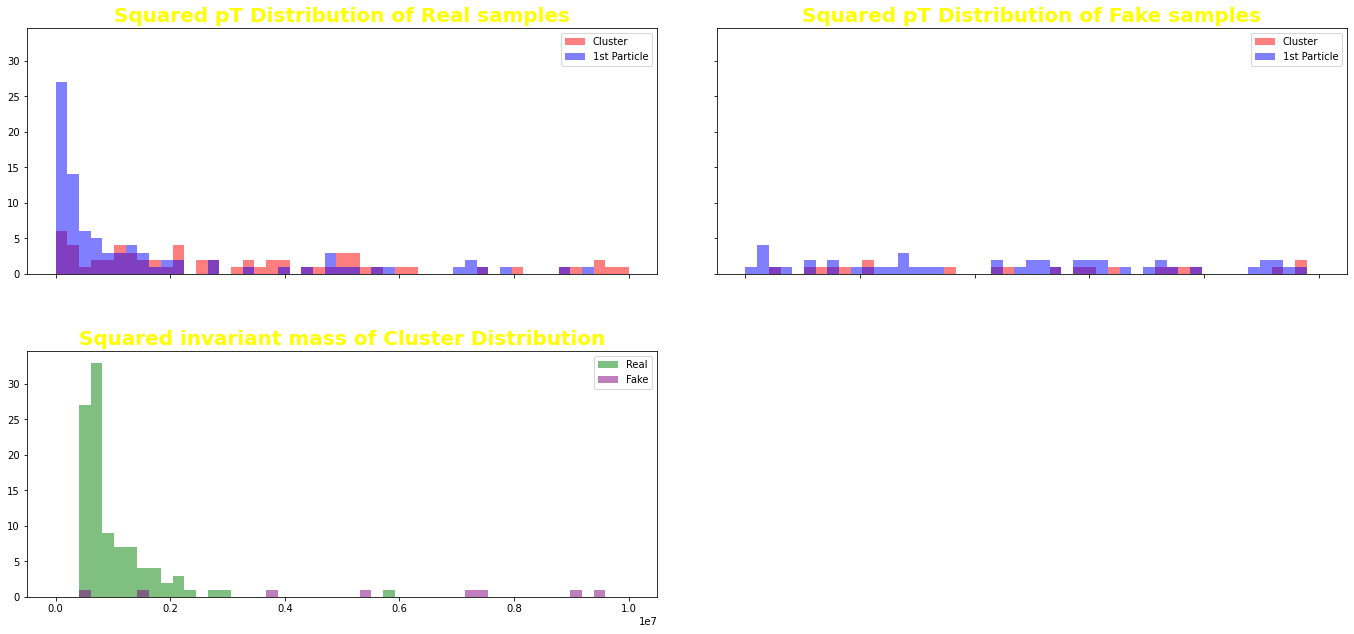

199 0.3700000047683716 0.7099999785423279


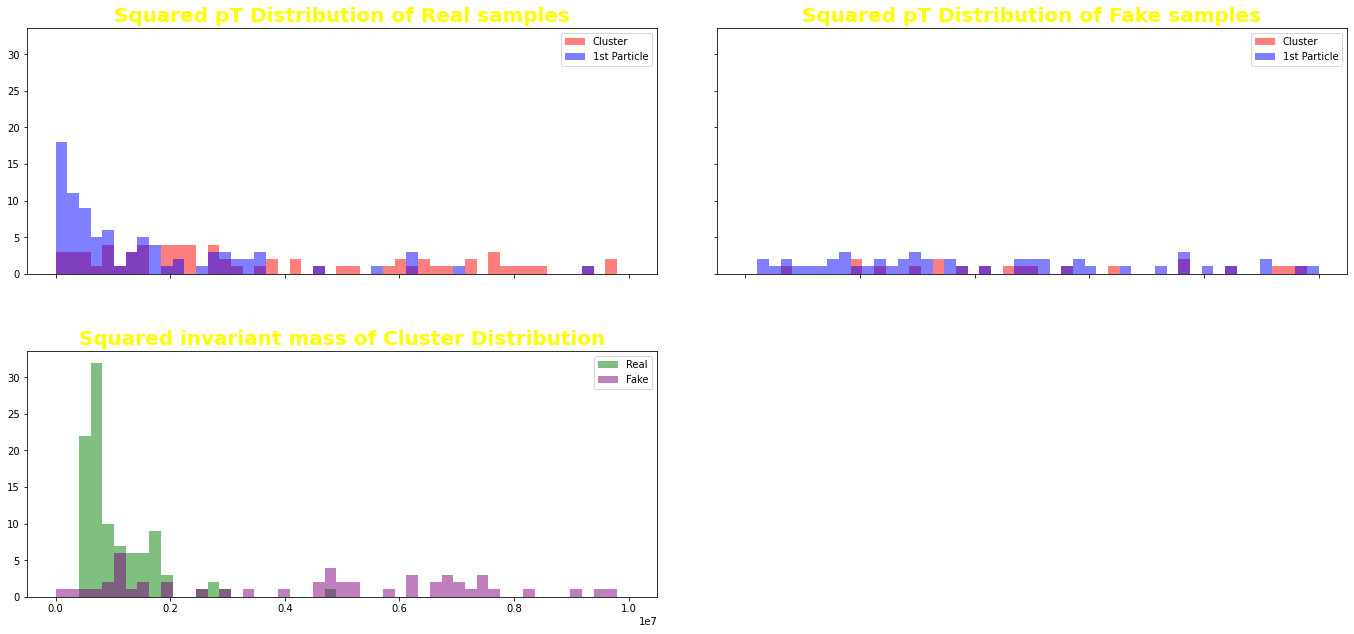

299 0.28999999165534973 0.6100000143051147


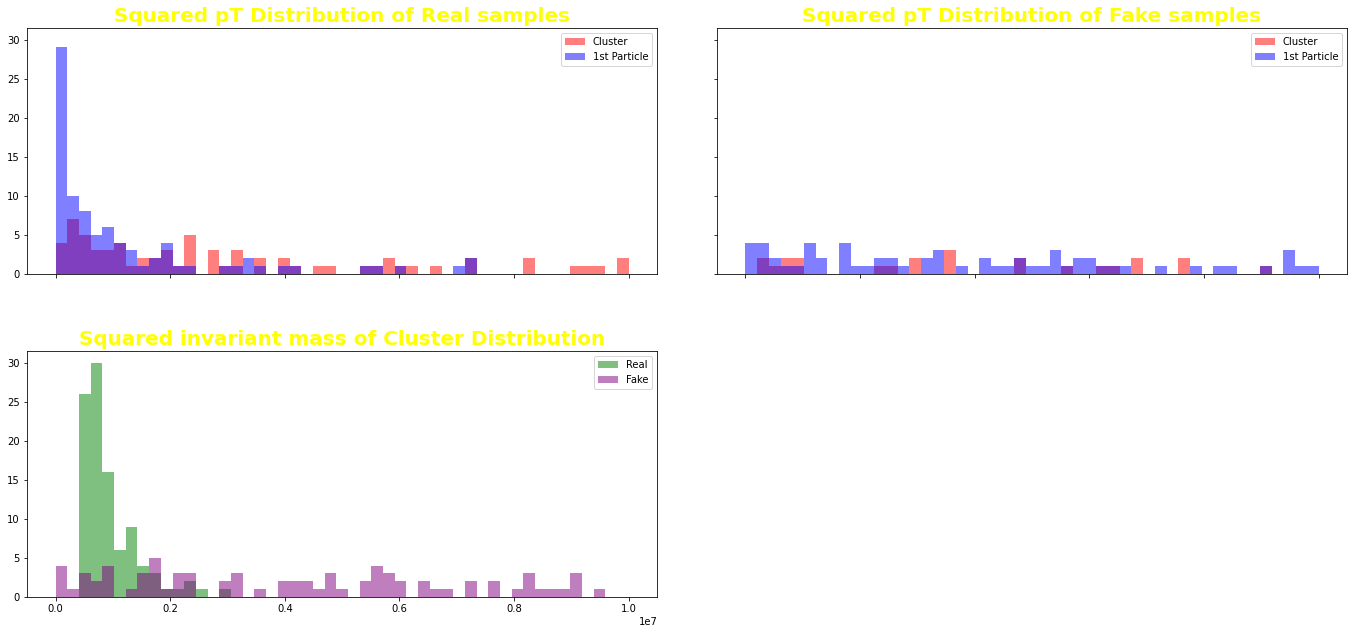

399 0.3799999952316284 0.6800000071525574


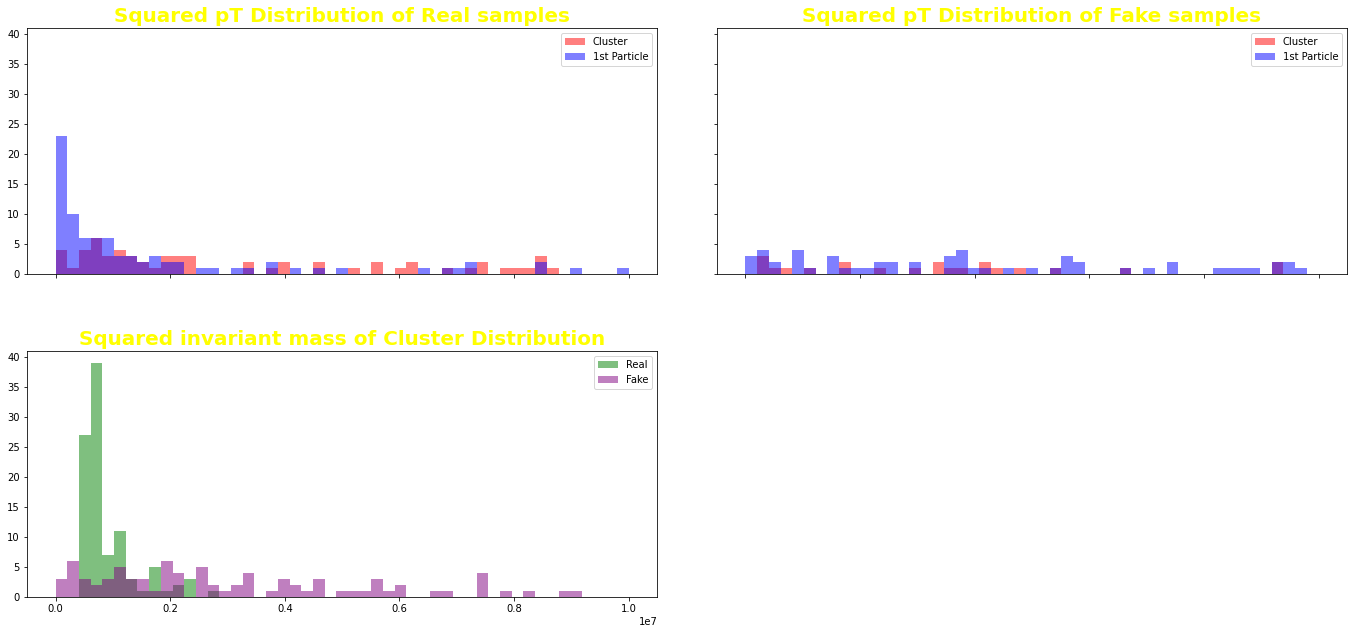

499 0.46000000834465027 0.5699999928474426


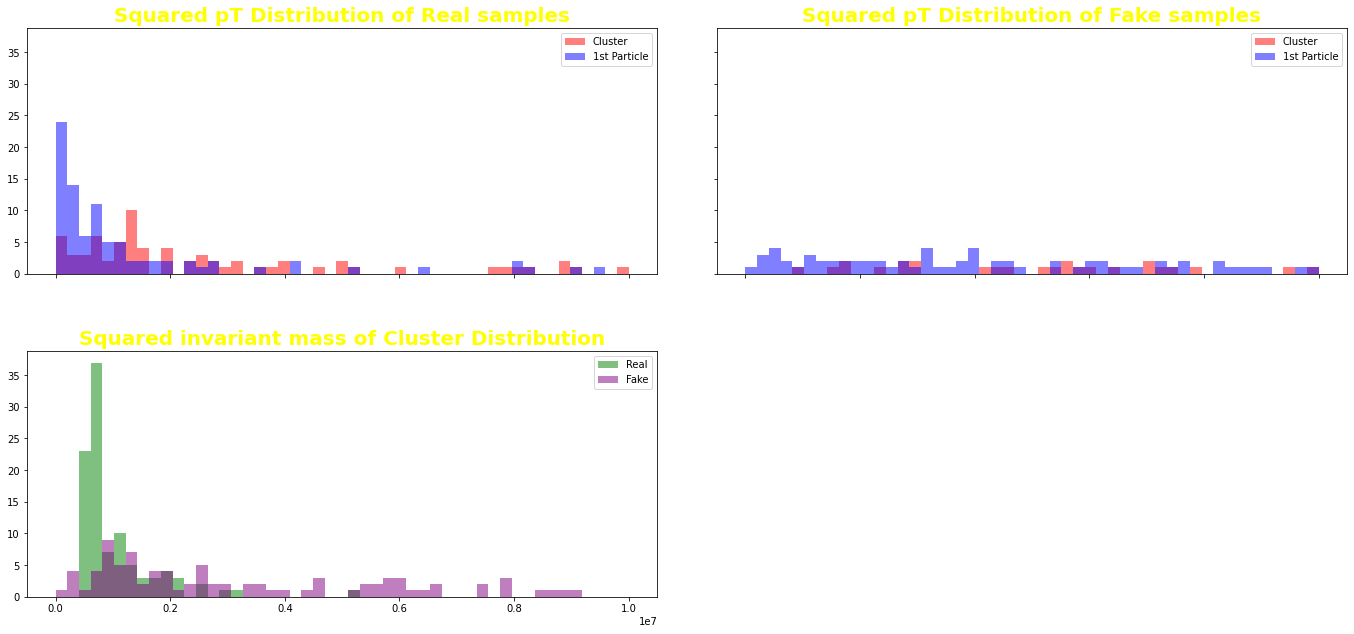

599 0.46000000834465027 0.5699999928474426


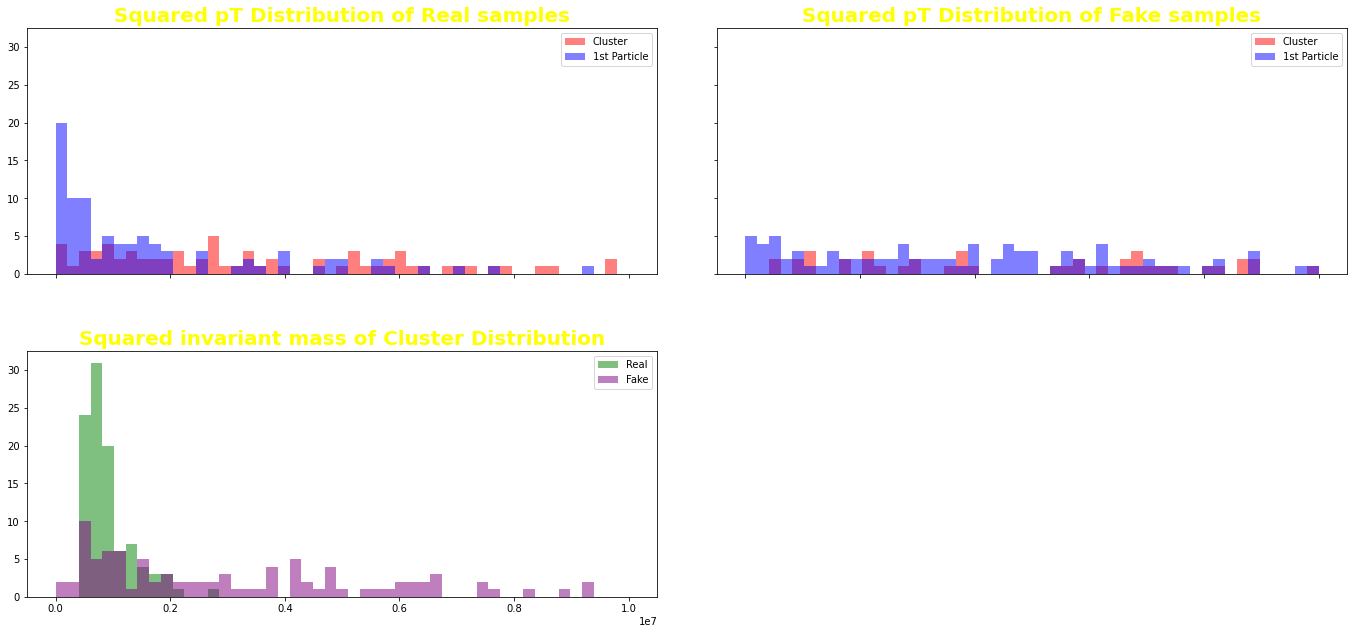

699 0.5799999833106995 0.5899999737739563


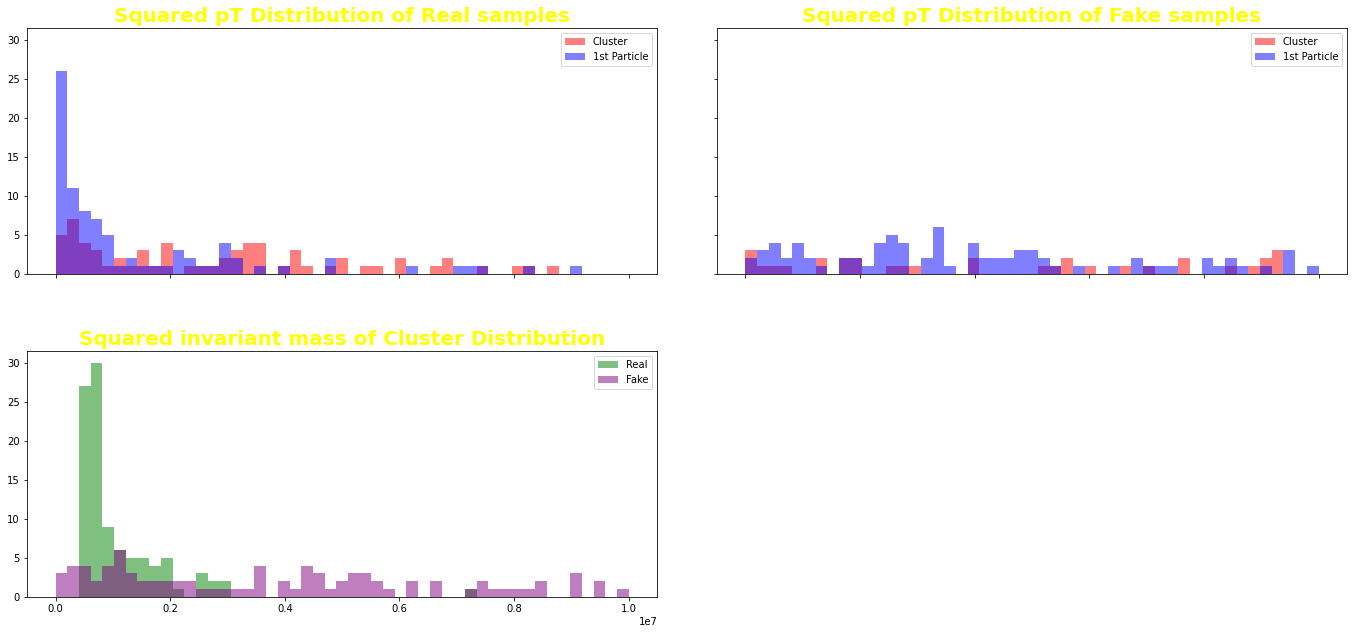

799 0.5899999737739563 0.7400000095367432


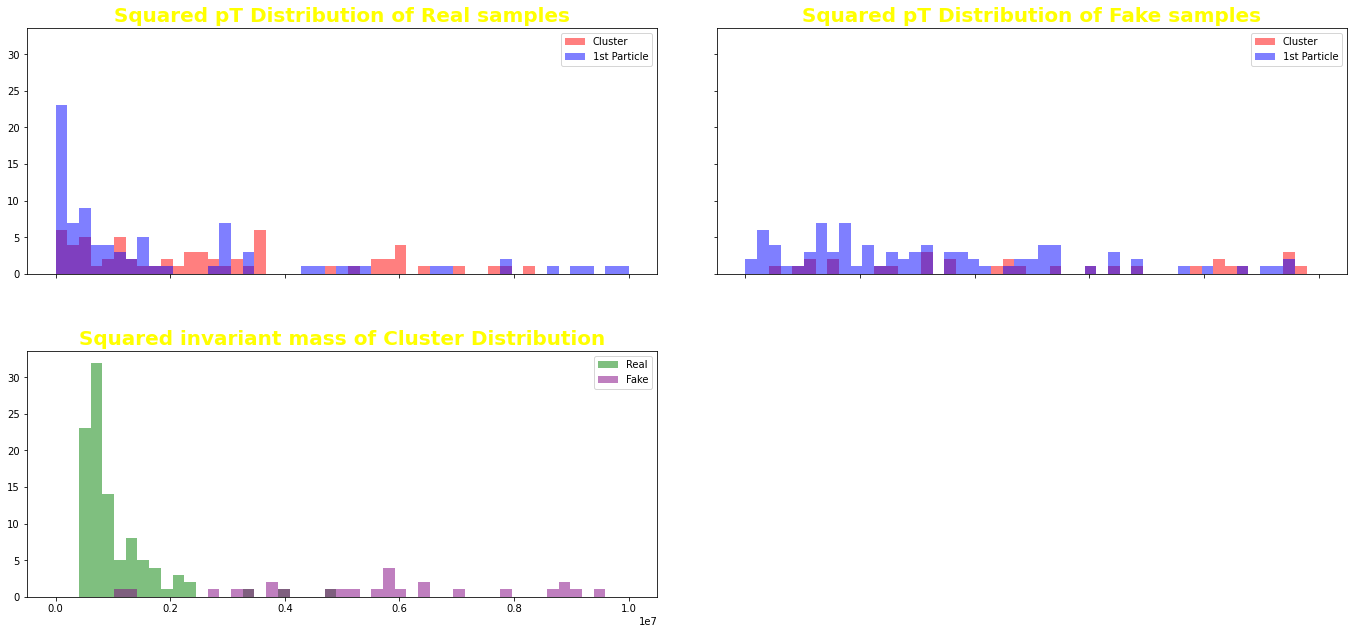

899 0.38999998569488525 0.6600000262260437


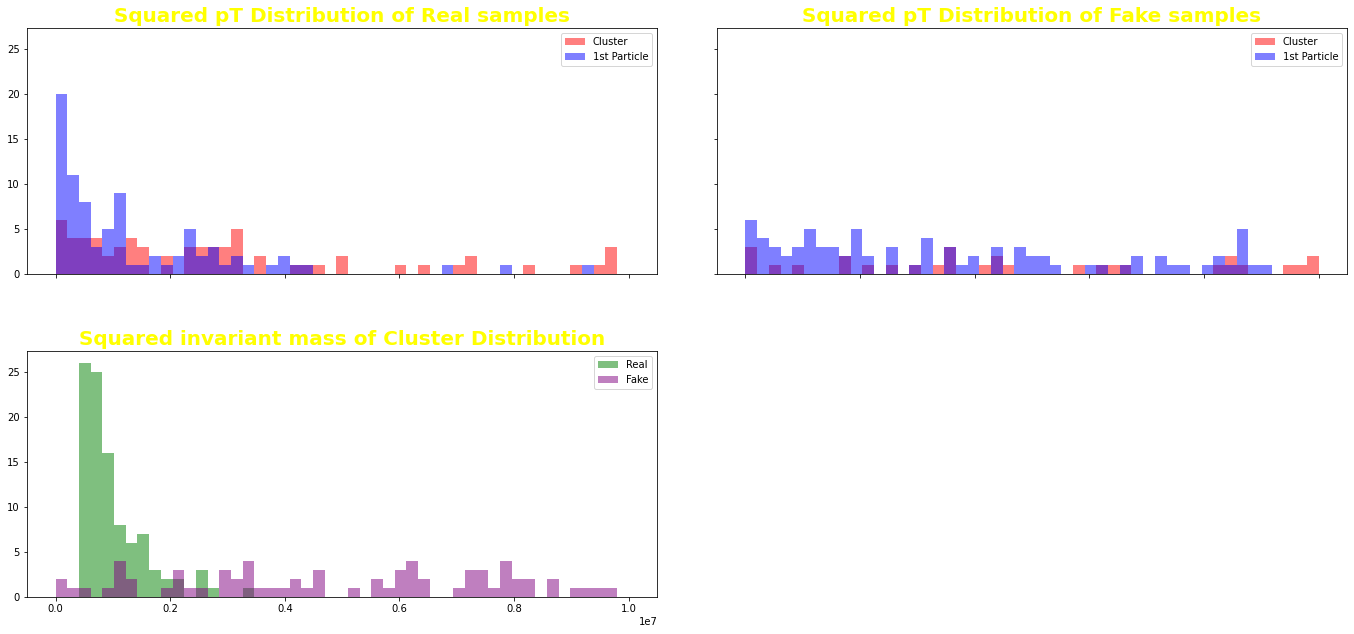

999 0.5400000214576721 0.8299999833106995


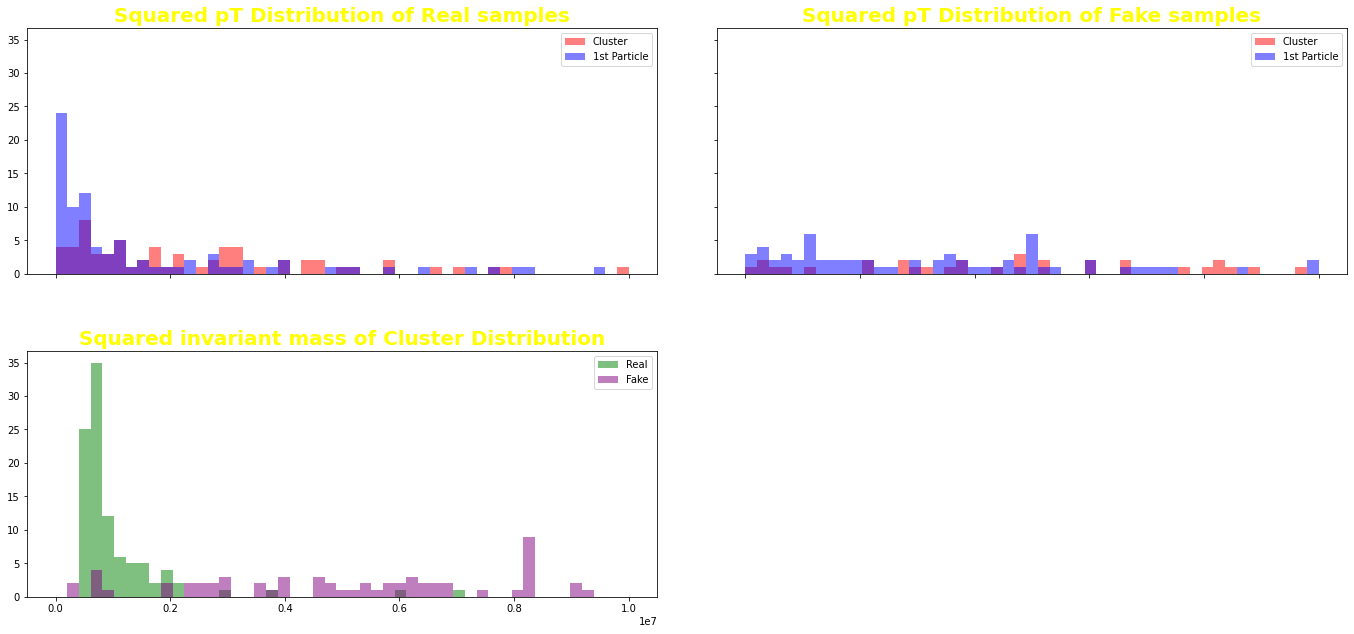

1099 0.5799999833106995 0.7099999785423279


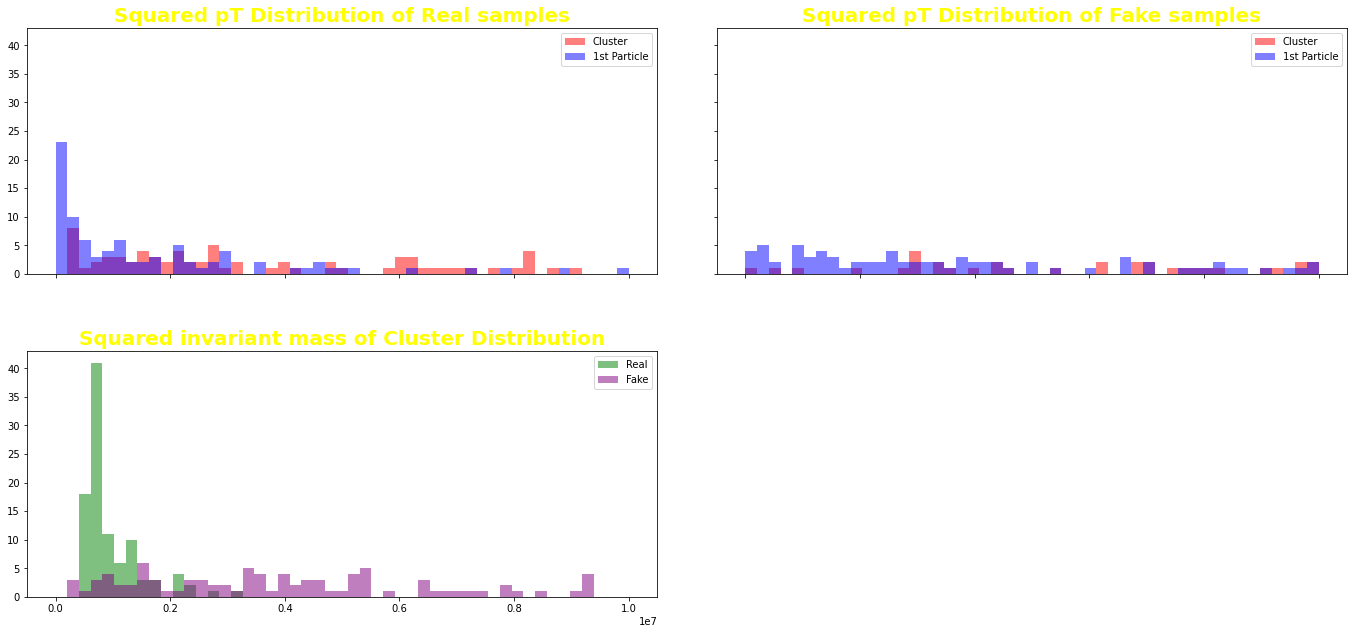

1199 0.4099999964237213 0.699999988079071


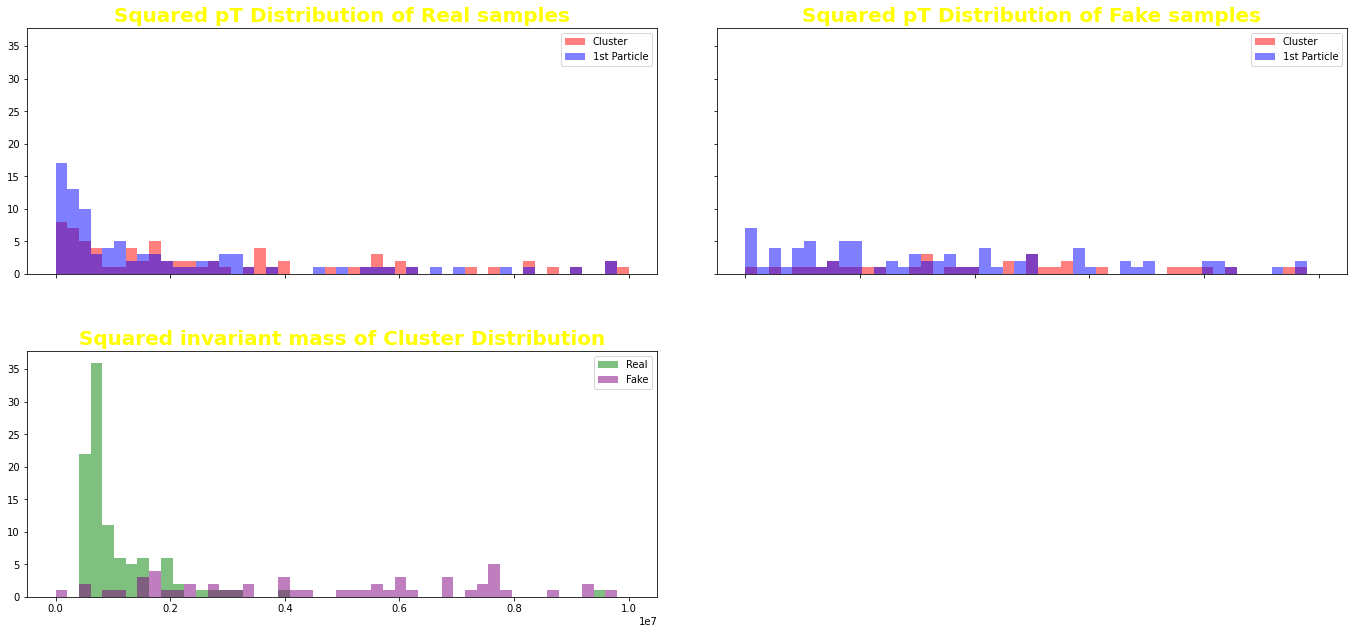

1299 0.5 0.6800000071525574


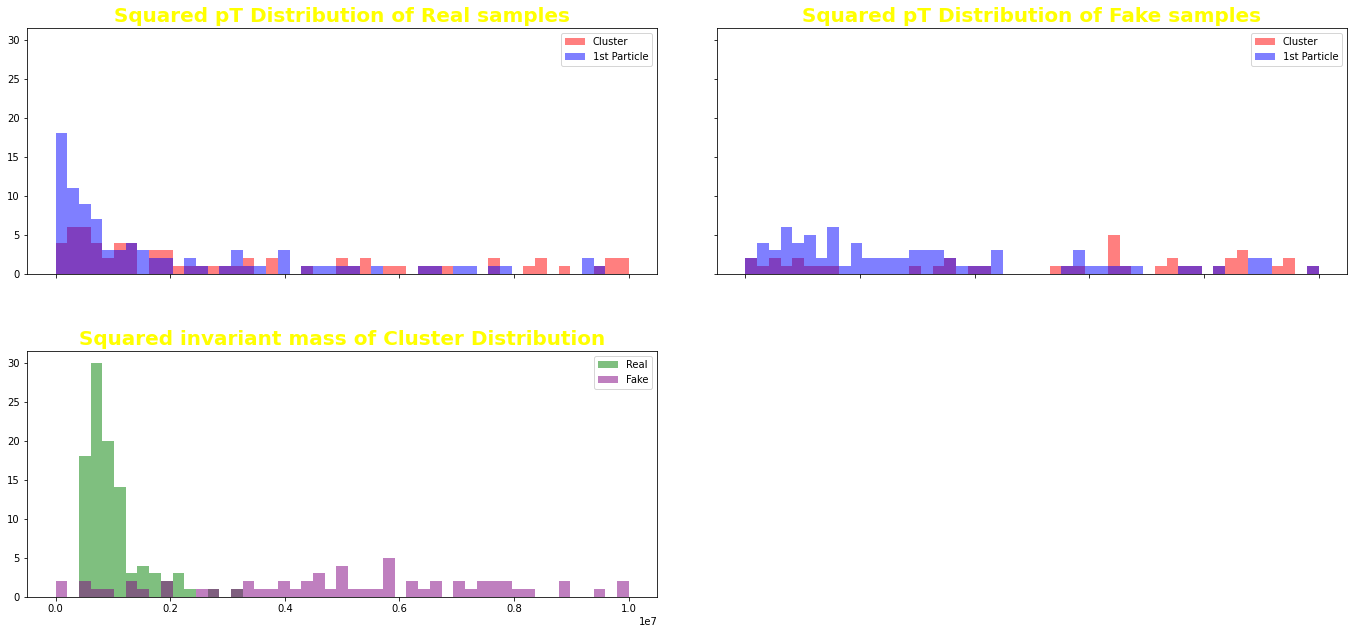

1399 0.5099999904632568 0.7200000286102295


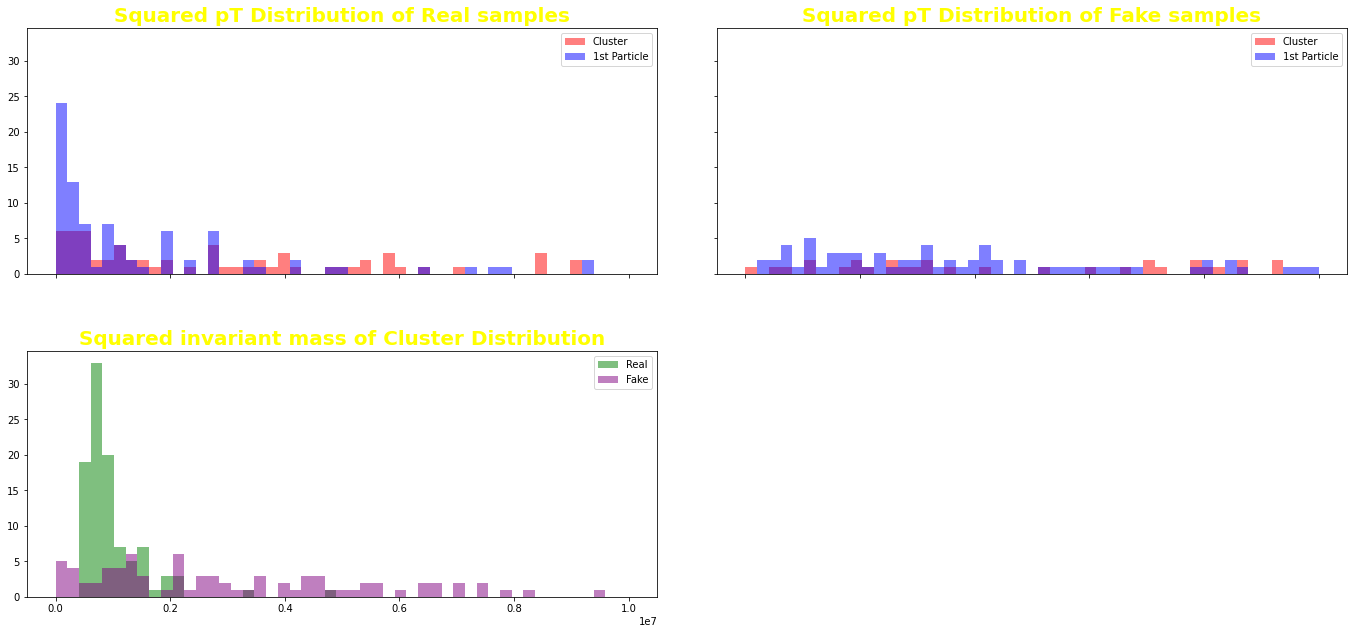

1499 0.5899999737739563 0.6800000071525574


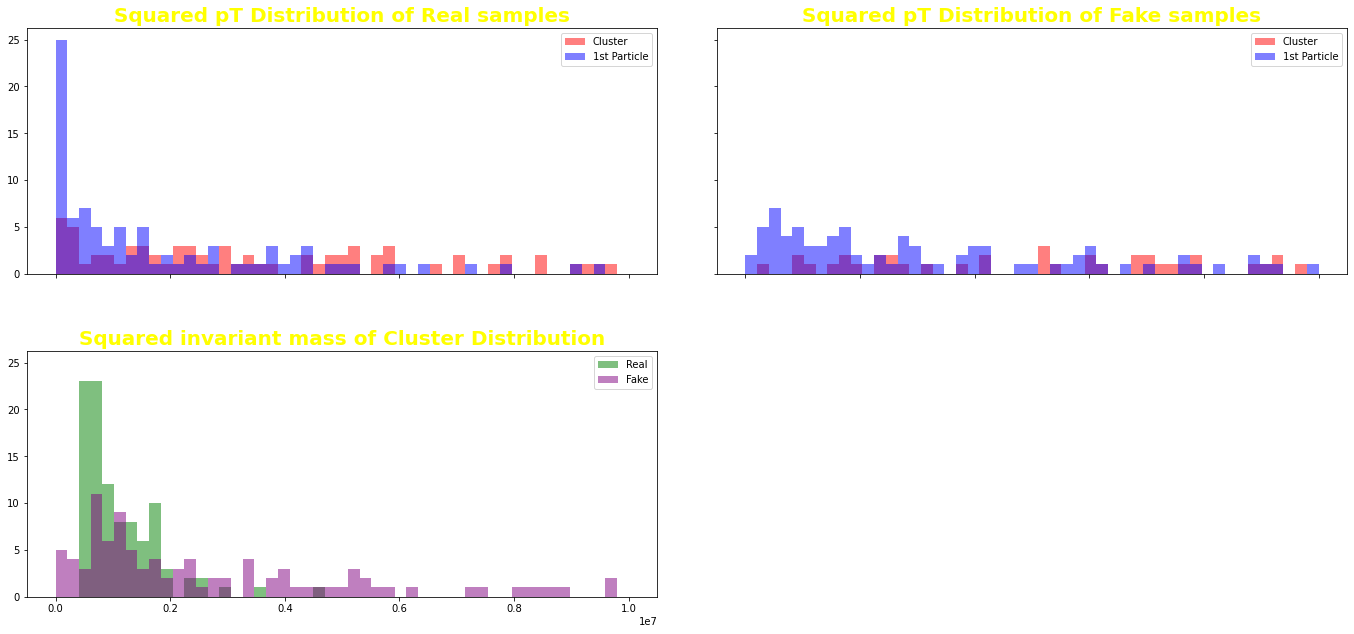

1599 0.550000011920929 0.7300000190734863


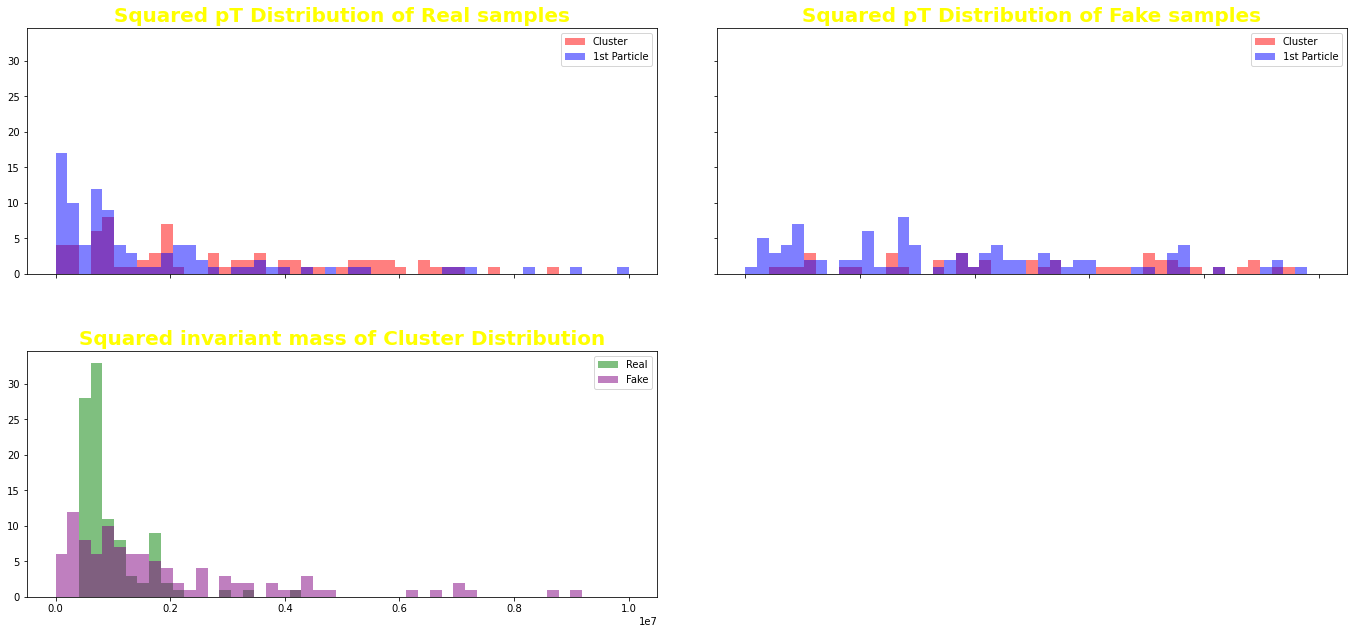

1699 0.6600000262260437 0.6600000262260437


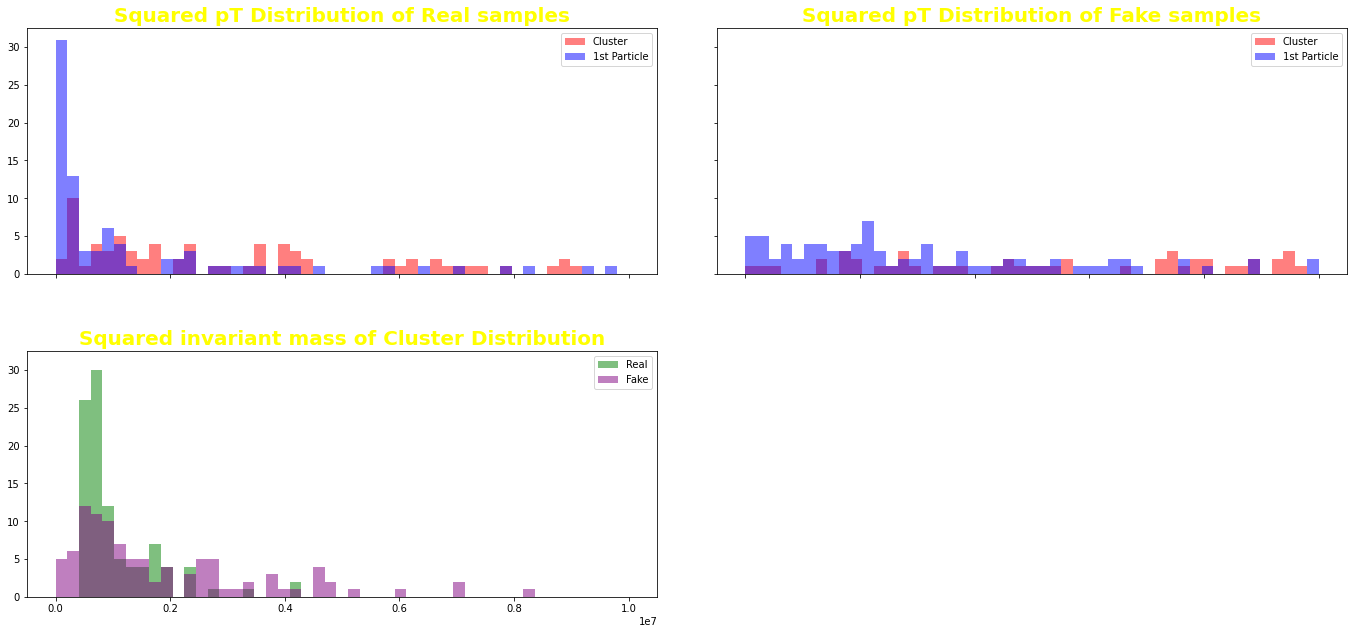

1799 0.6499999761581421 0.8199999928474426


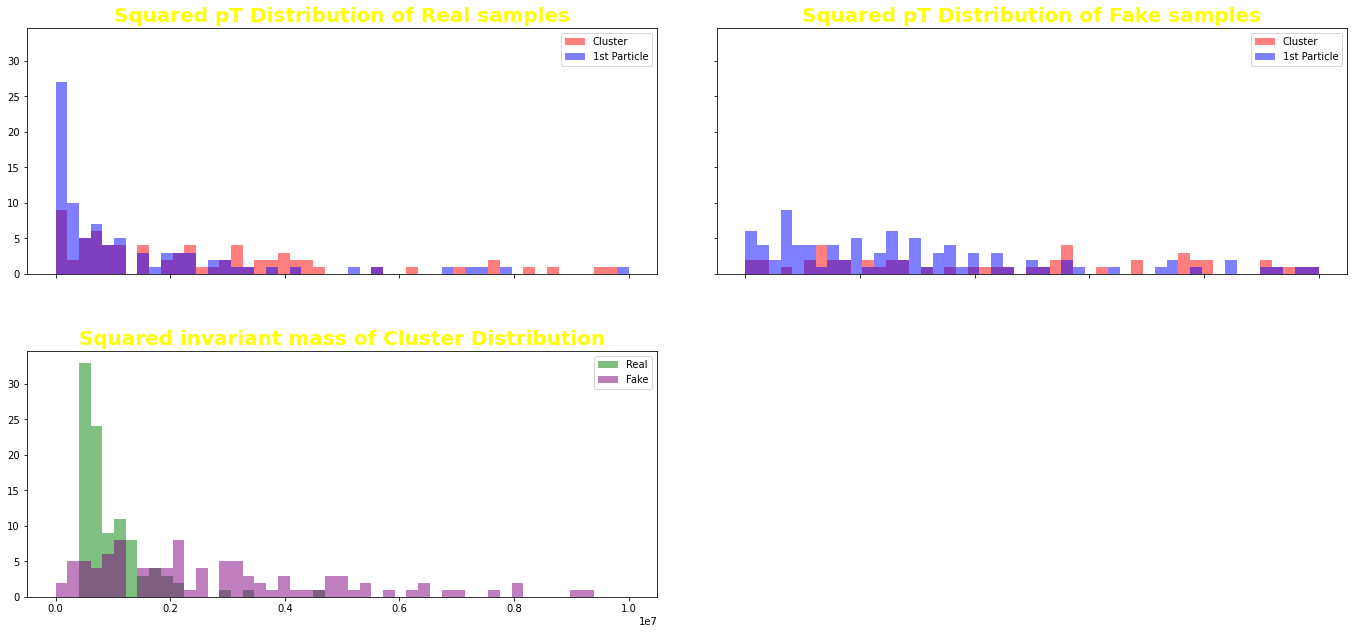

1899 0.6299999952316284 0.7099999785423279


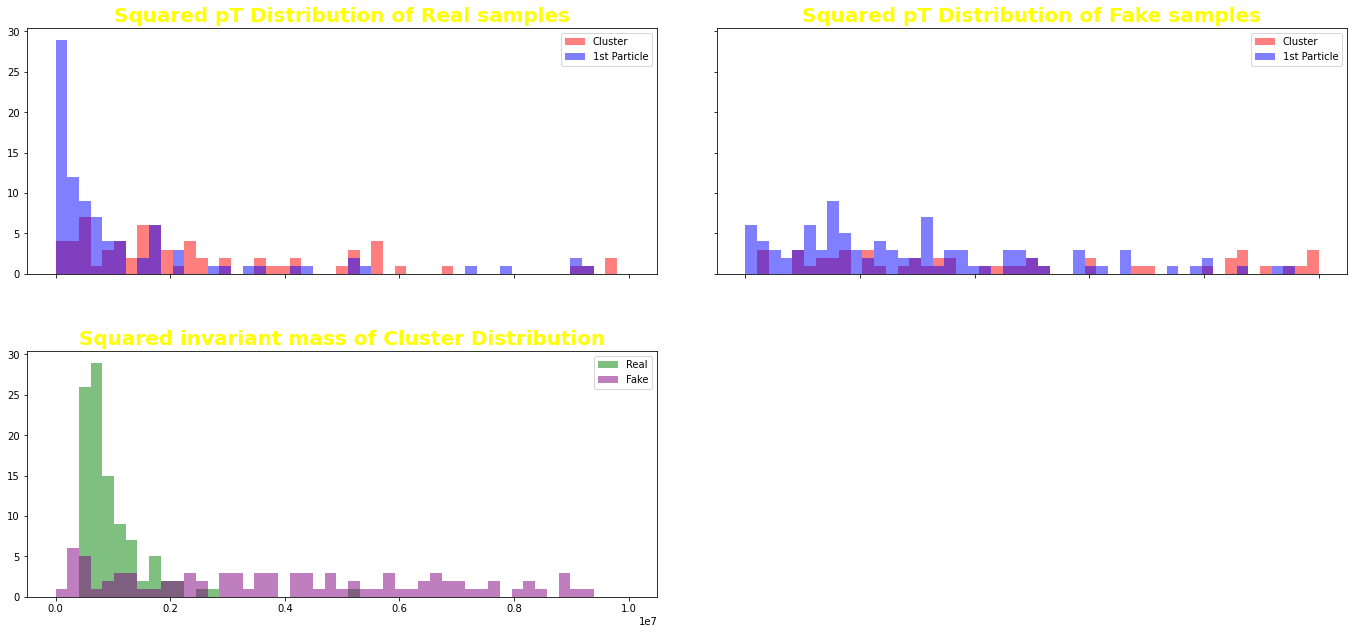

1999 0.7900000214576721 0.75


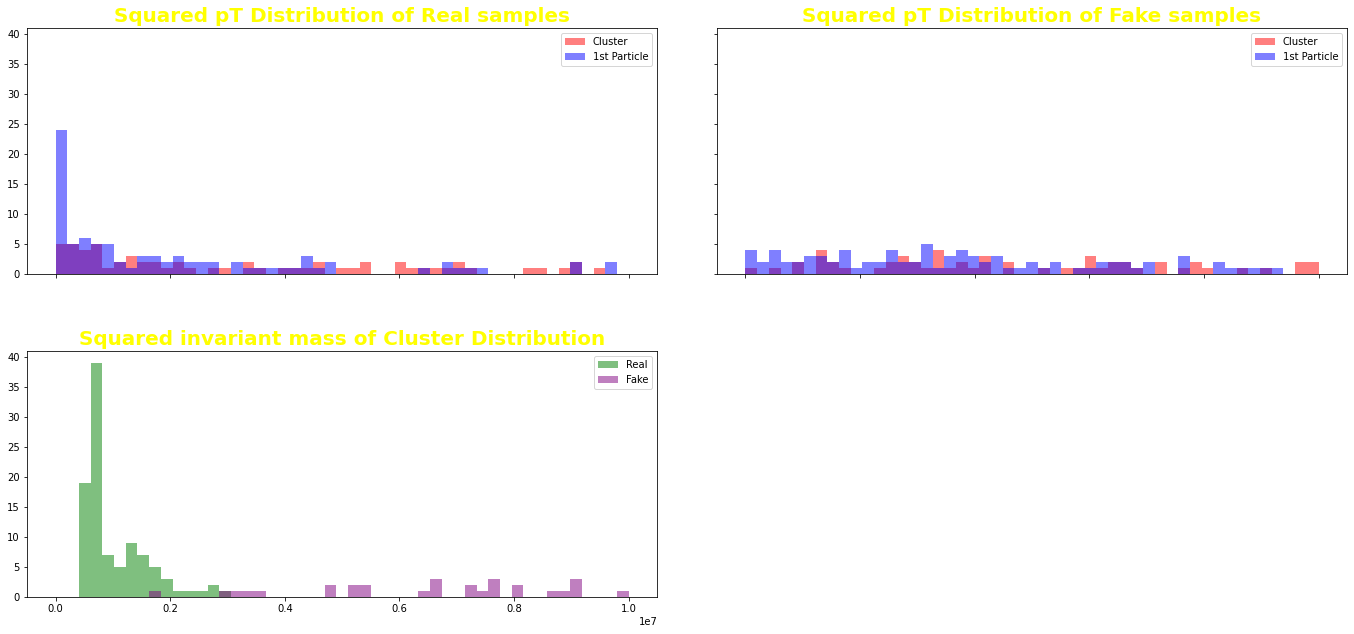

2099 0.5699999928474426 0.7099999785423279


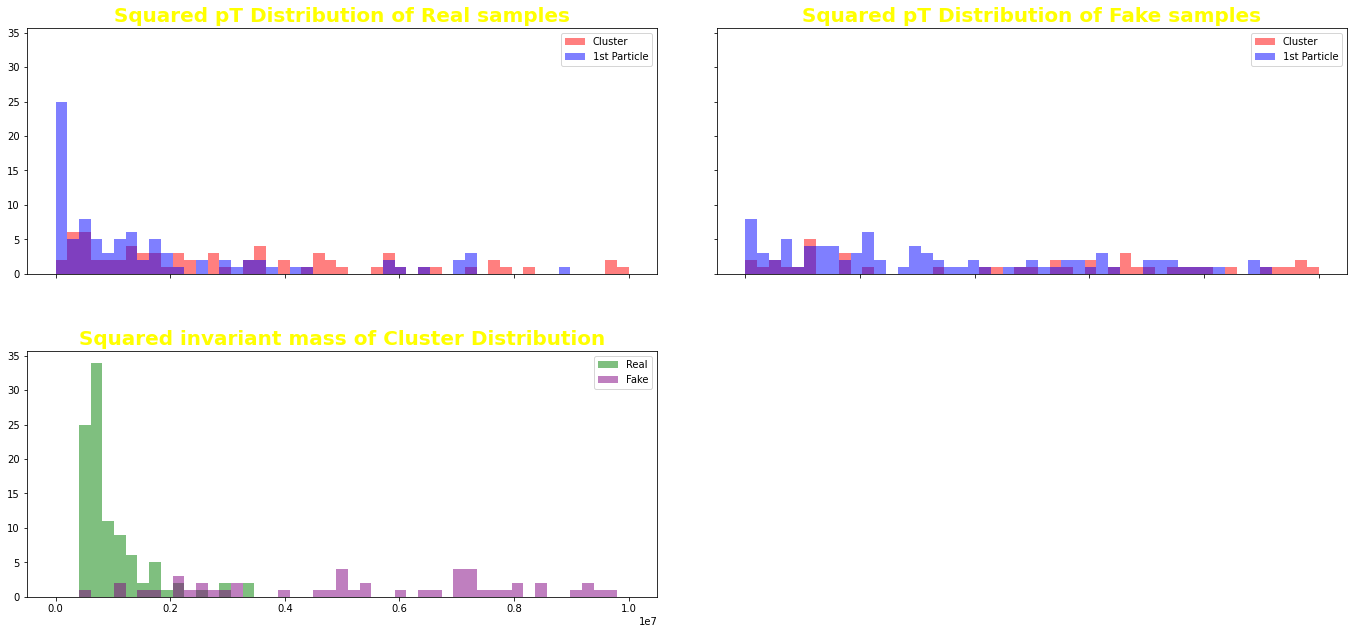

2199 0.6800000071525574 0.6899999976158142


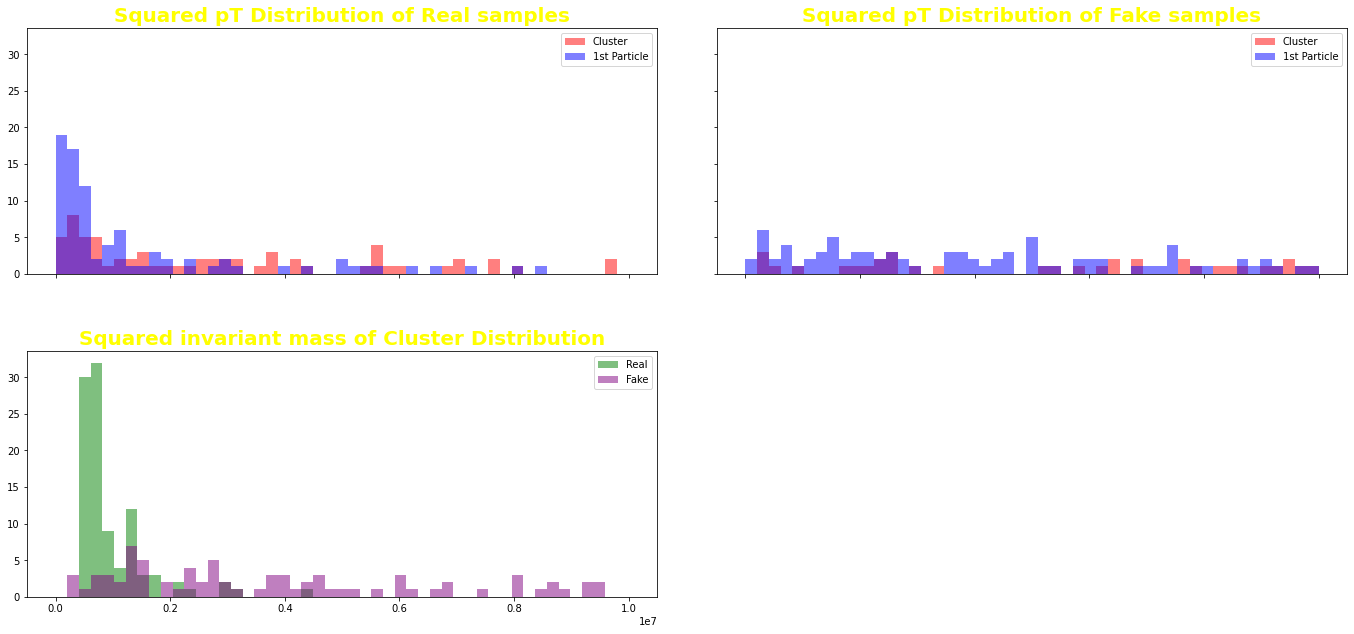

2299 0.5099999904632568 0.6600000262260437


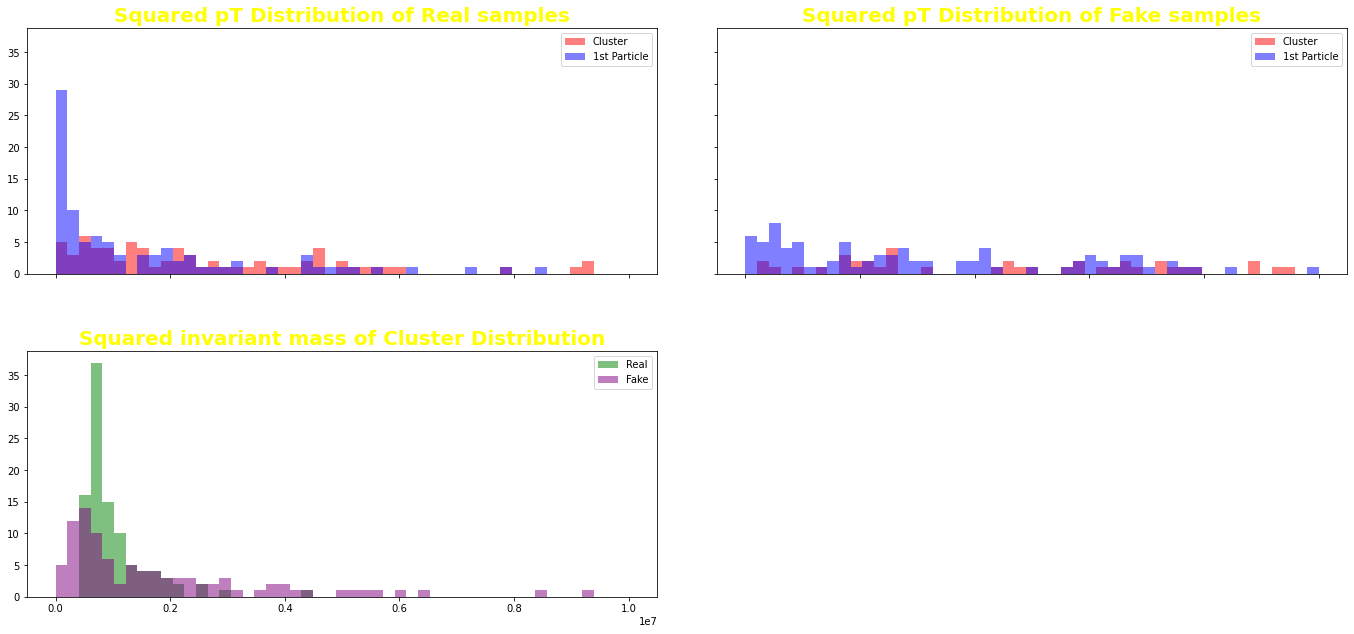

2399 0.6100000143051147 0.7200000286102295


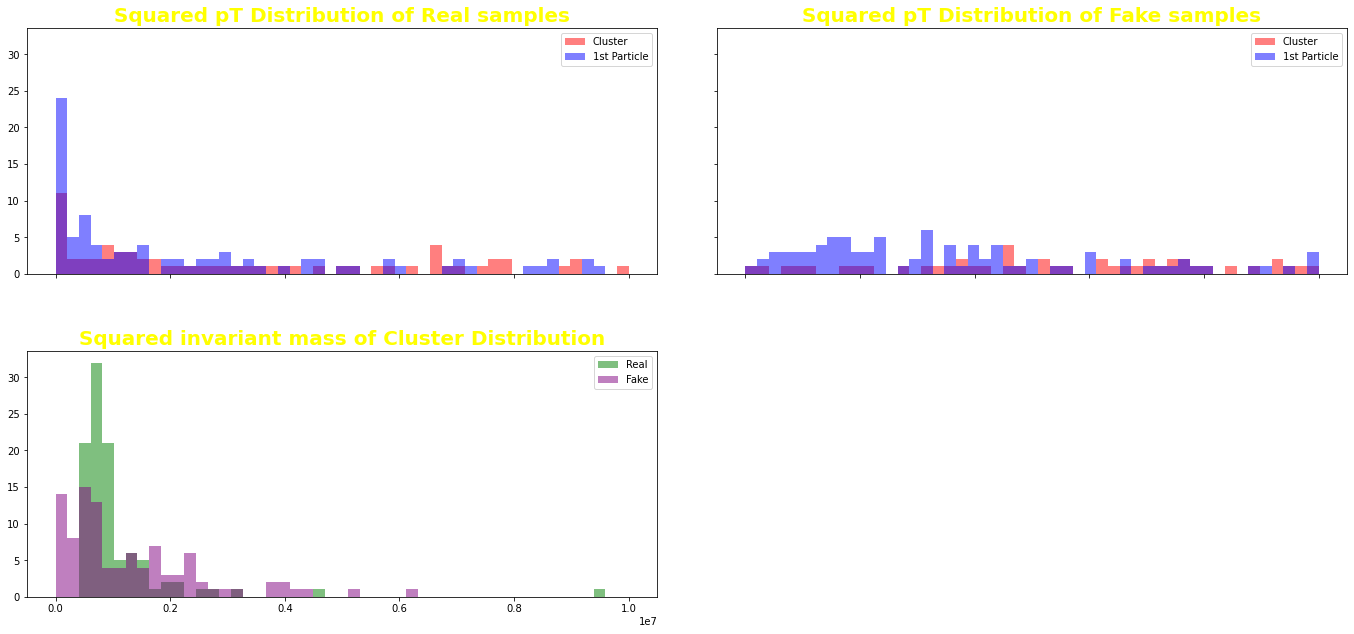

2499 0.6000000238418579 0.7400000095367432


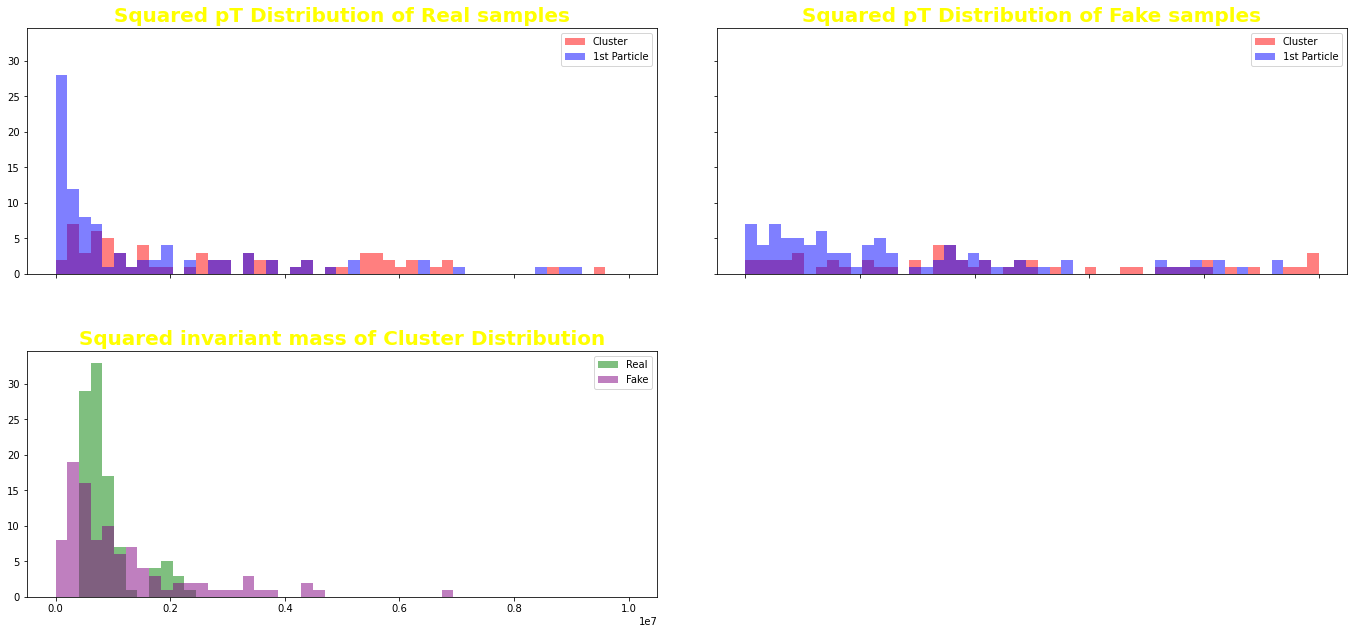

2599 0.5799999833106995 0.6899999976158142


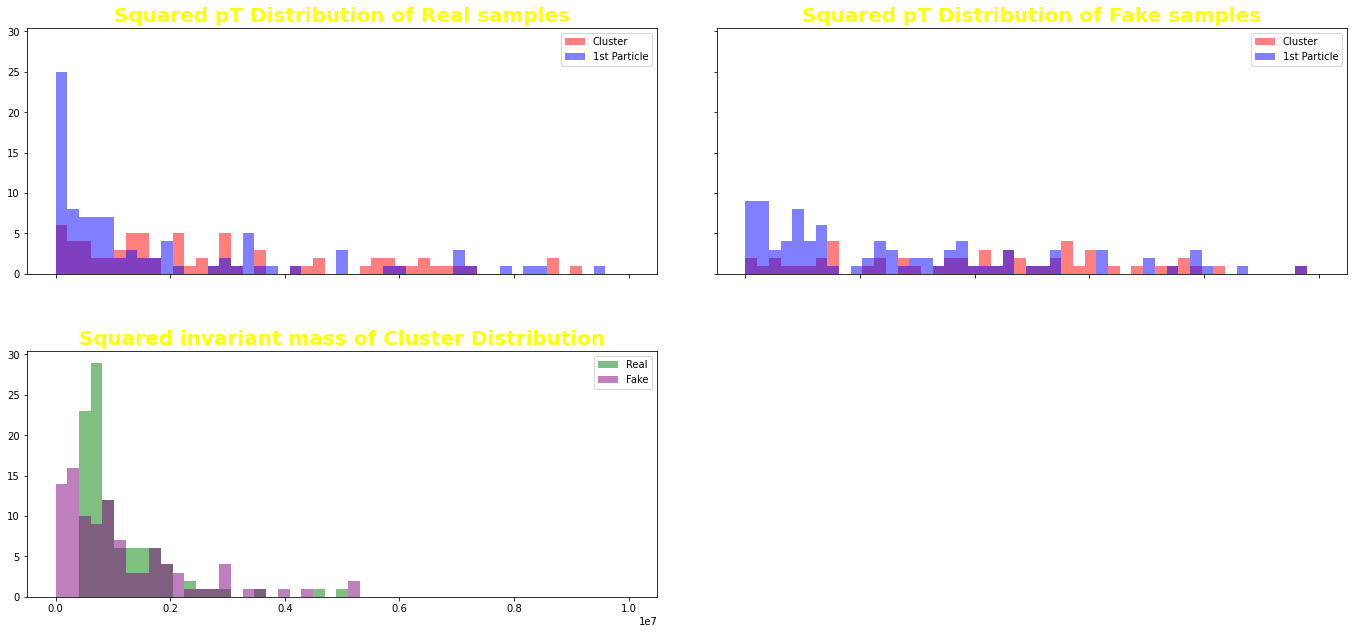

2699 0.4699999988079071 0.6200000047683716


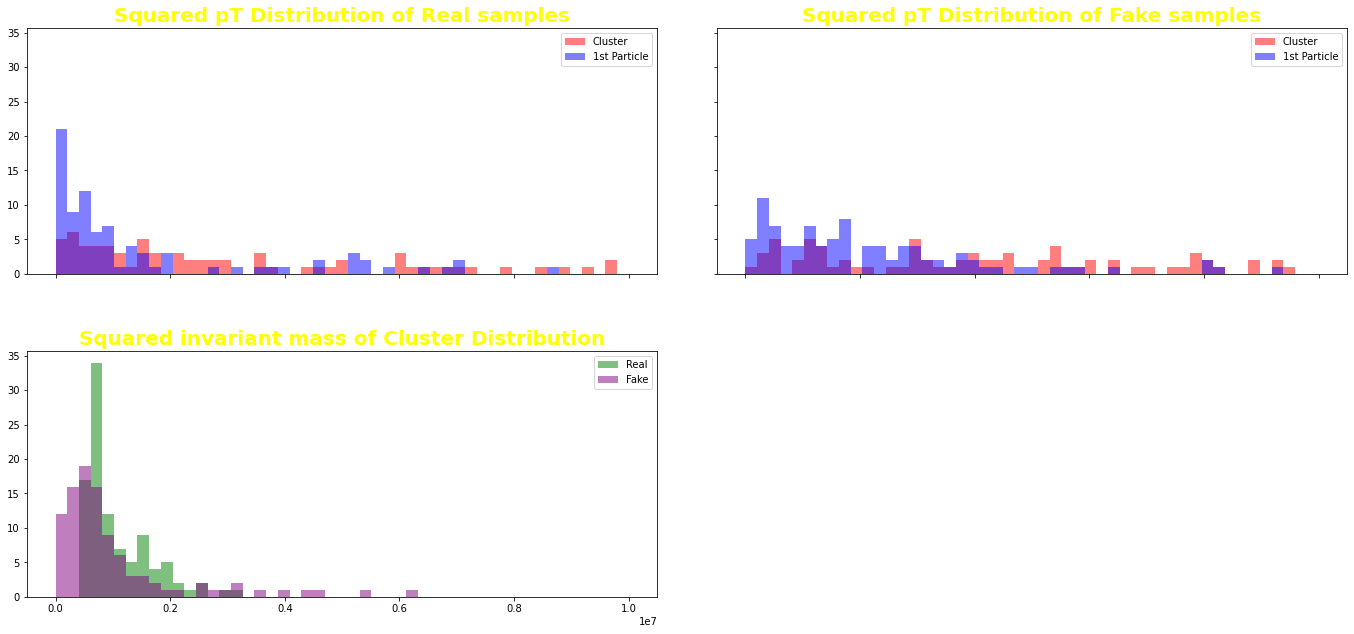

2799 0.6299999952316284 0.550000011920929


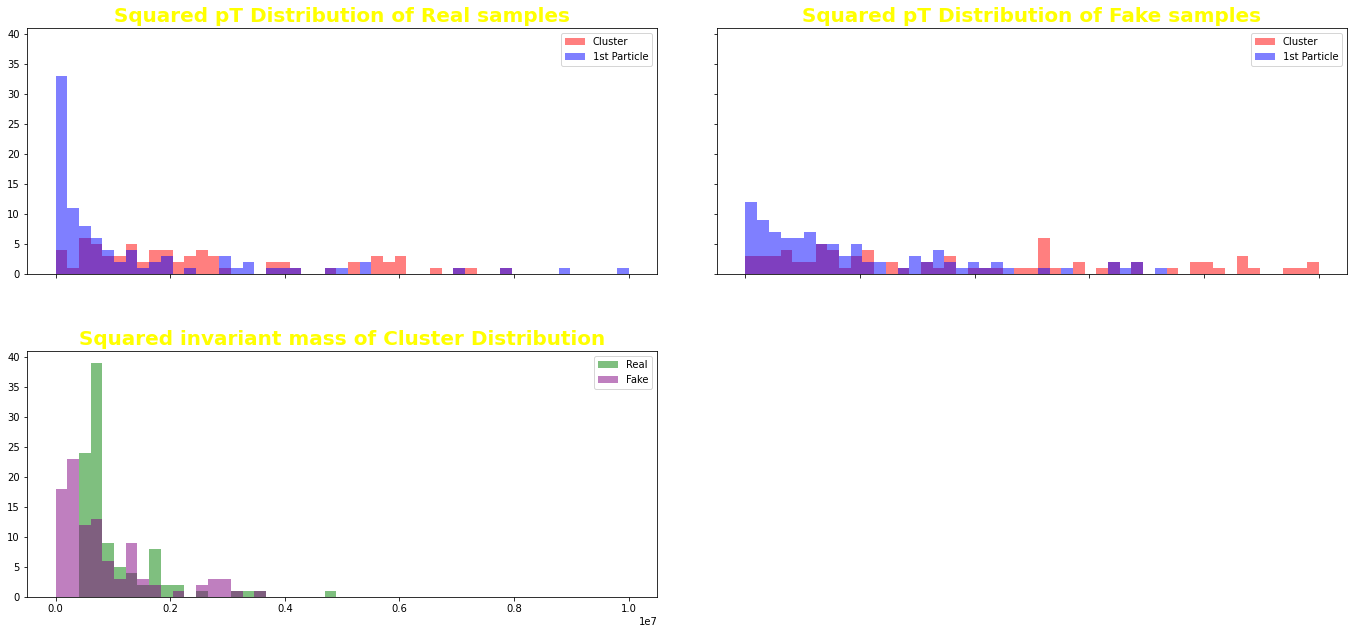

2899 0.5600000023841858 0.6000000238418579


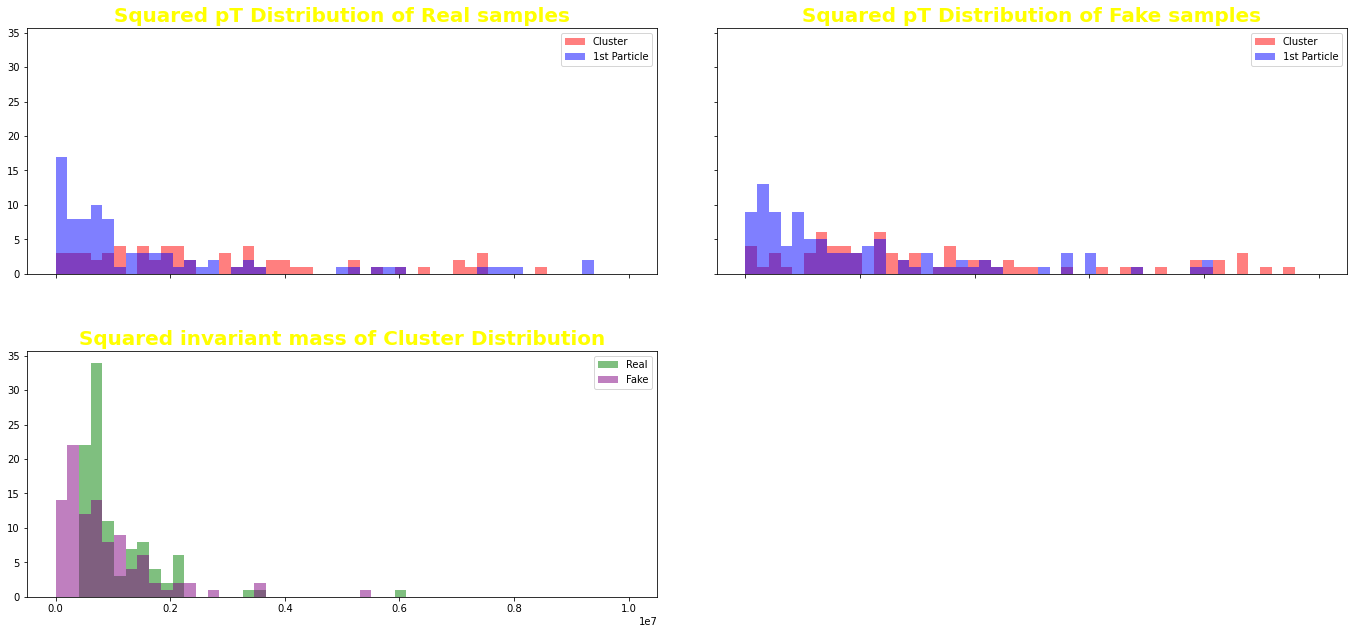

2999 0.6000000238418579 0.5299999713897705


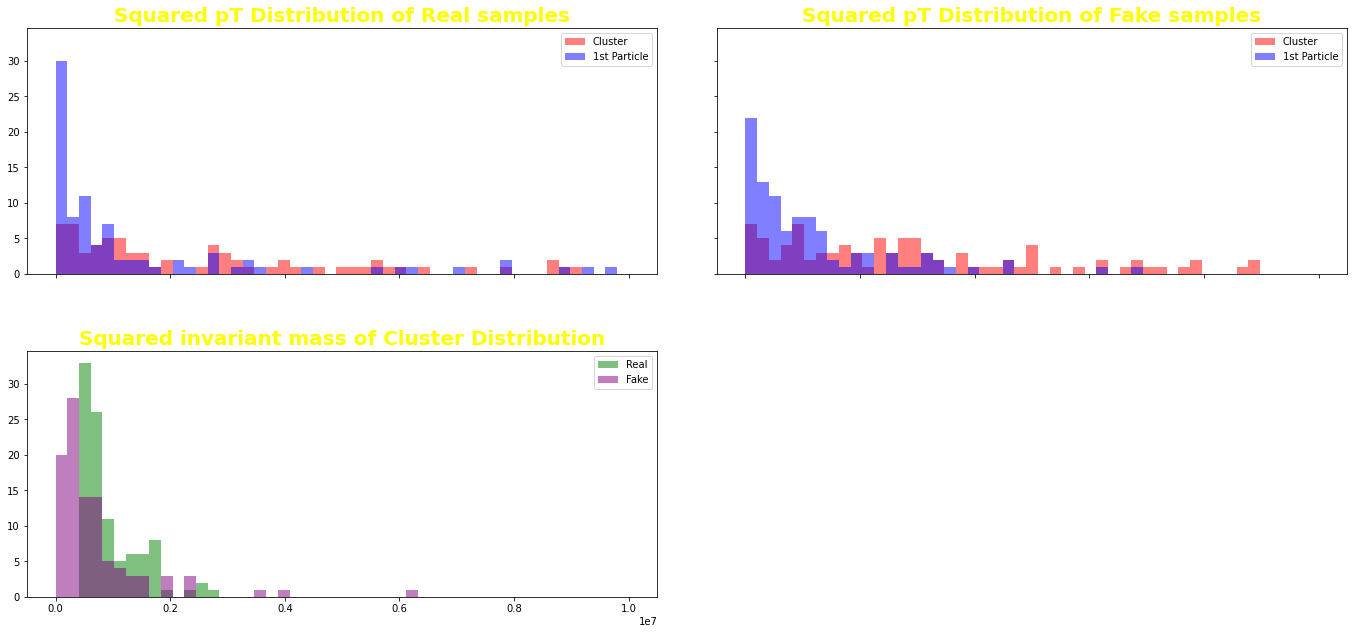

3099 0.6000000238418579 0.5099999904632568


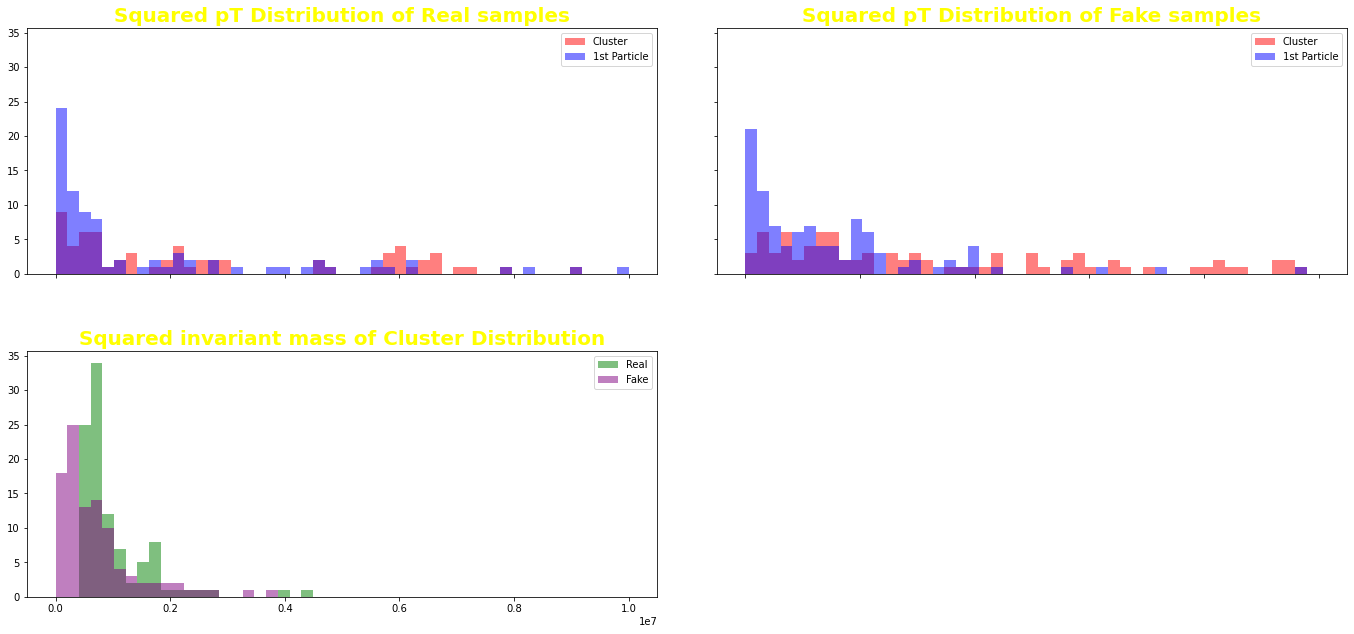

3199 0.5600000023841858 0.5899999737739563


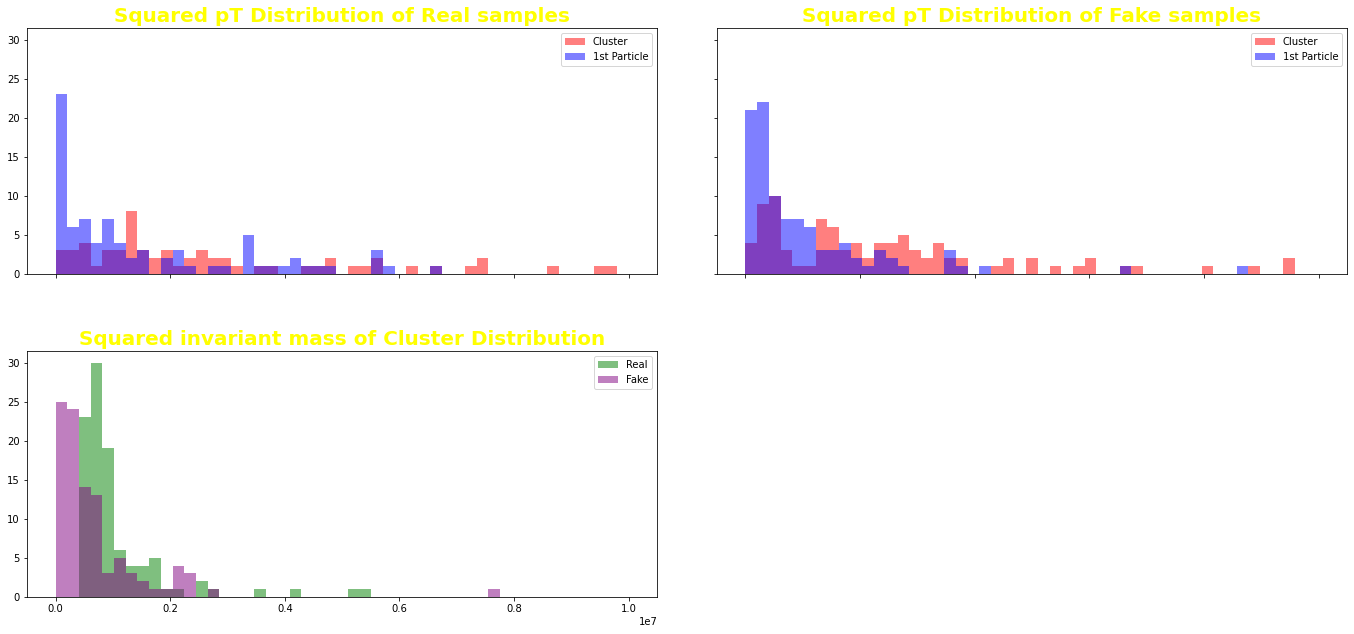

3299 0.6600000262260437 0.550000011920929


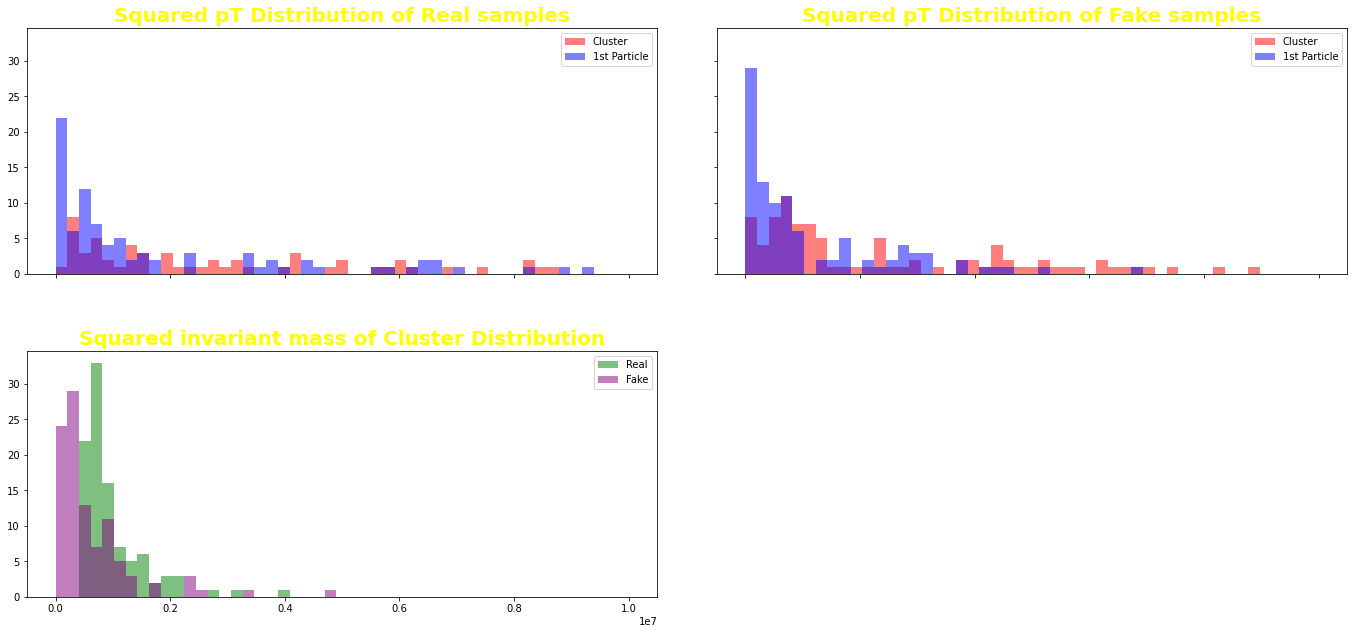

3399 0.5699999928474426 0.5699999928474426


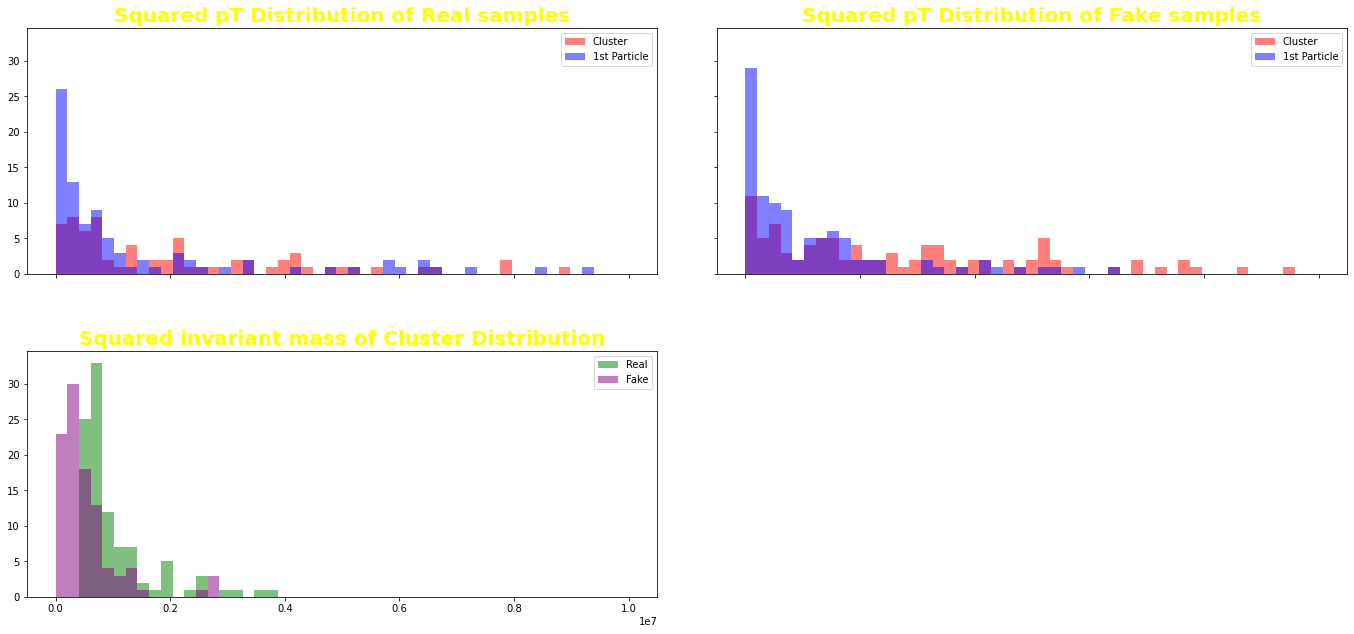

3499 0.699999988079071 0.3799999952316284


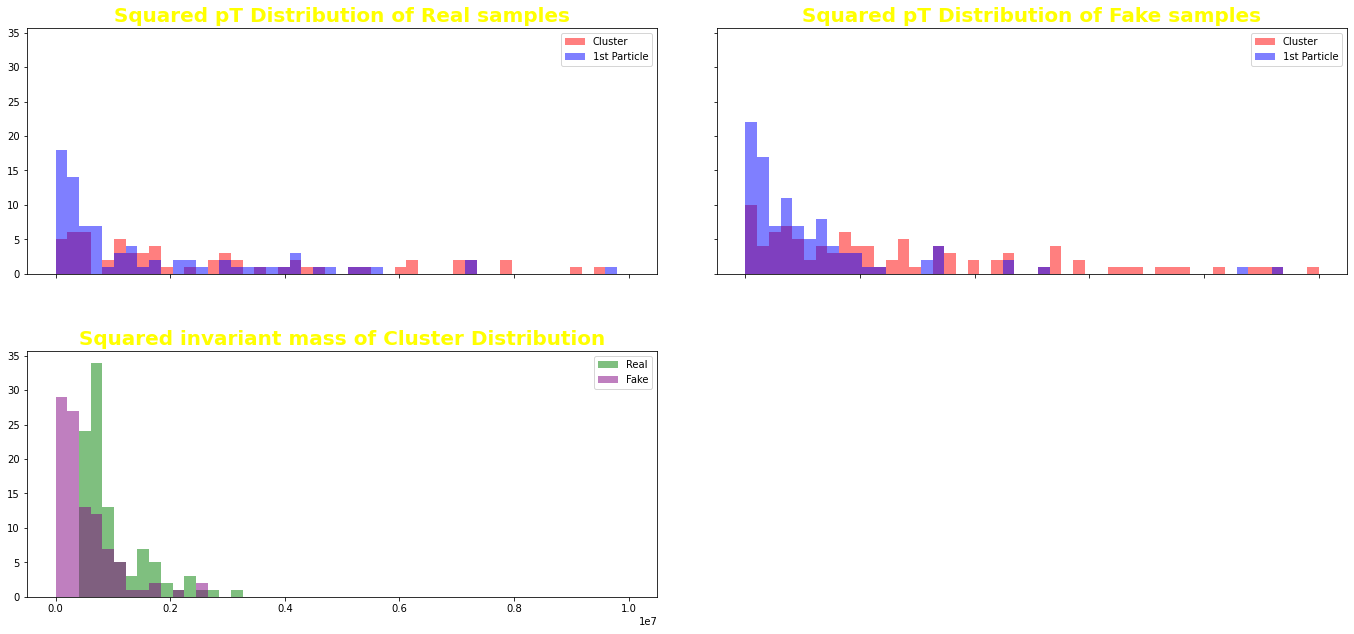

3599 0.6000000238418579 0.44999998807907104


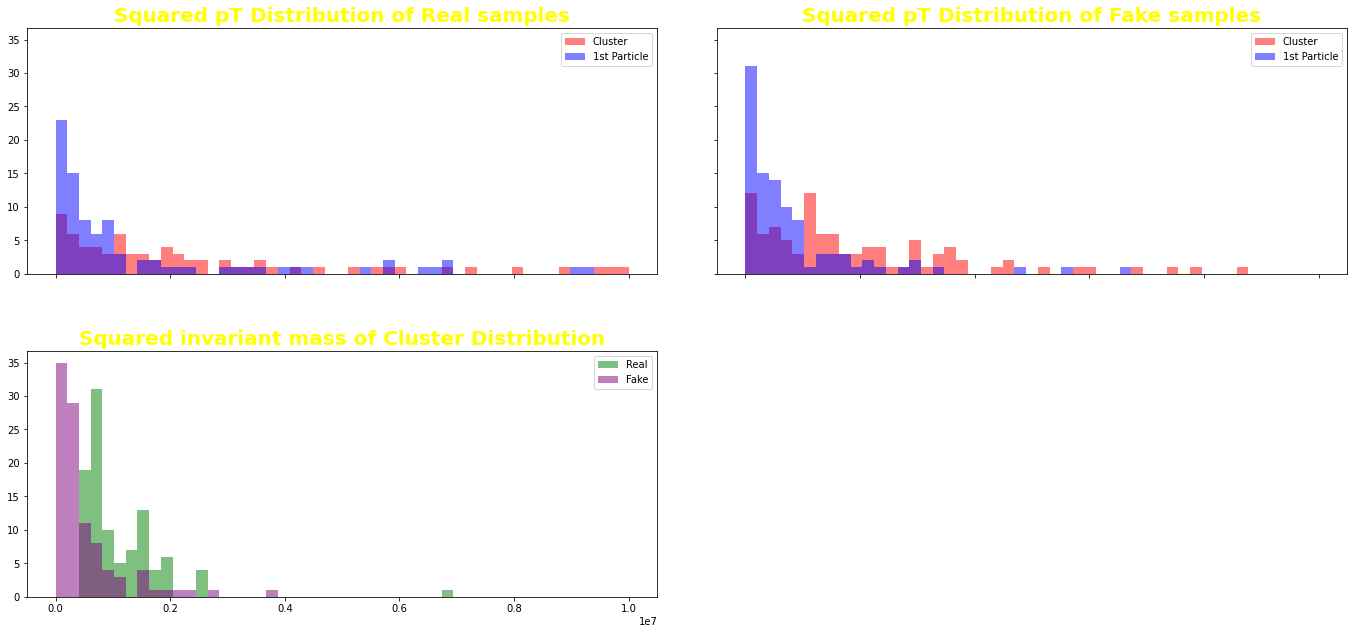

3699 0.6899999976158142 0.41999998688697815


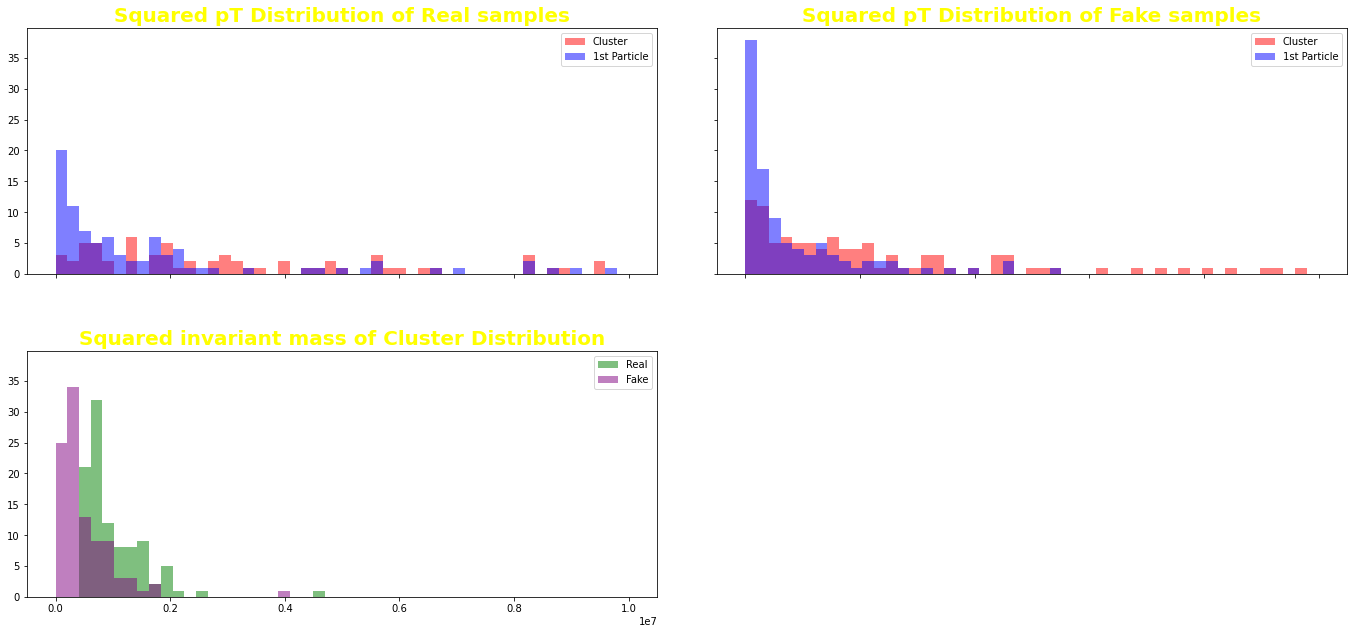

3799 0.7200000286102295 0.47999998927116394


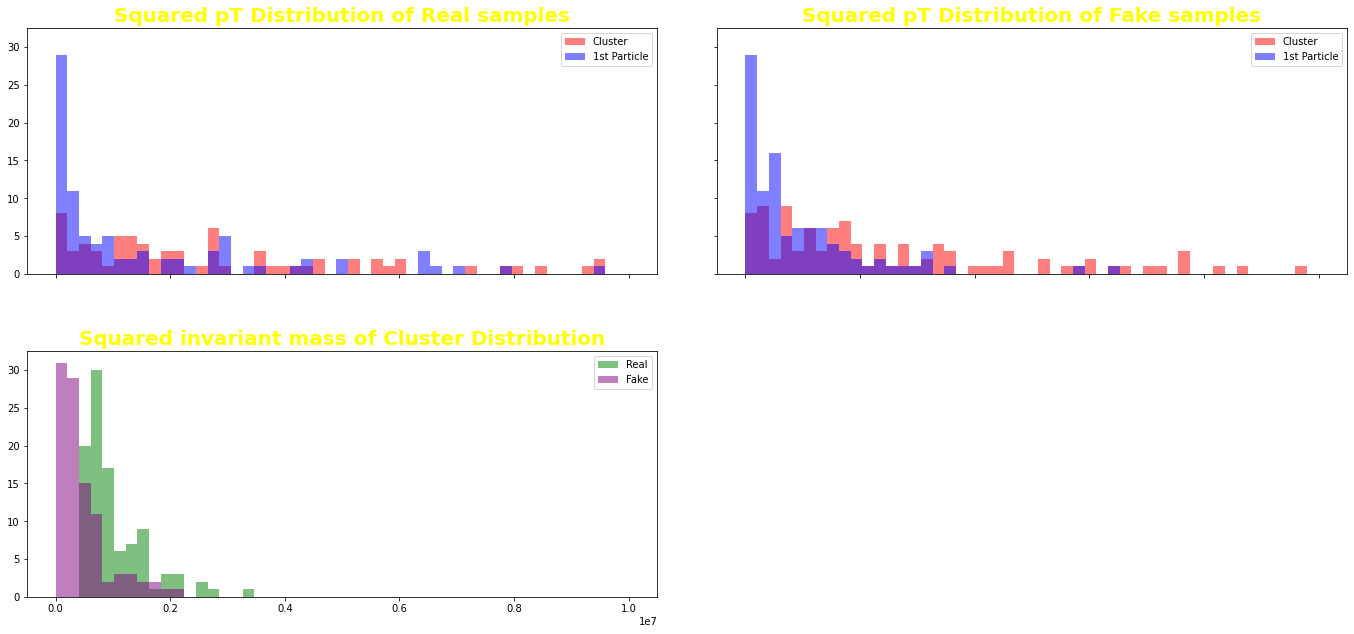

3899 0.5799999833106995 0.5400000214576721


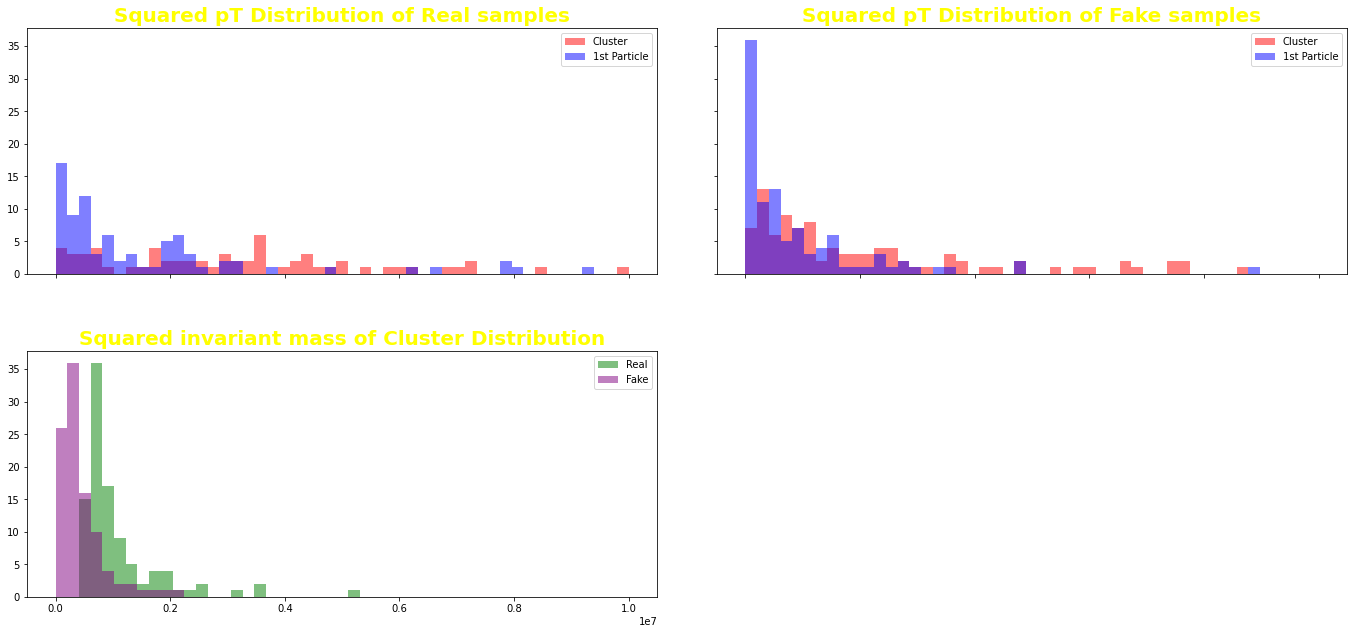

3999 0.6299999952316284 0.36000001430511475


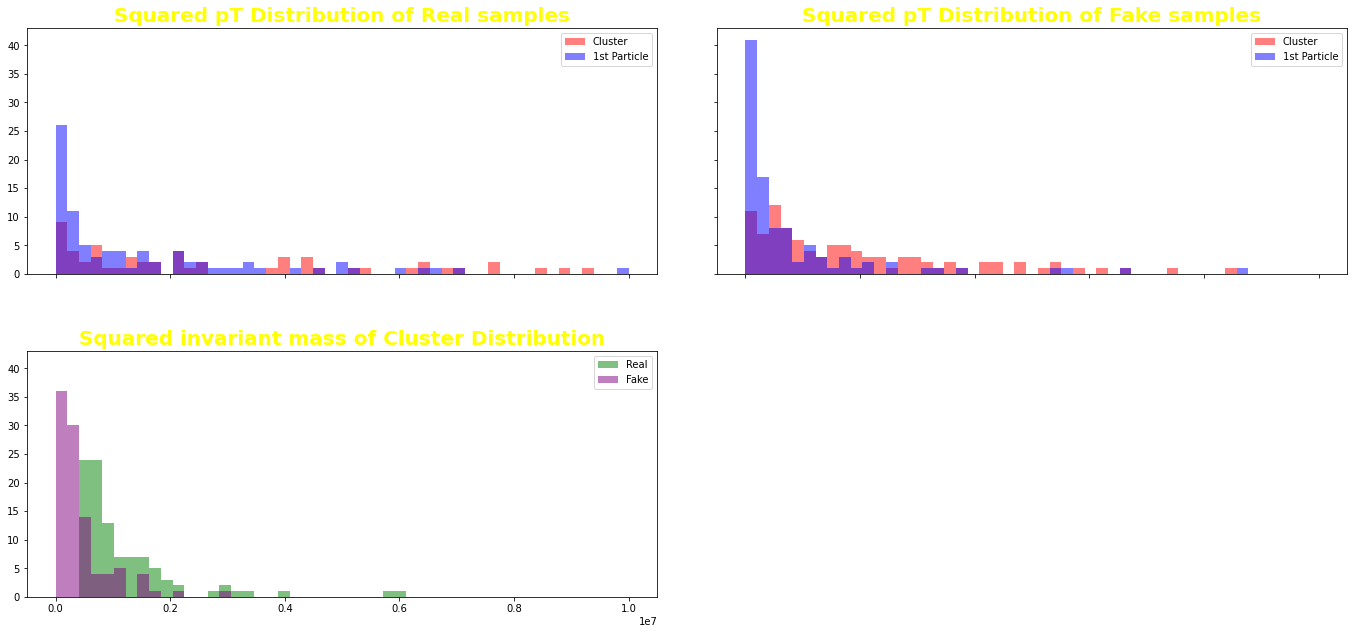

4099 0.8100000023841858 0.3799999952316284


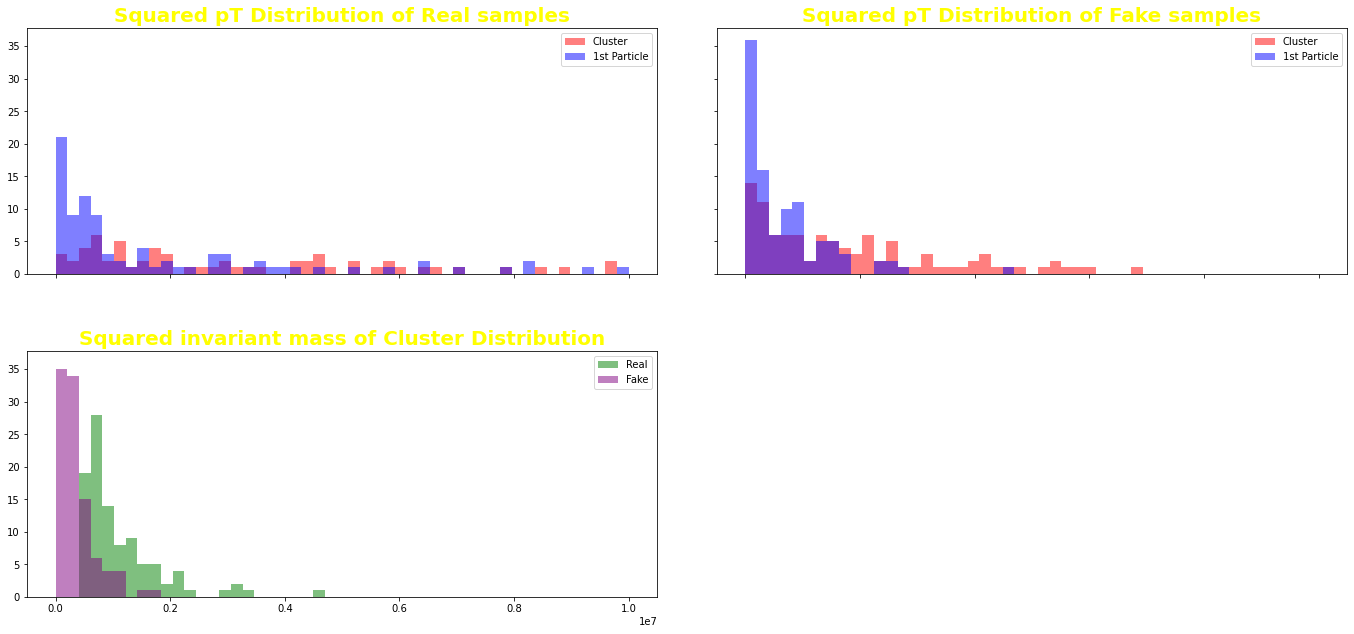

4199 0.6700000166893005 0.44999998807907104


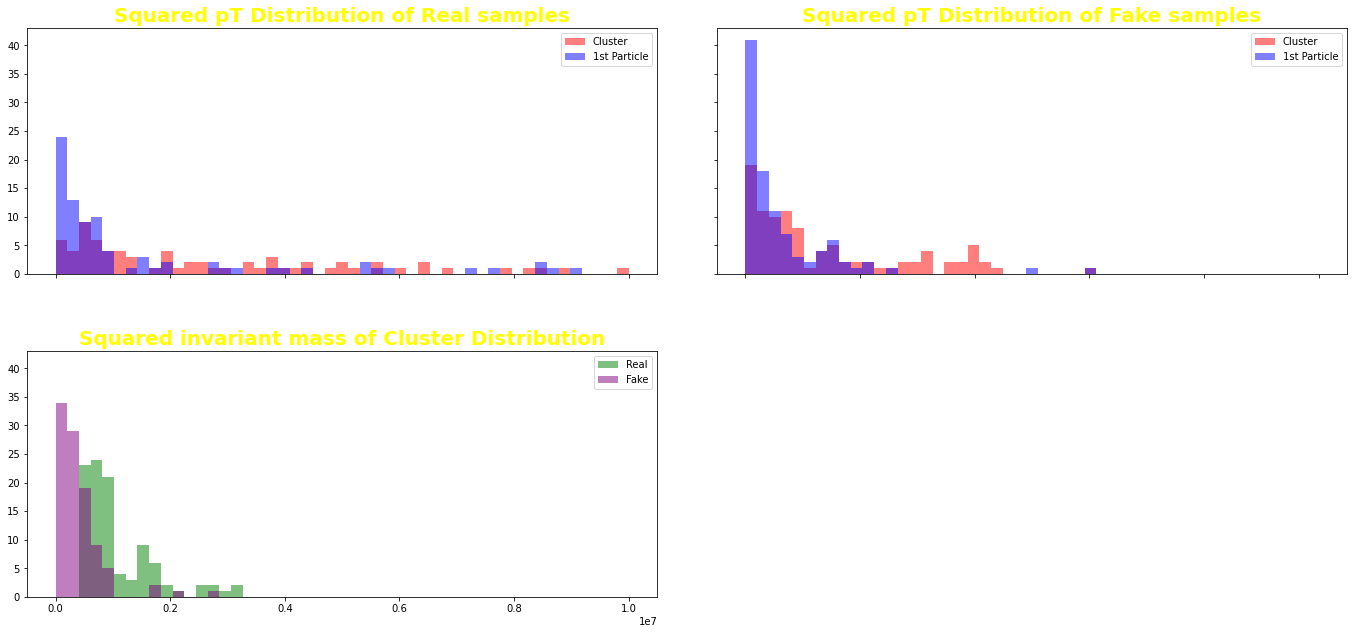

4299 0.75 0.3199999928474426


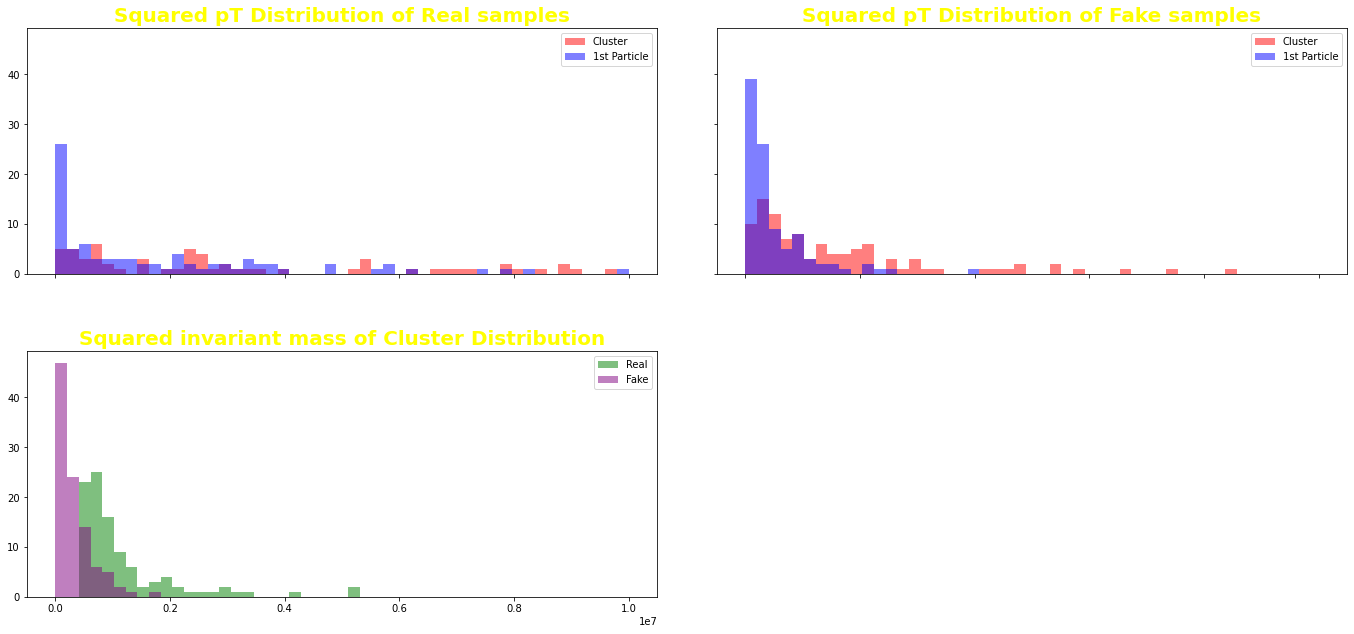

4399 0.5600000023841858 0.5


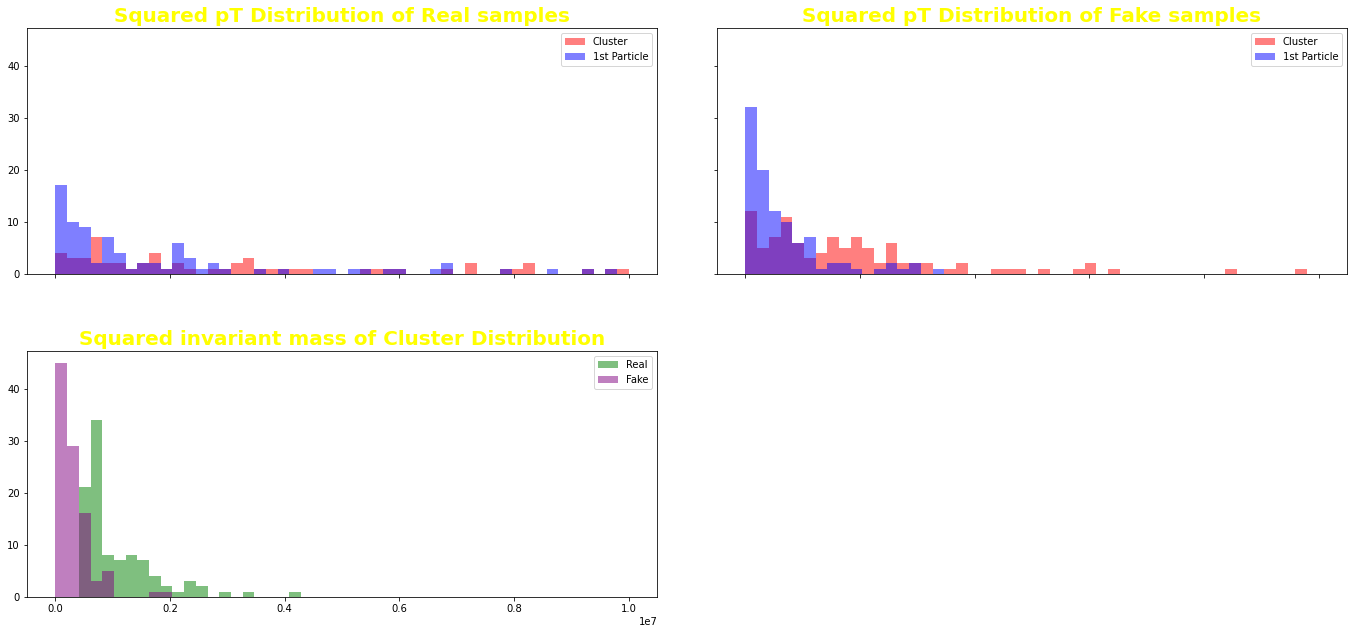

4499 0.6499999761581421 0.46000000834465027


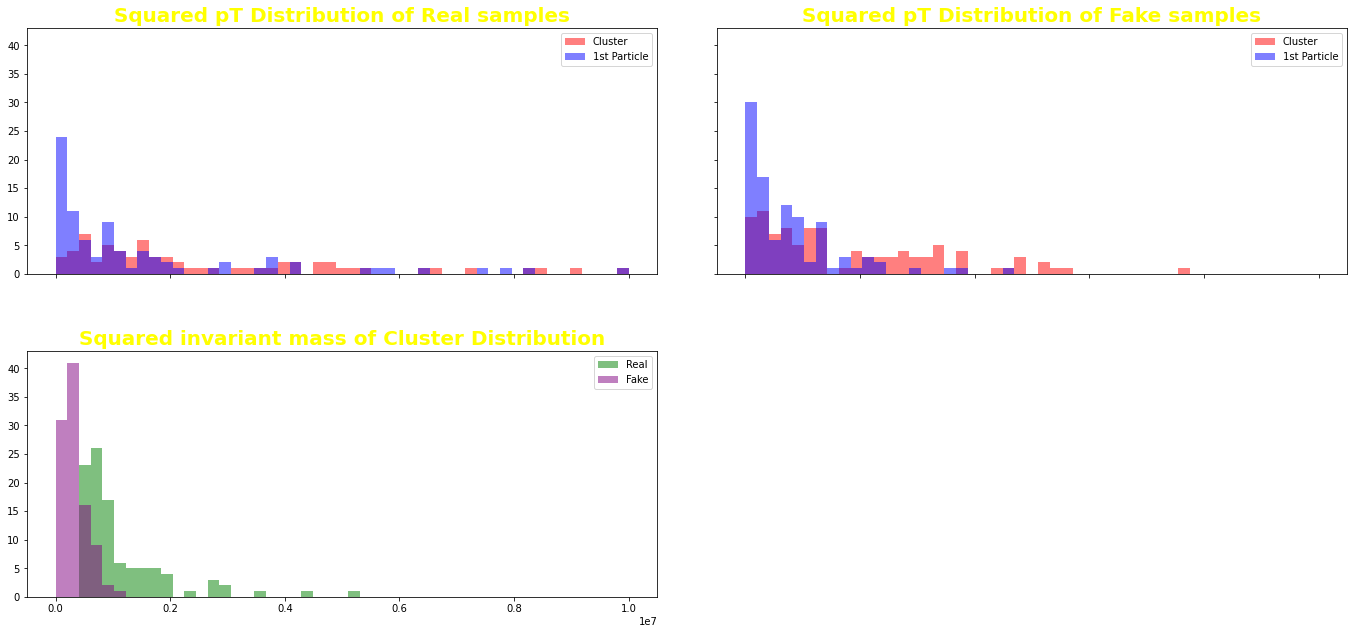

4599 0.5899999737739563 0.4099999964237213


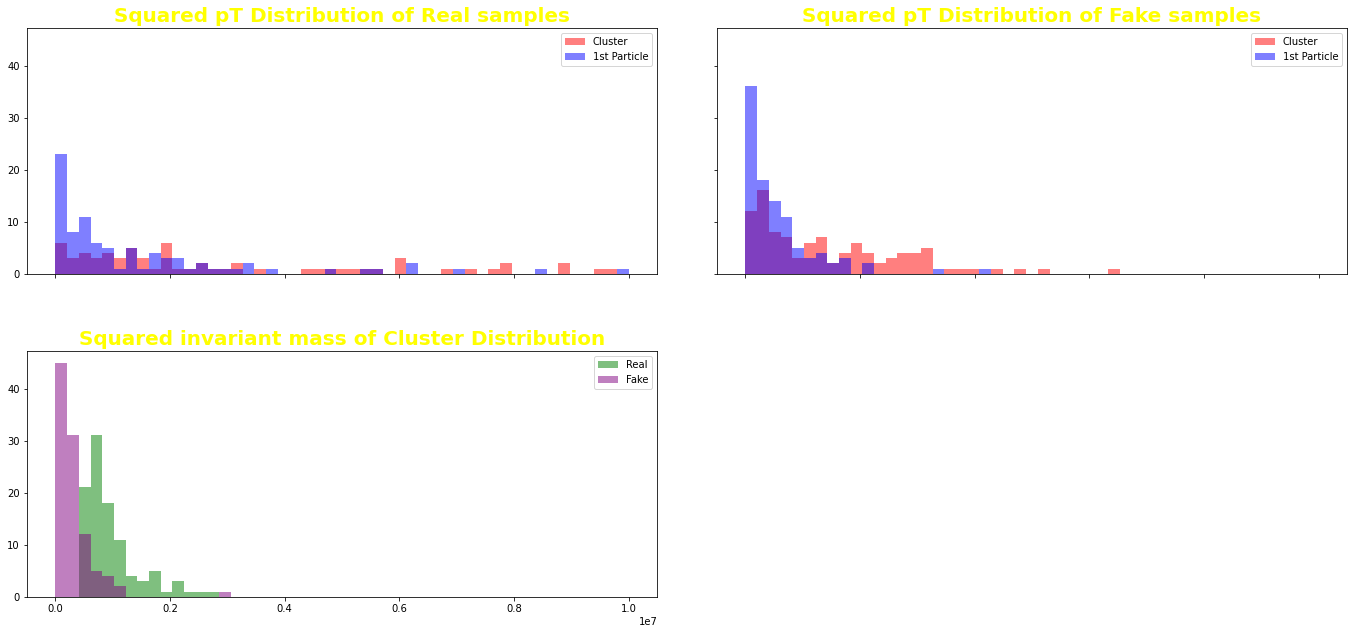

4699 0.699999988079071 0.4000000059604645


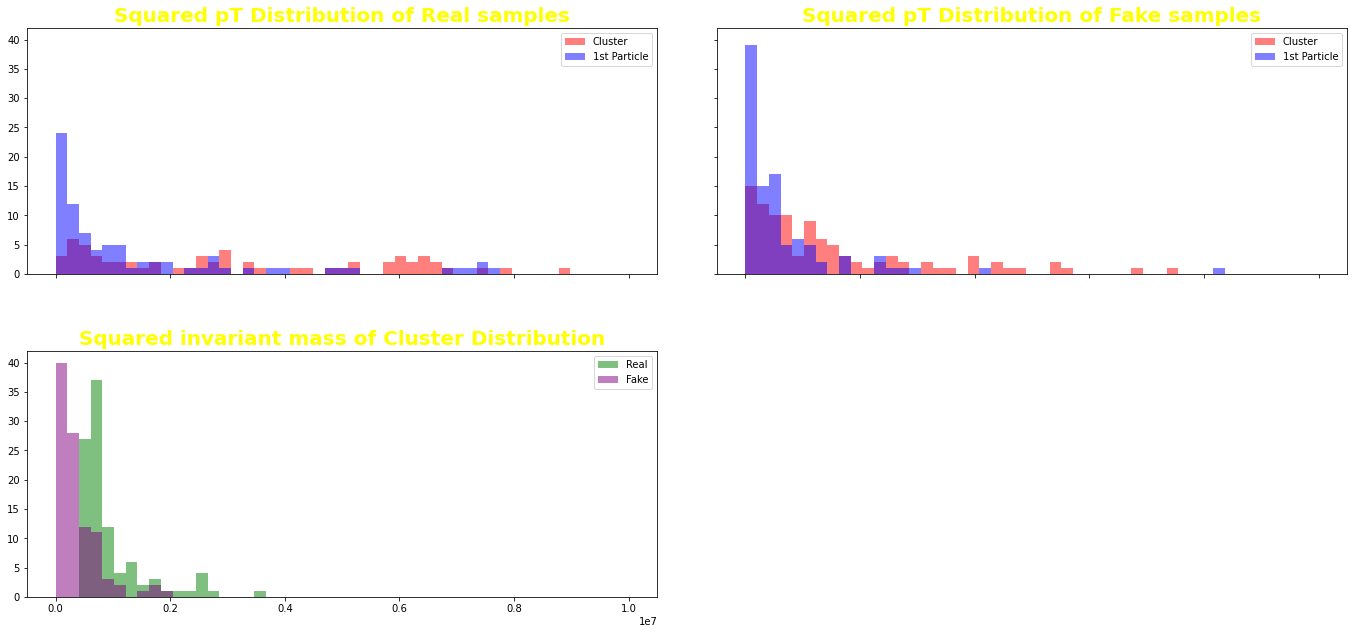

4799 0.6499999761581421 0.6200000047683716


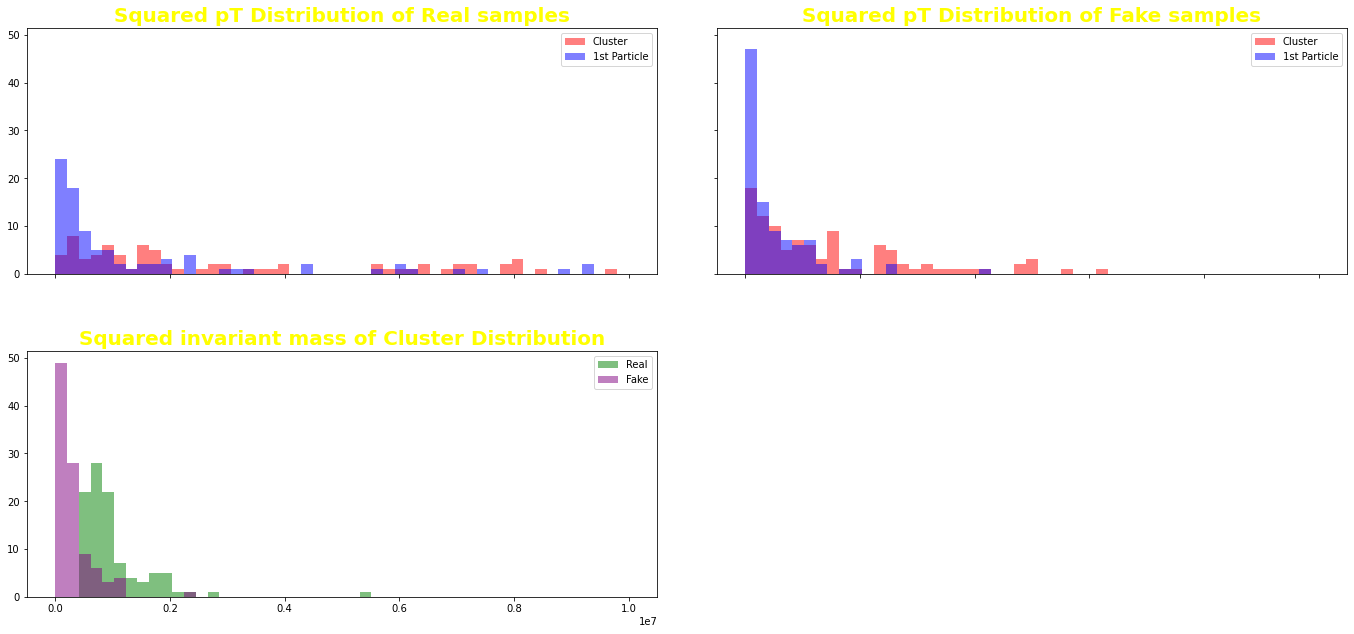

4899 0.7599999904632568 0.4699999988079071


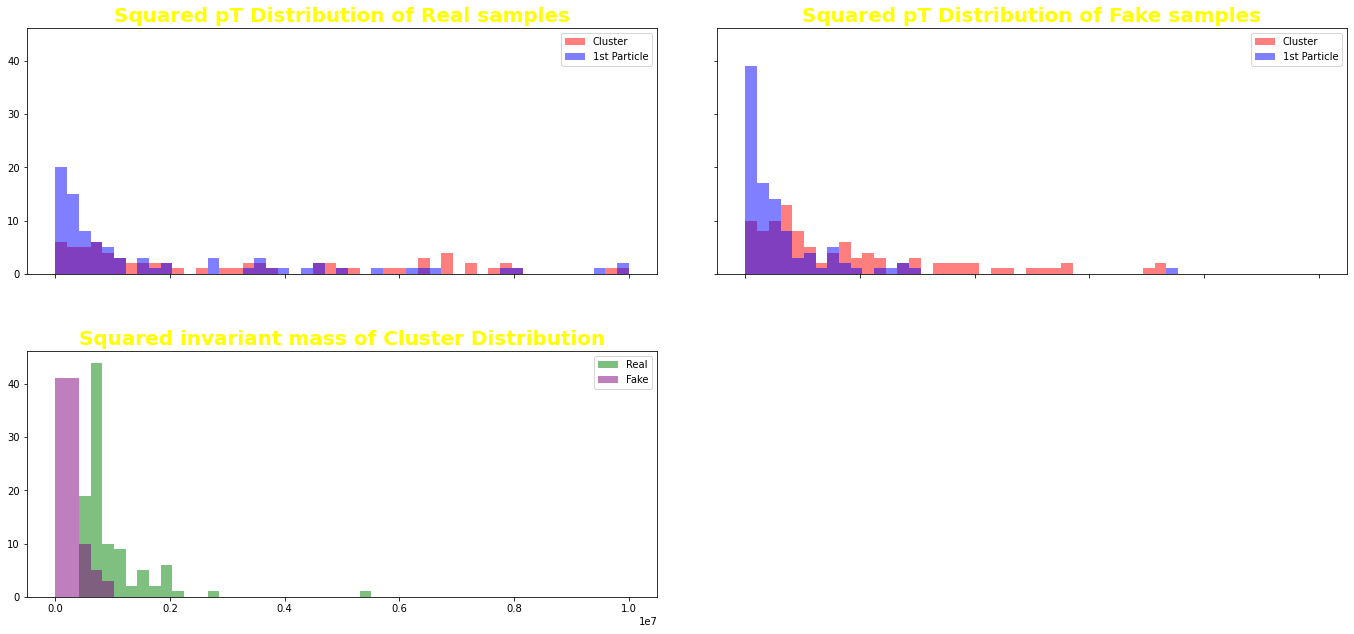

4999 0.6100000143051147 0.38999998569488525


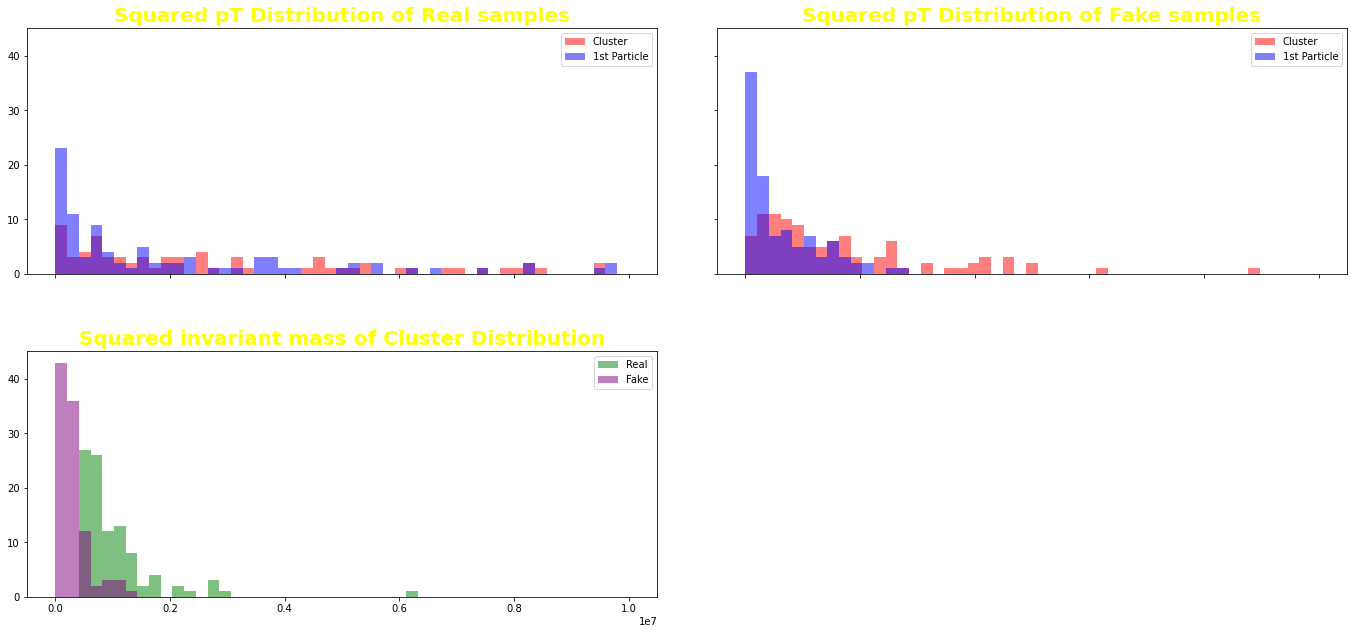

5099 0.7099999785423279 0.3799999952316284


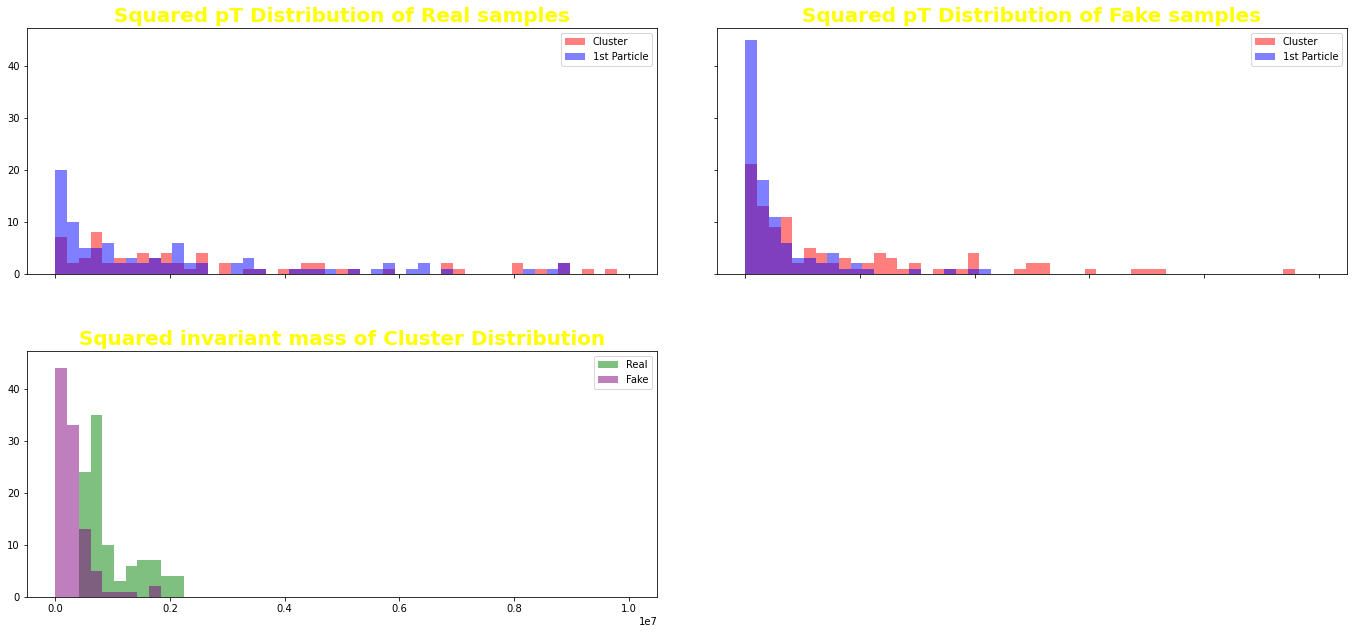

5199 0.7099999785423279 0.3100000023841858


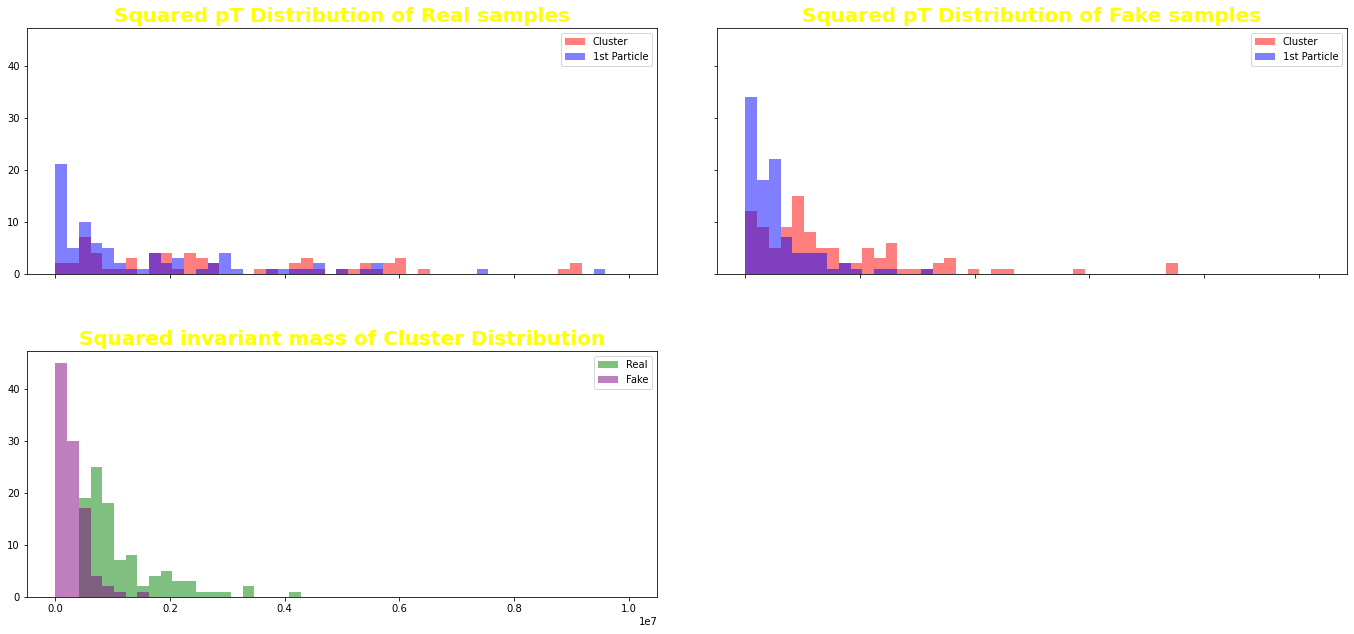

5299 0.6299999952316284 0.5199999809265137


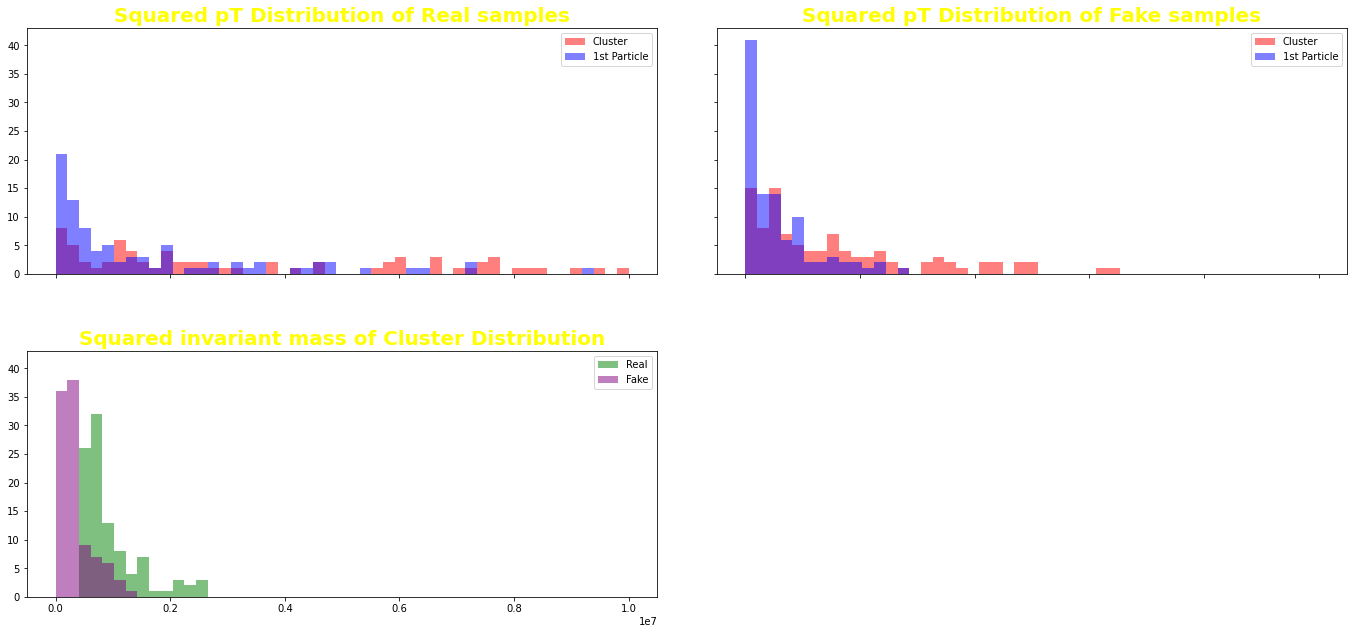

5399 0.6100000143051147 0.5600000023841858


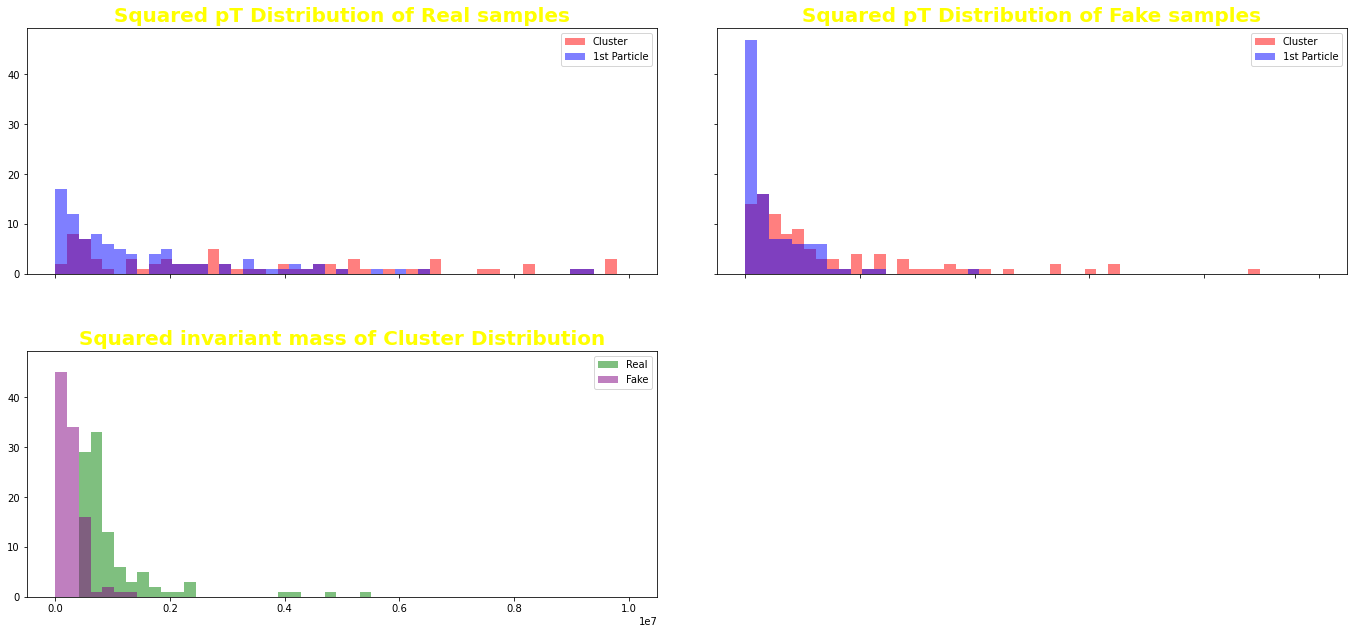

5499 0.5899999737739563 0.5400000214576721


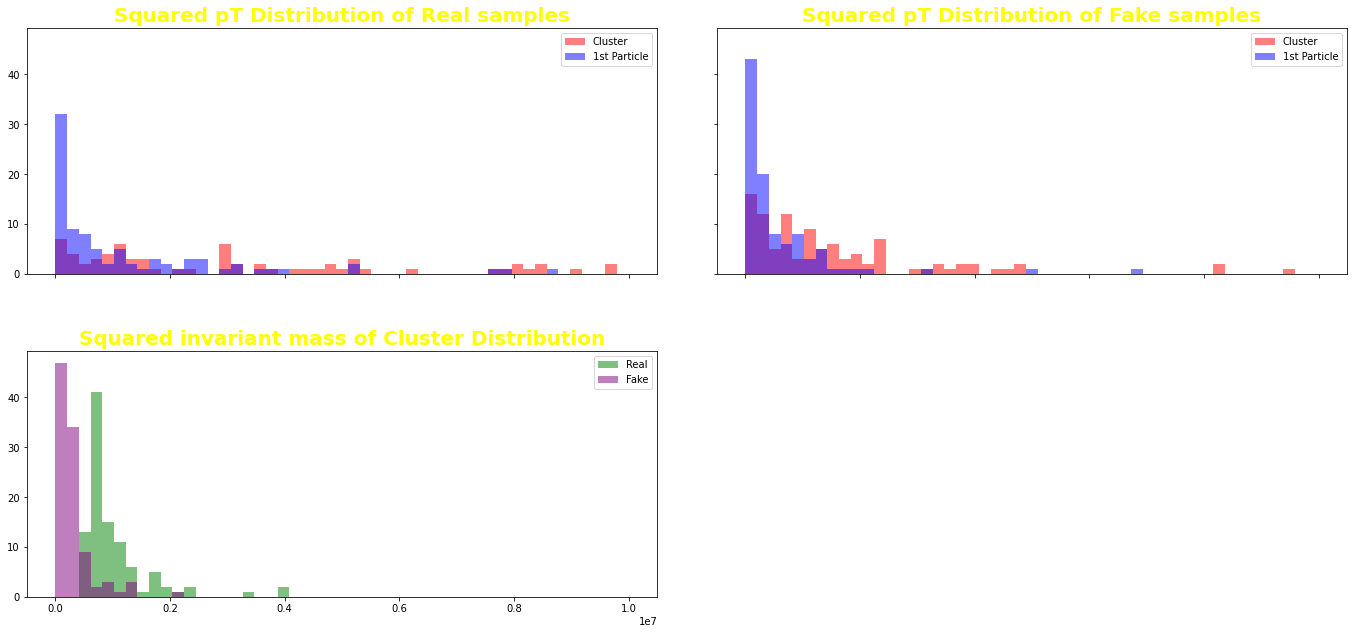

5599 0.6899999976158142 0.4699999988079071


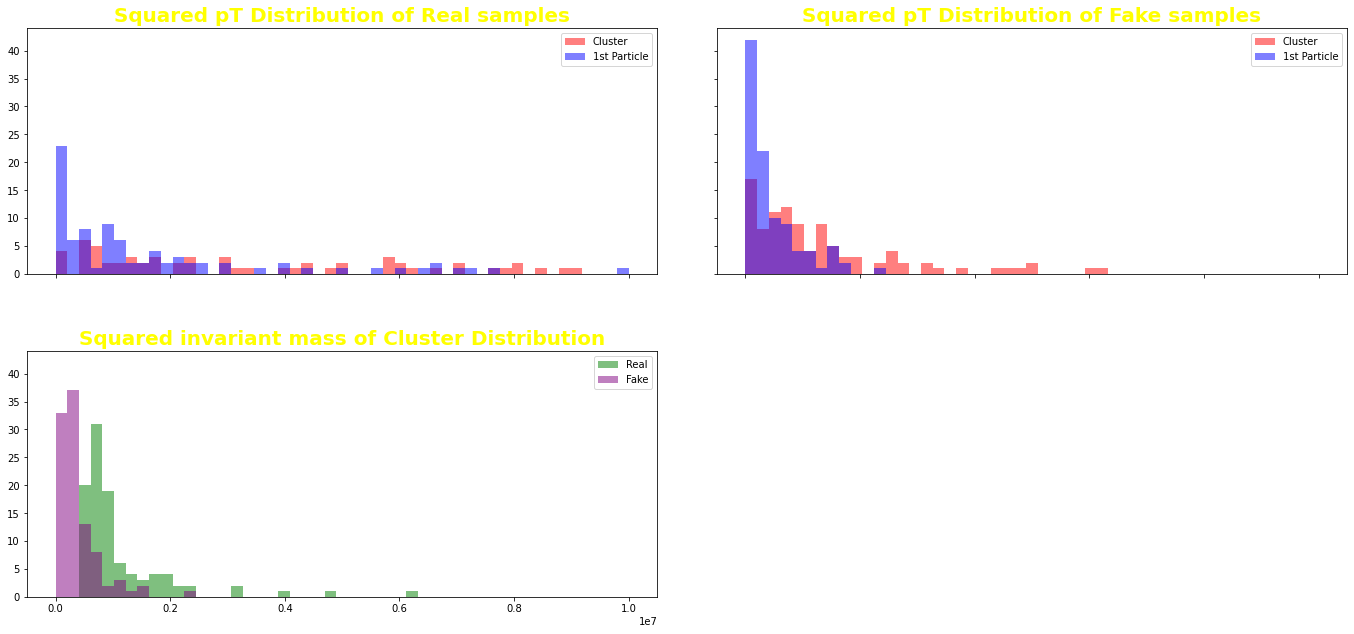

5699 0.6499999761581421 0.6200000047683716


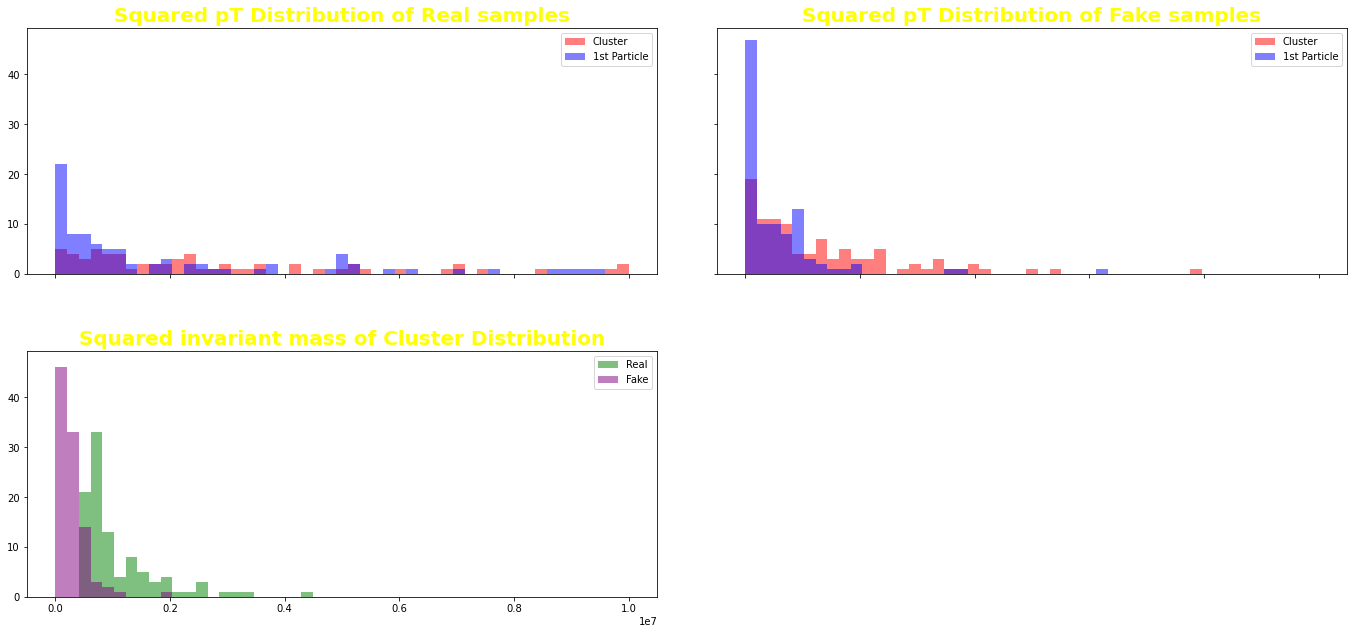

5799 0.6899999976158142 0.550000011920929


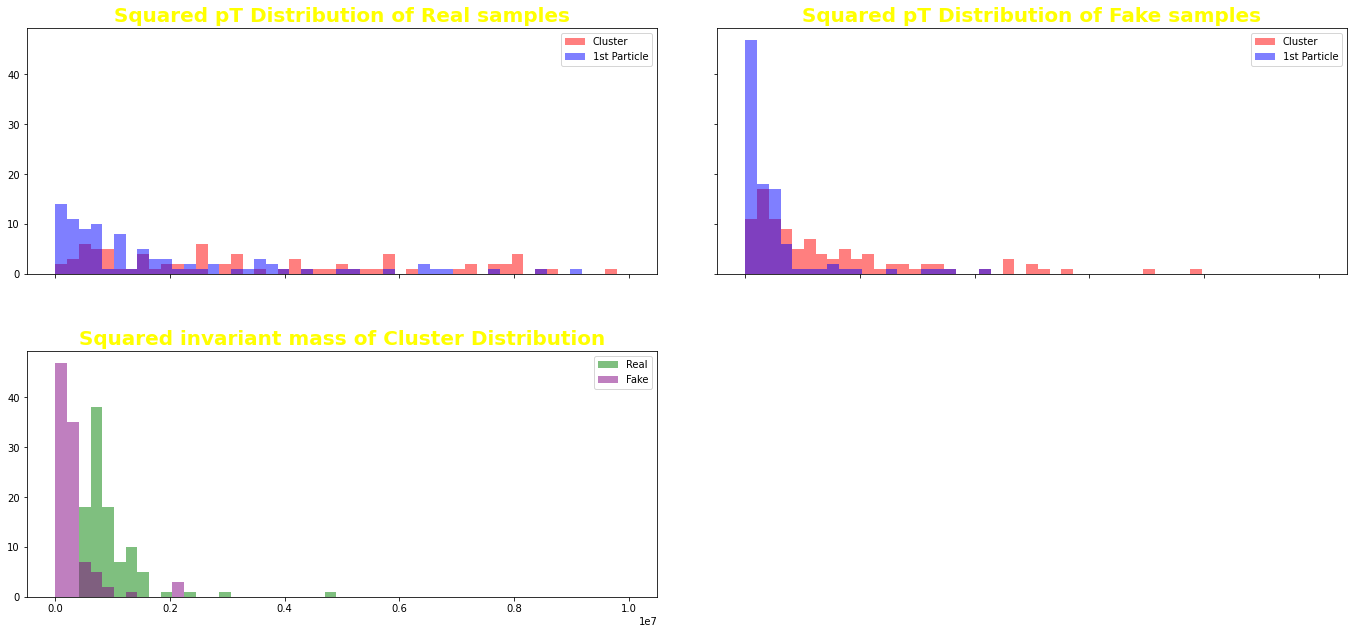

5899 0.5799999833106995 0.6399999856948853


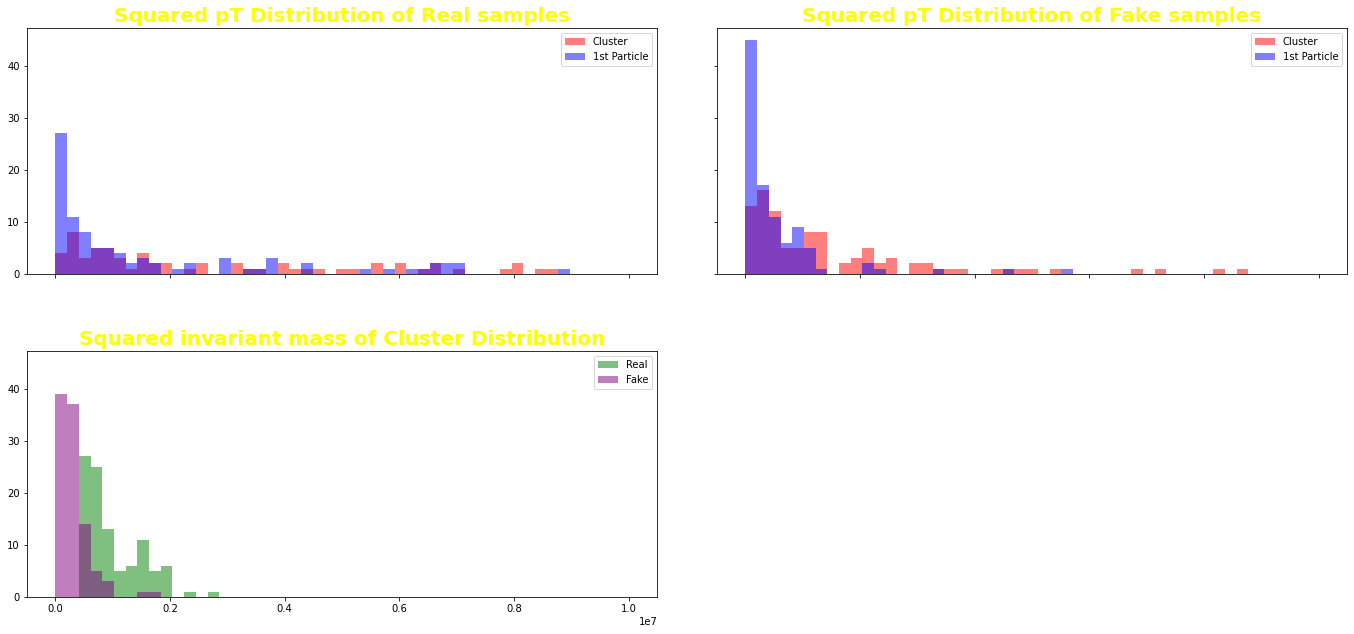

5999 0.699999988079071 0.4099999964237213


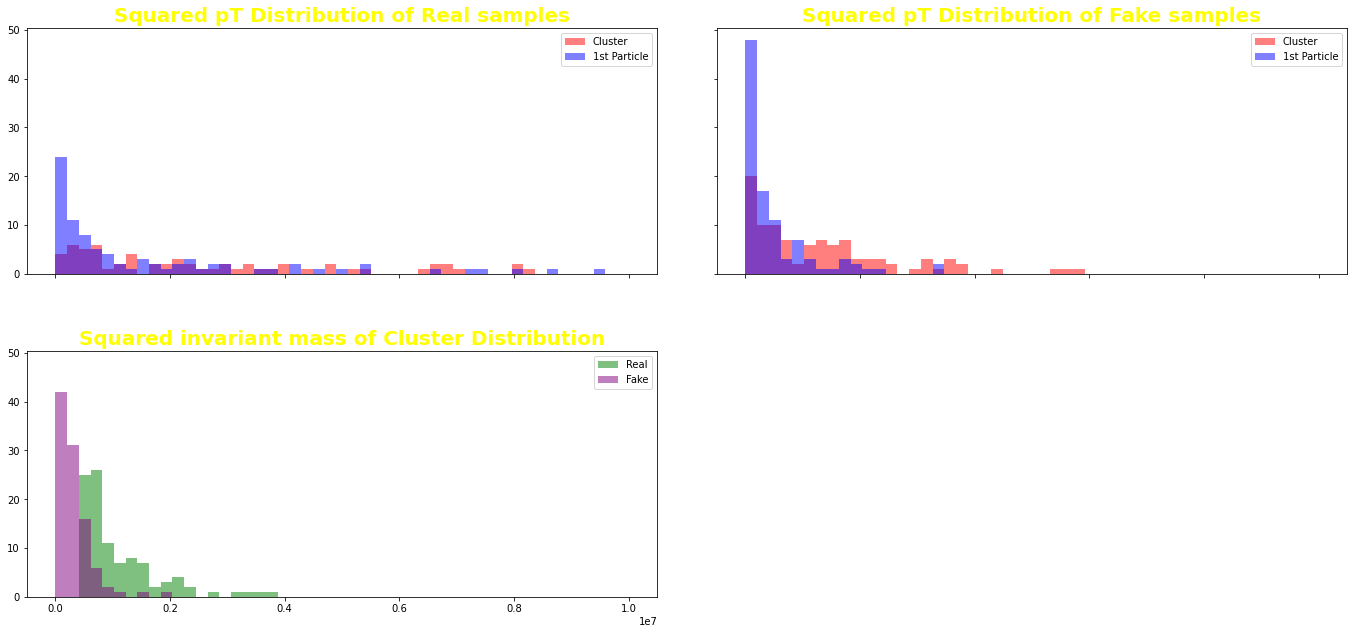

6099 0.699999988079071 0.49000000953674316


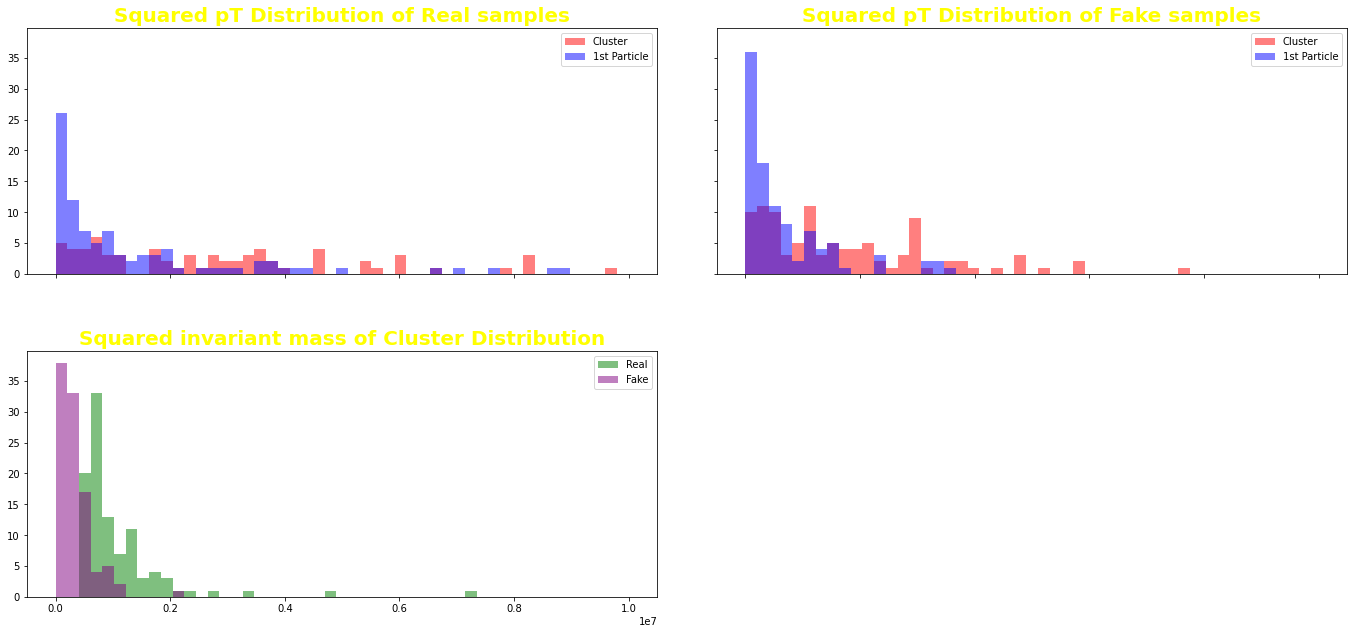

6199 0.6800000071525574 0.4699999988079071


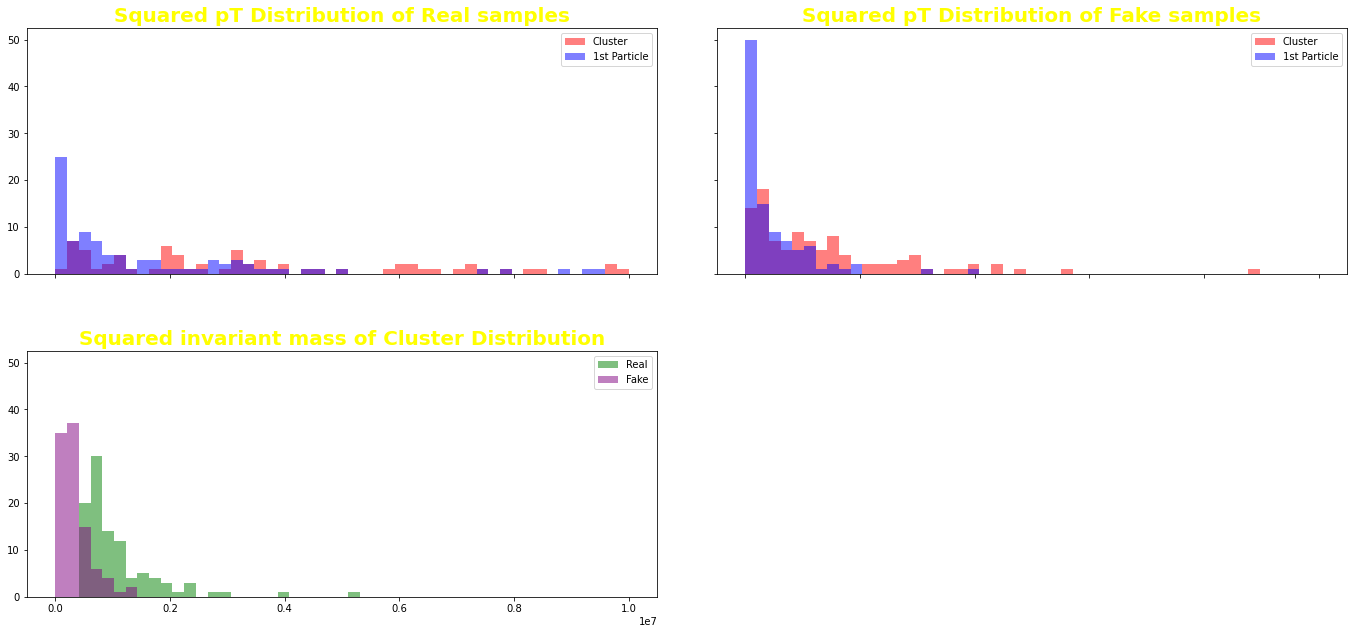

6299 0.6899999976158142 0.47999998927116394


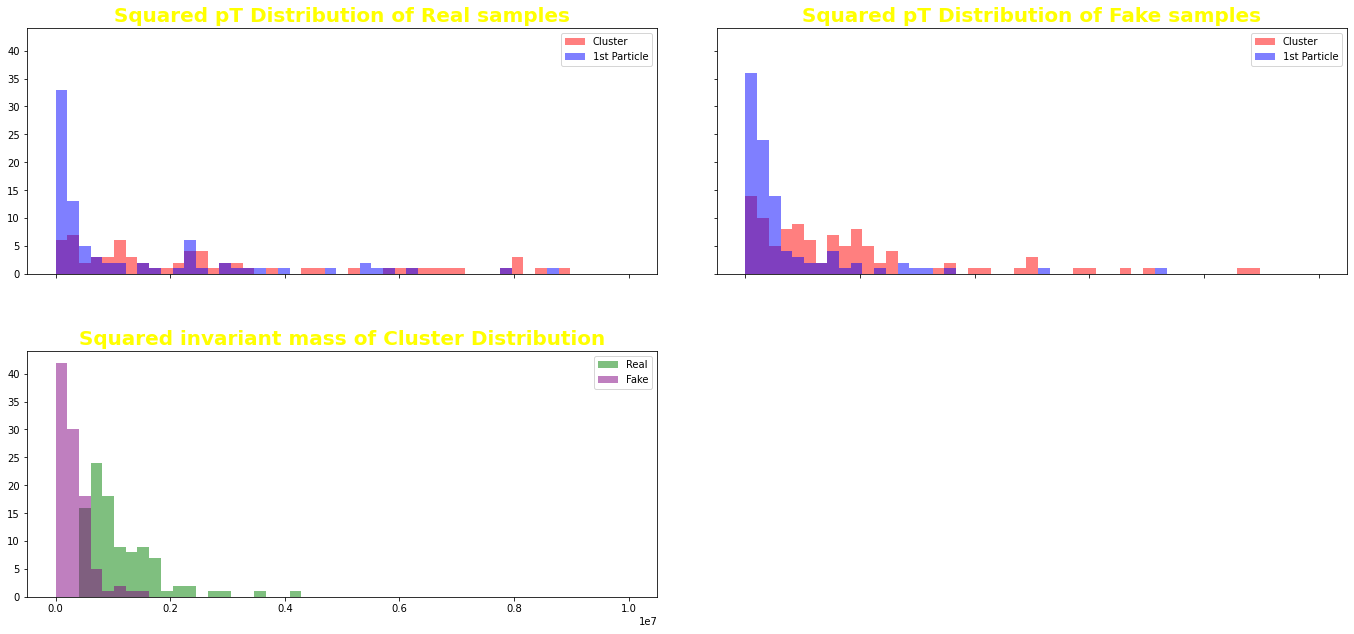

6399 0.6700000166893005 0.44999998807907104


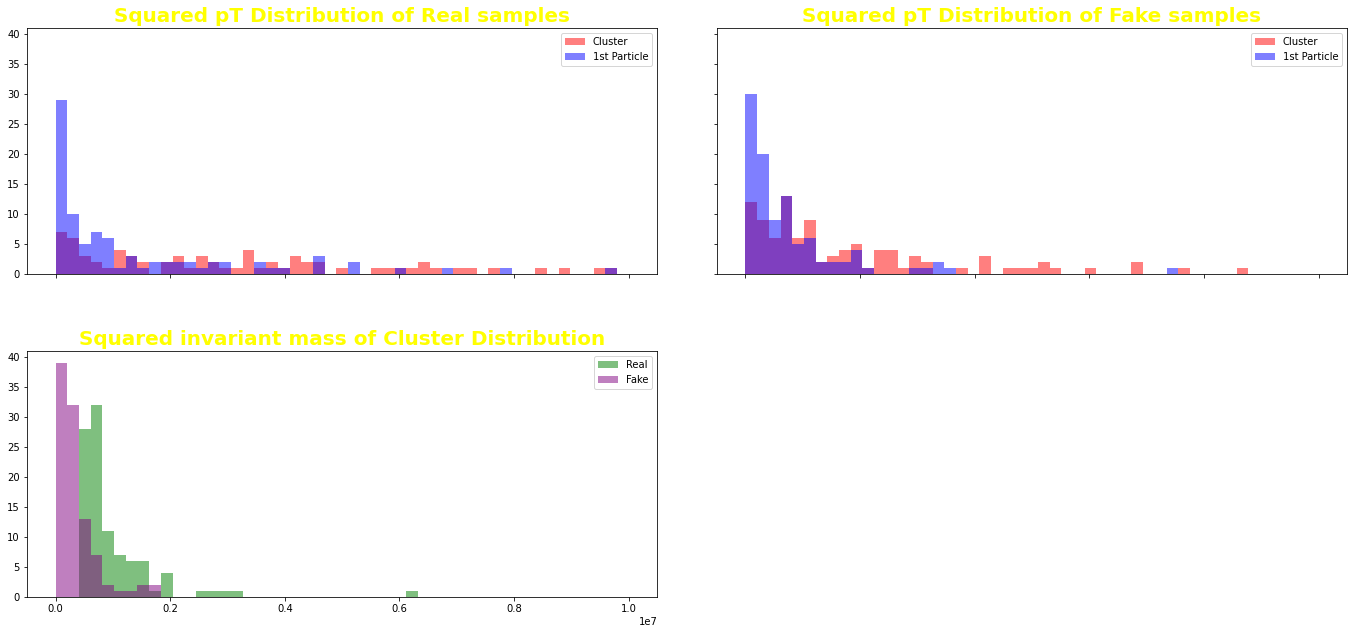

6499 0.6600000262260437 0.3799999952316284


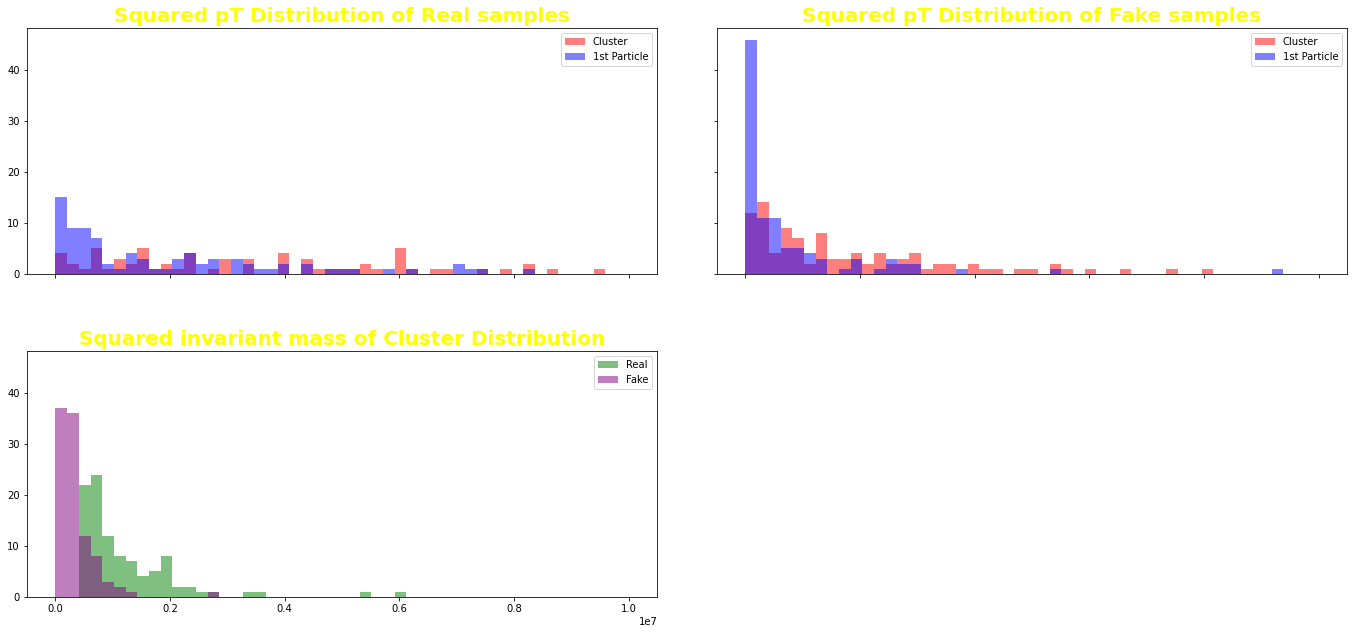

6599 0.7099999785423279 0.33000001311302185


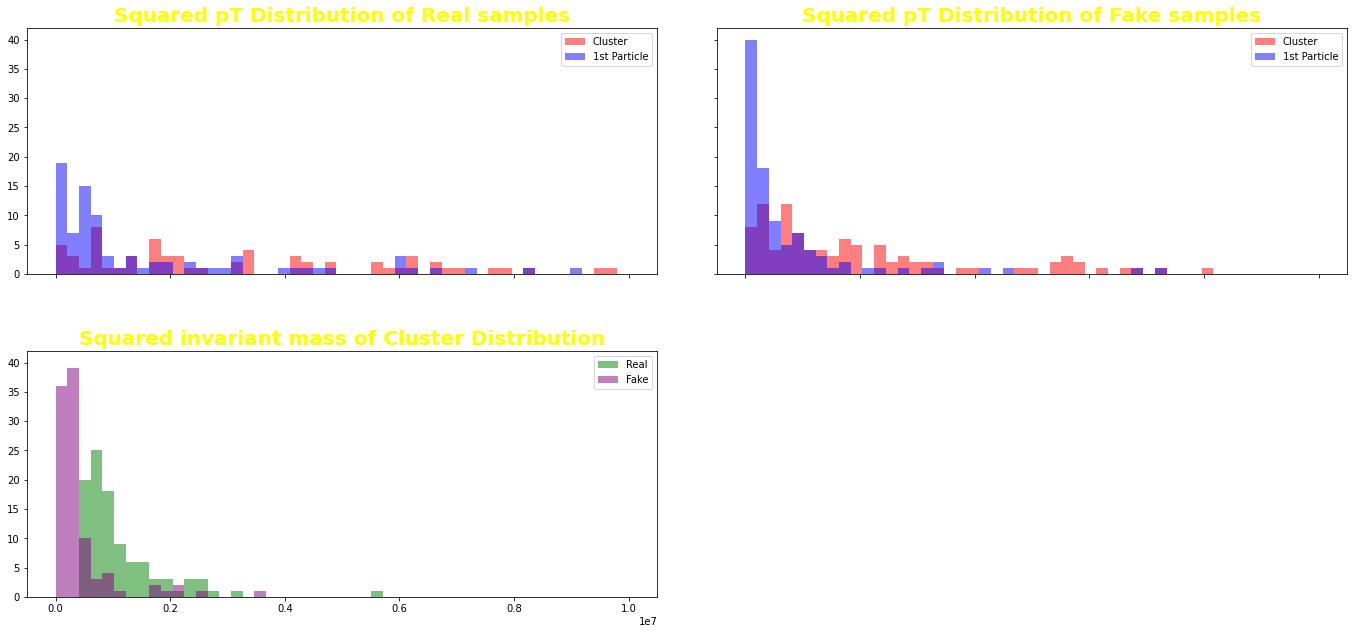

6699 0.550000011920929 0.6299999952316284


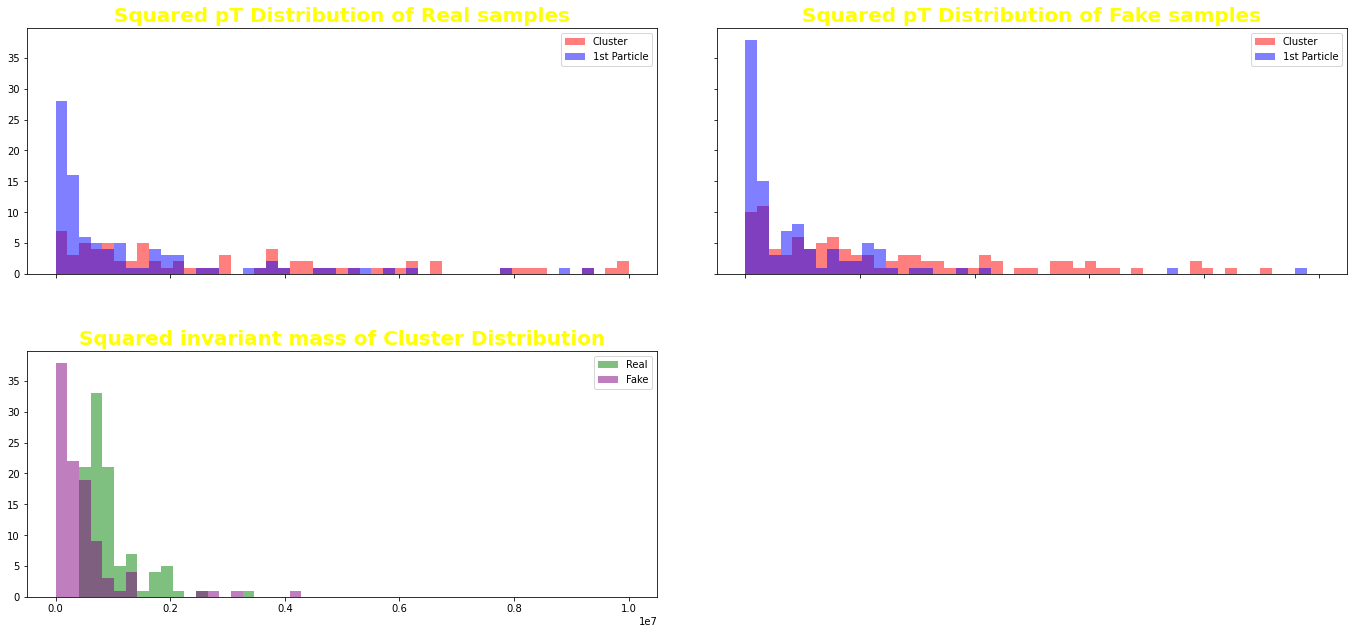

6799 0.5799999833106995 0.5


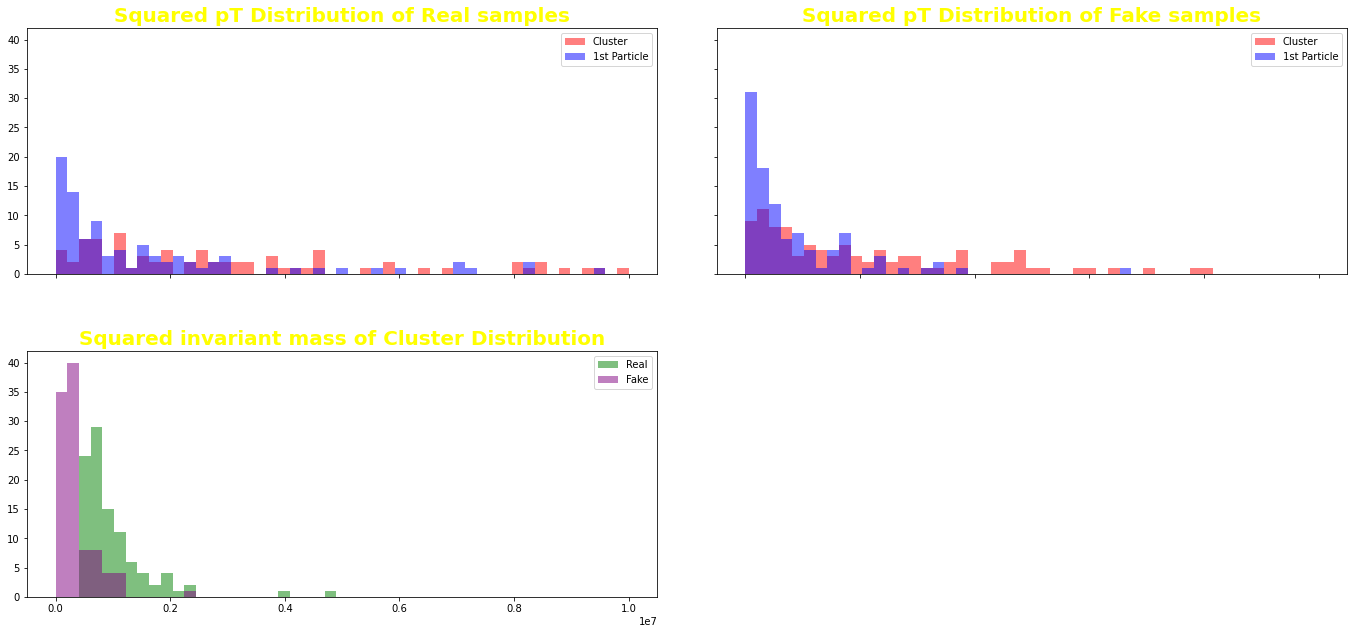

6899 0.6600000262260437 0.44999998807907104


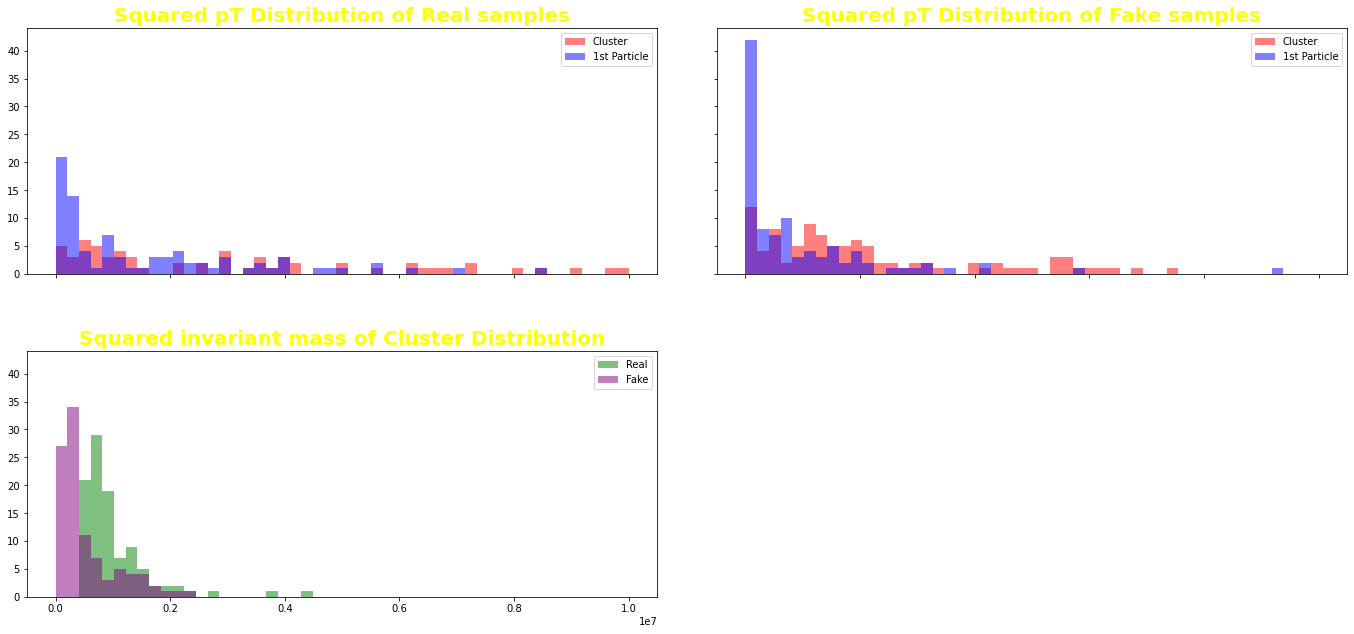

6999 0.6200000047683716 0.699999988079071


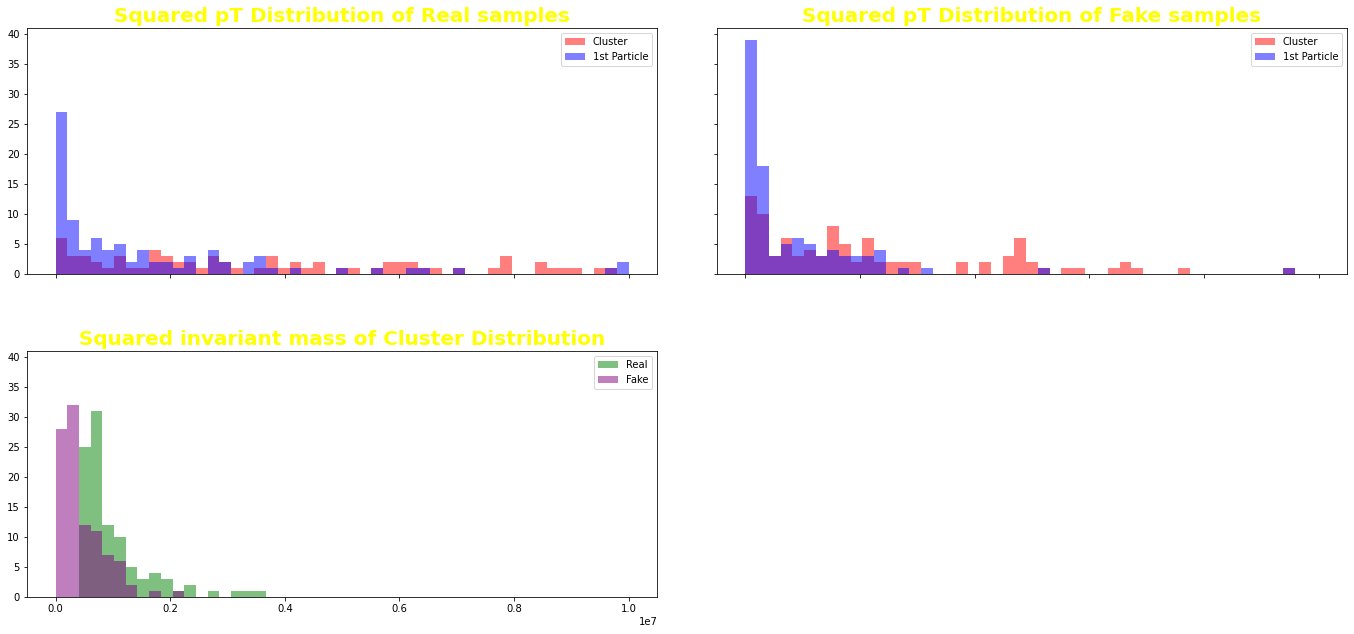

7099 0.5600000023841858 0.5799999833106995


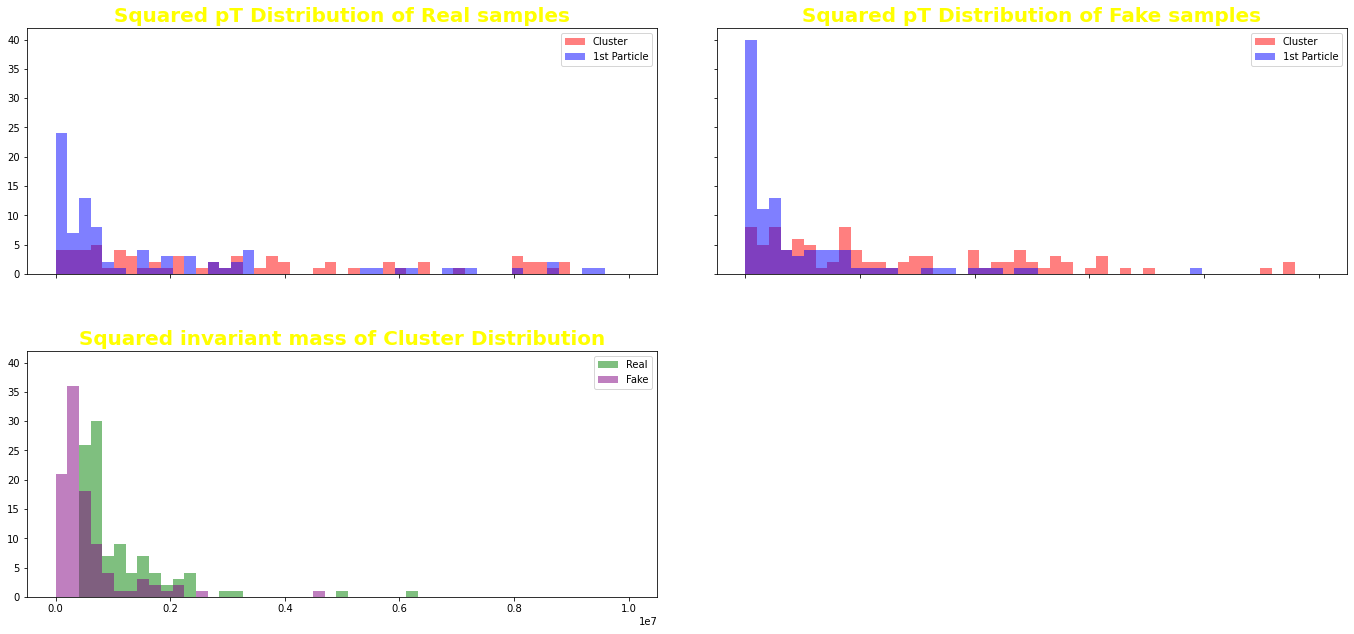

7199 0.6899999976158142 0.4300000071525574


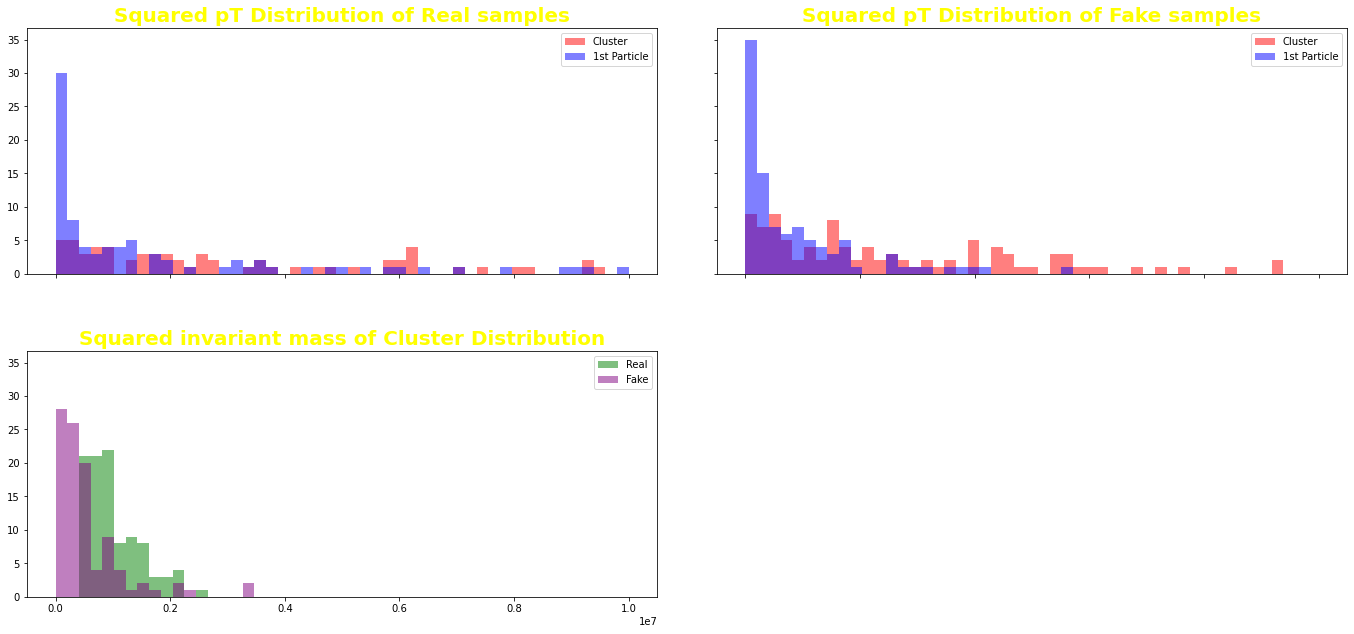

7299 0.6399999856948853 0.5400000214576721


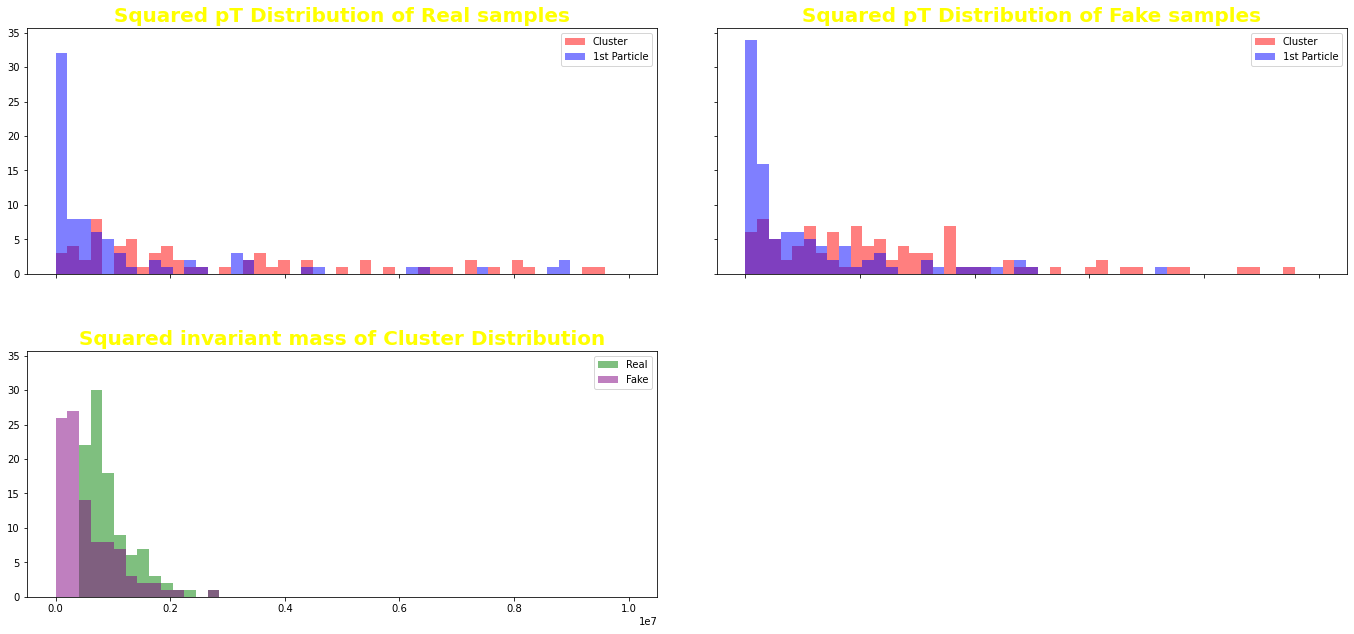

7399 0.5699999928474426 0.5600000023841858


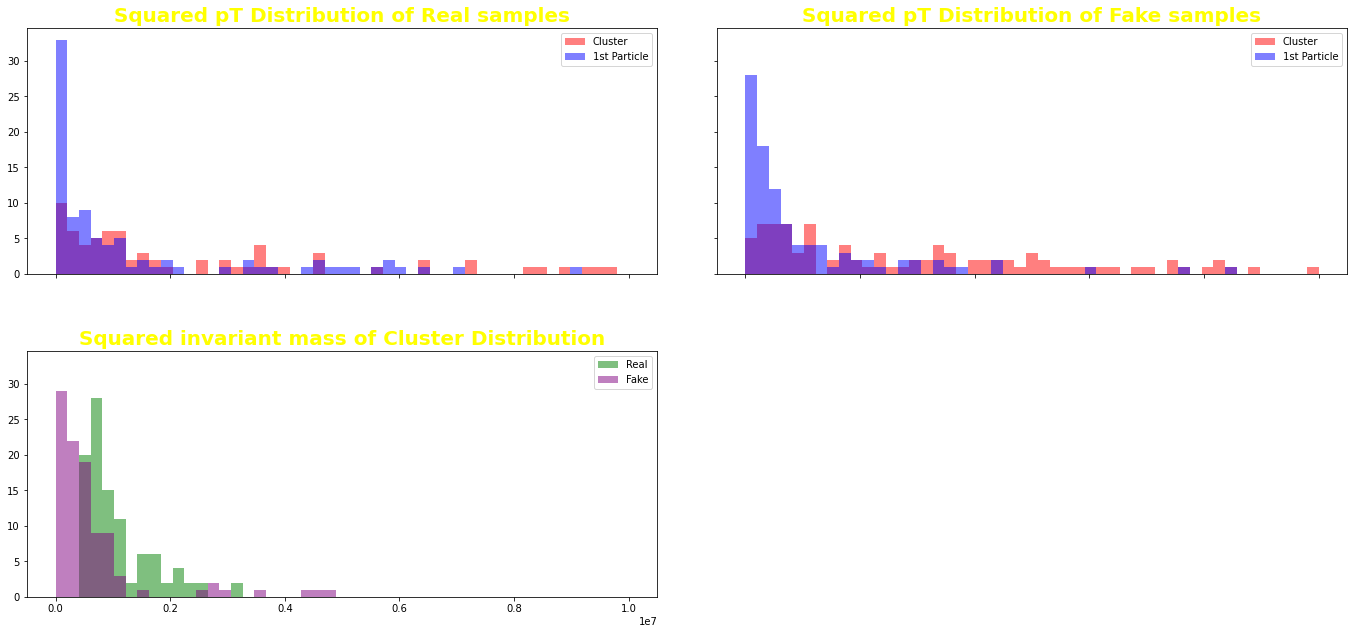

7499 0.6000000238418579 0.6299999952316284


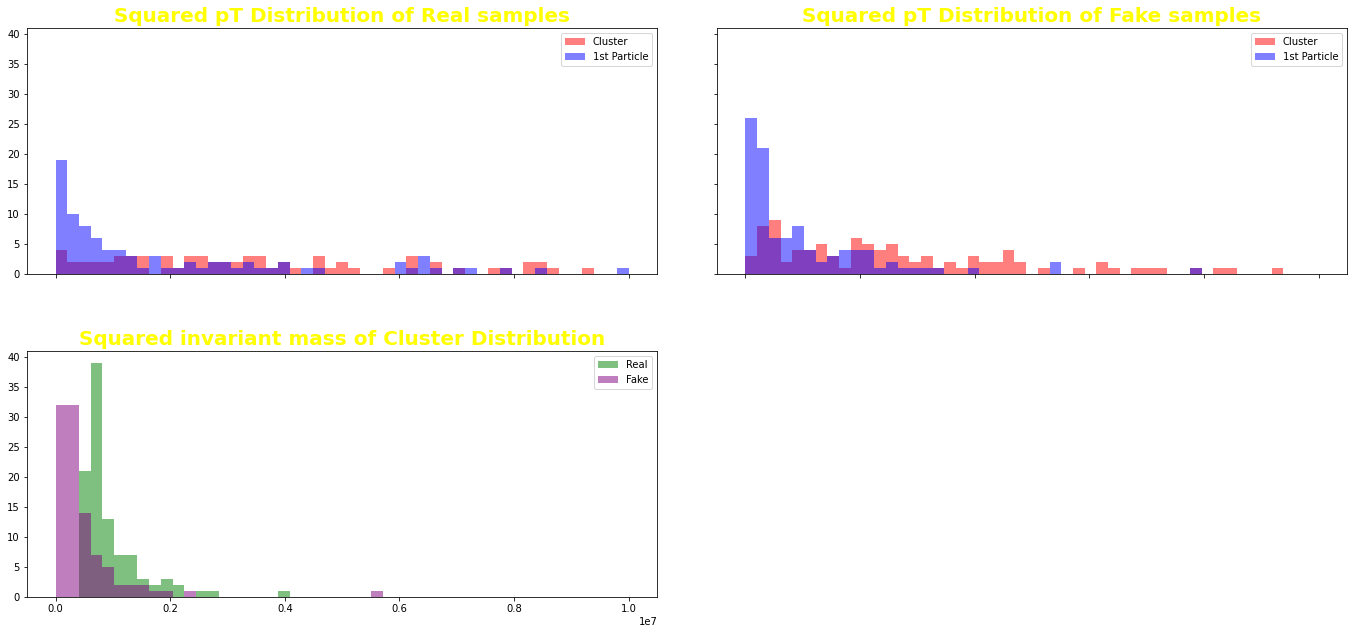

7599 0.4399999976158142 0.6399999856948853


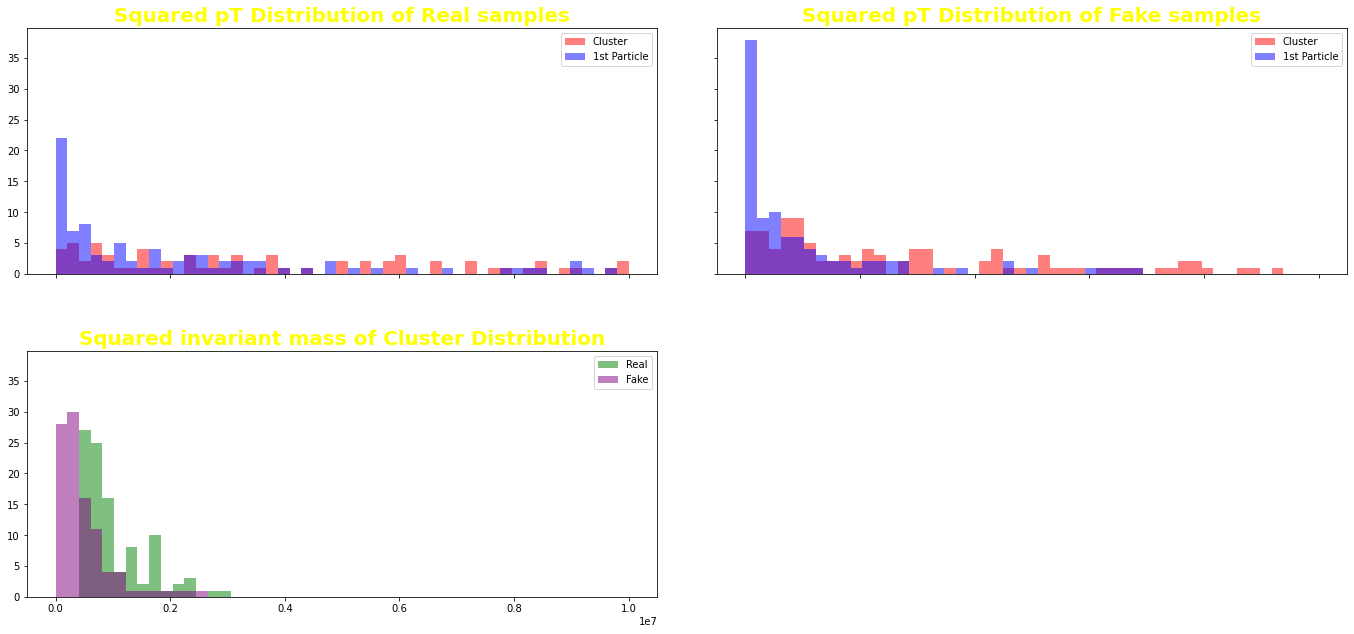

7699 0.46000000834465027 0.6100000143051147


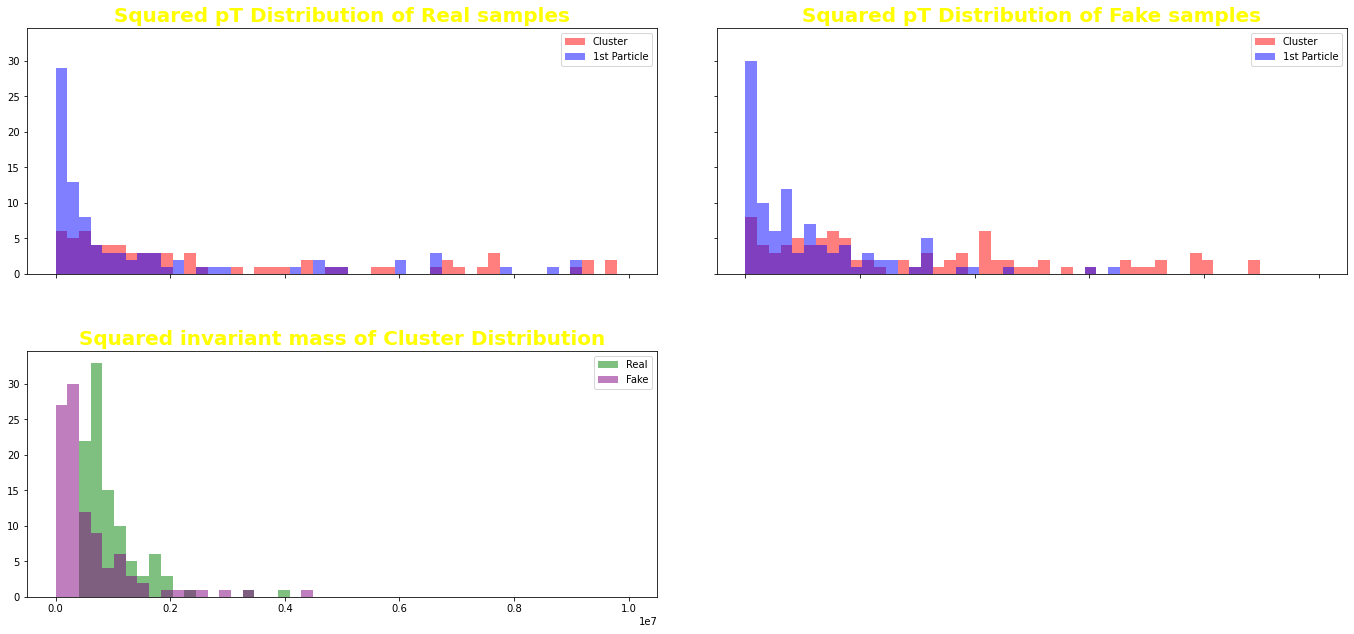

7799 0.5099999904632568 0.5699999928474426


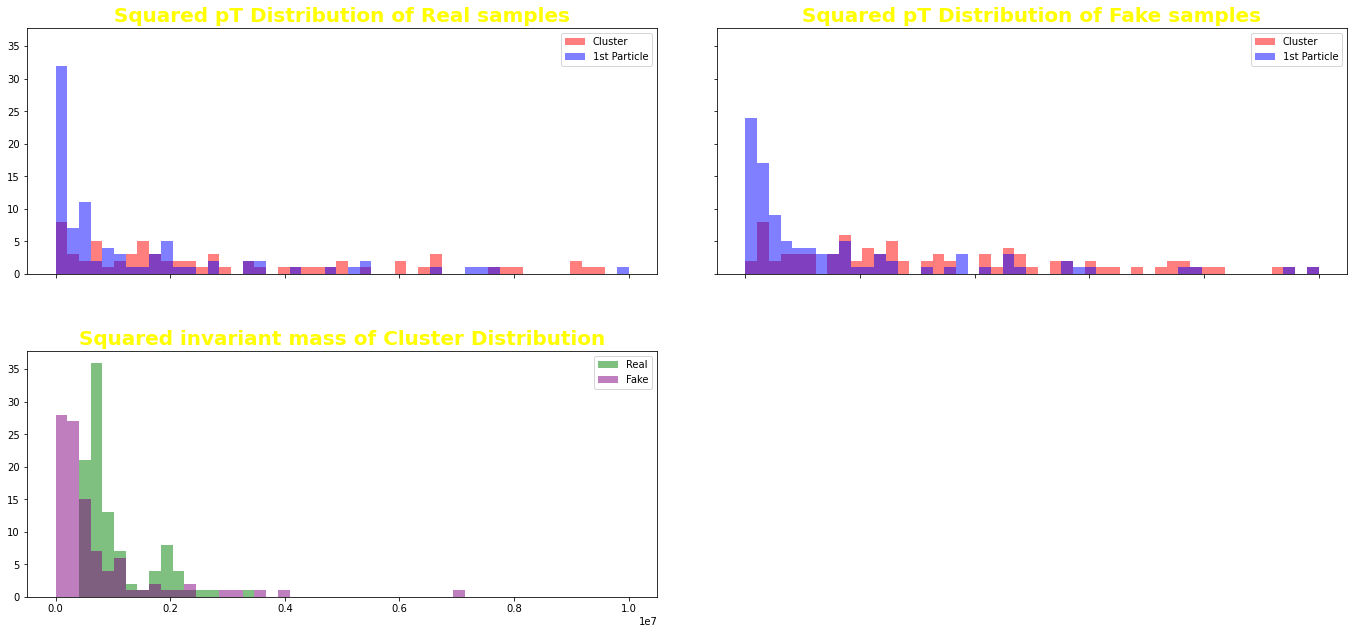

7899 0.4699999988079071 0.6399999856948853


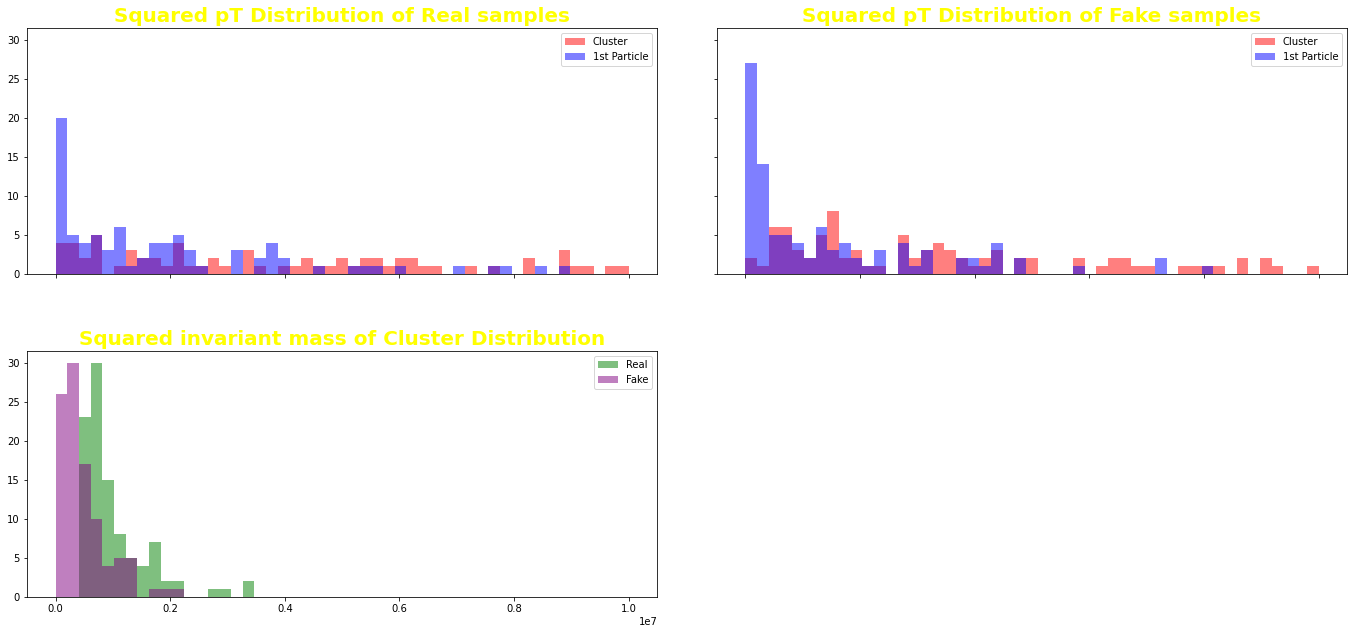

7999 0.4000000059604645 0.7300000190734863


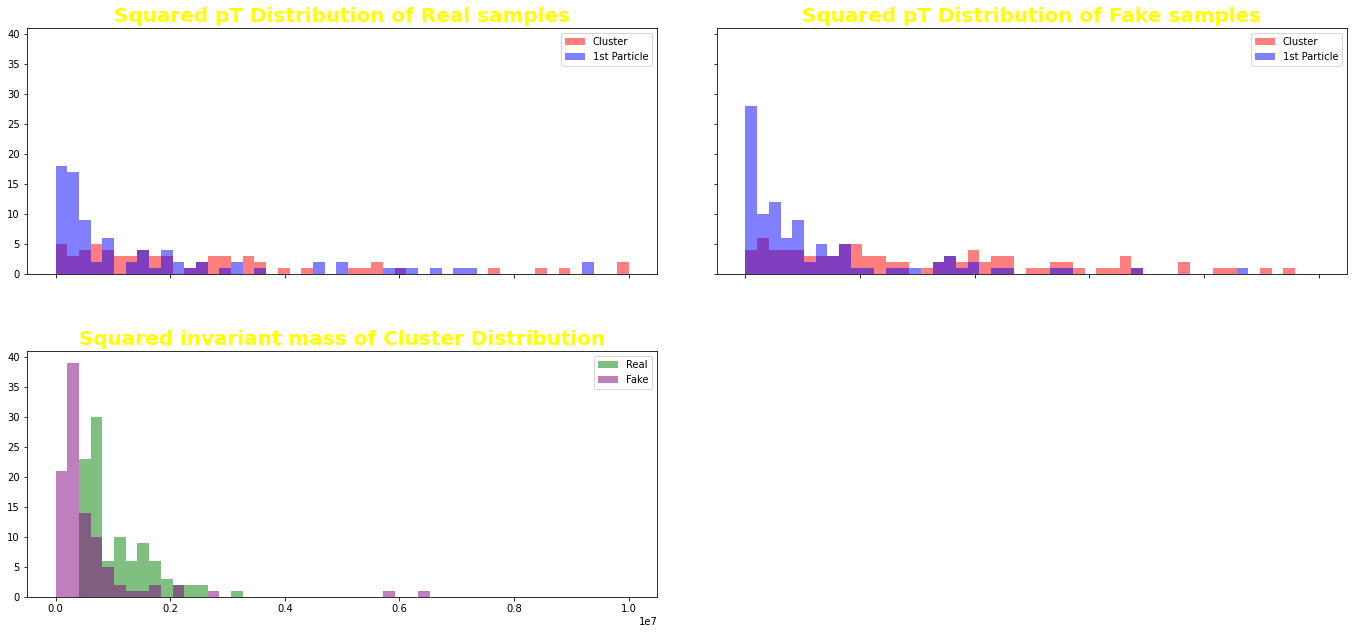

8099 0.46000000834465027 0.5299999713897705


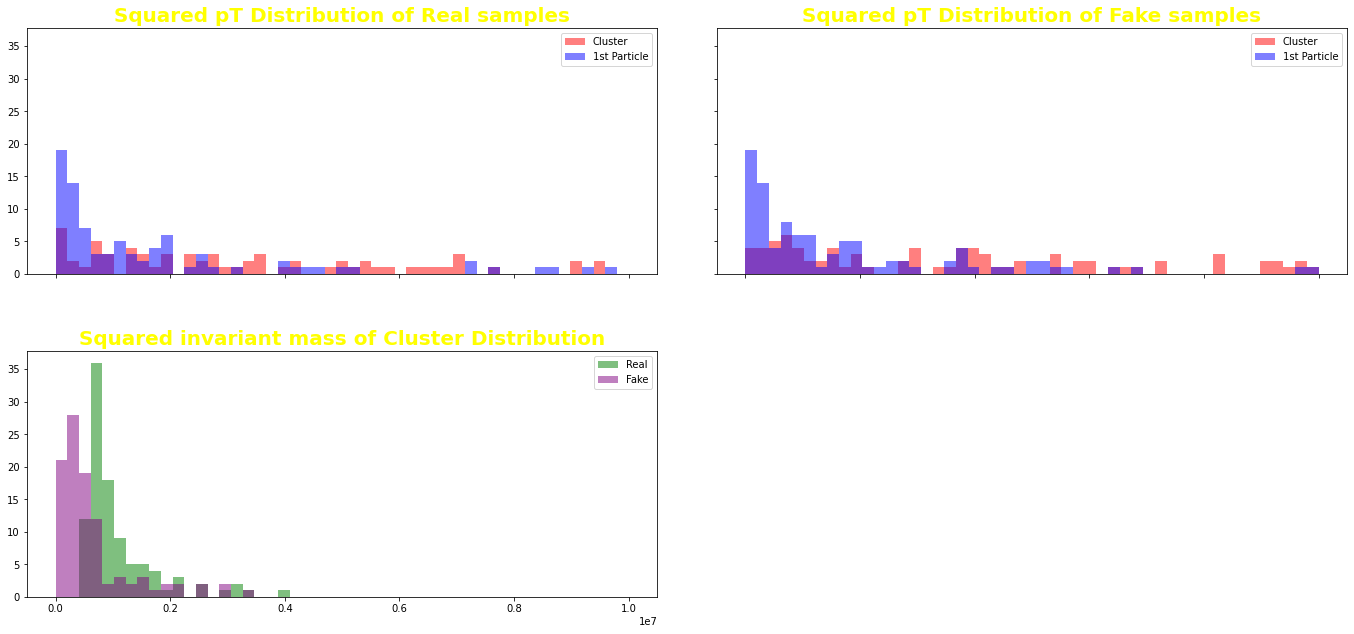

8199 0.5299999713897705 0.5099999904632568


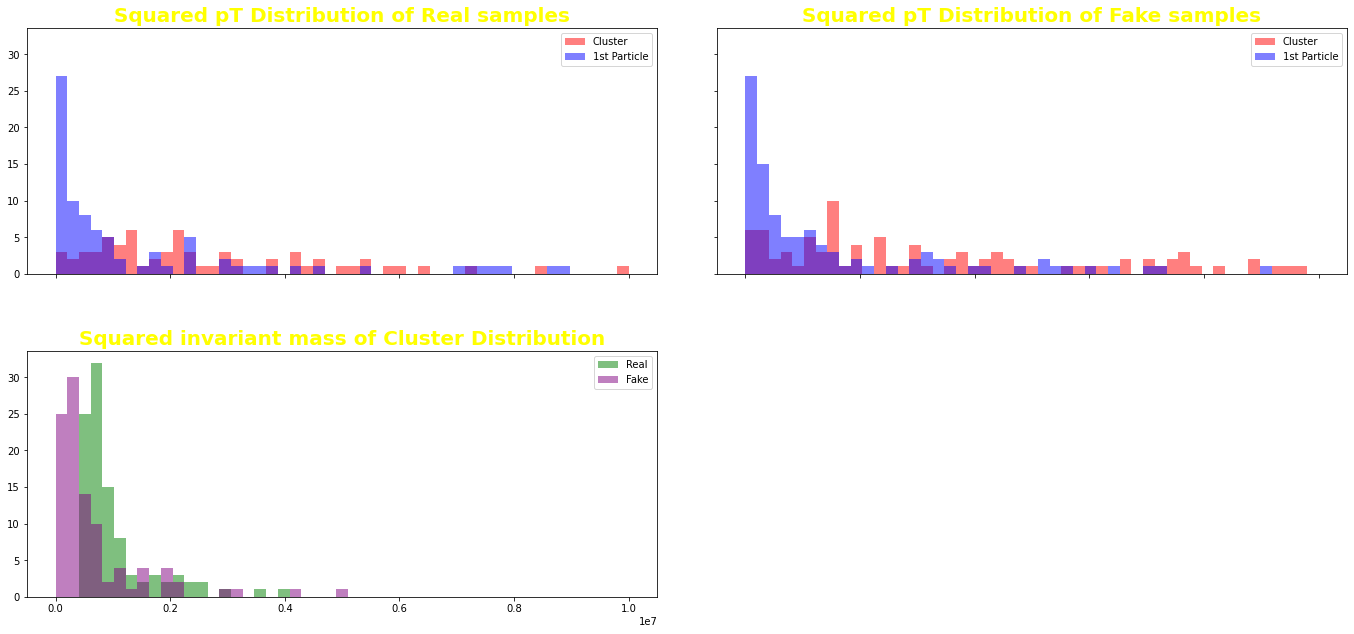

8299 0.5 0.6899999976158142


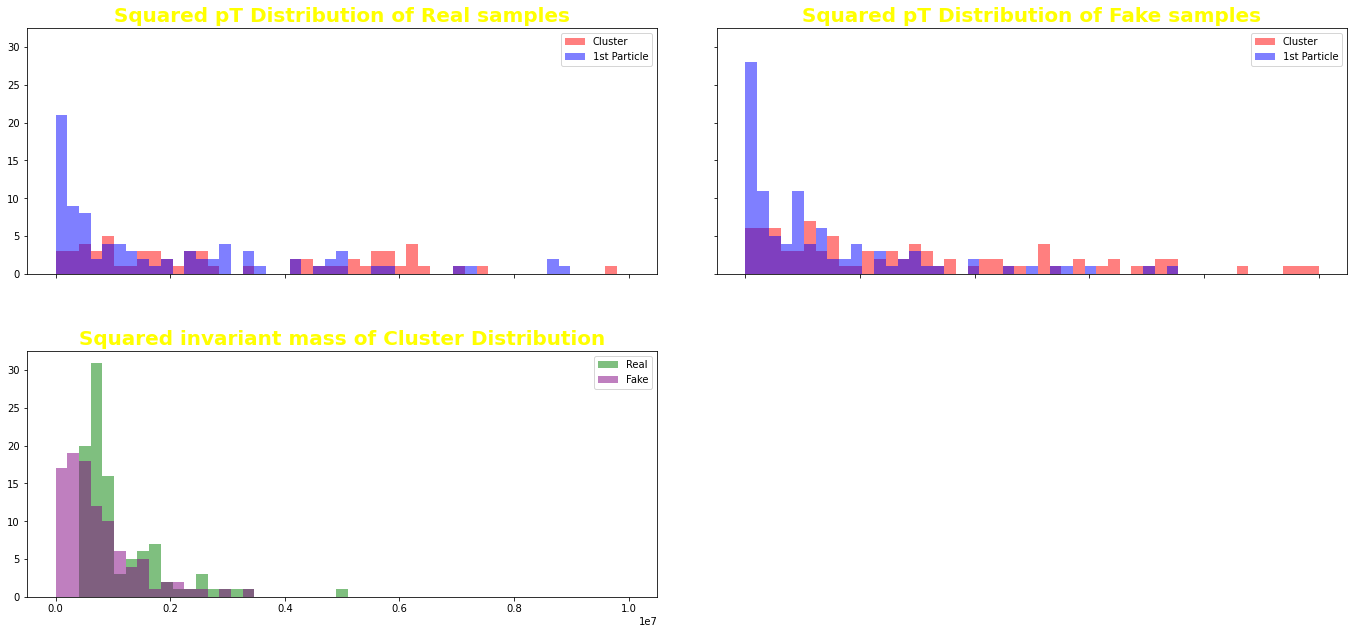

8399 0.4300000071525574 0.7599999904632568


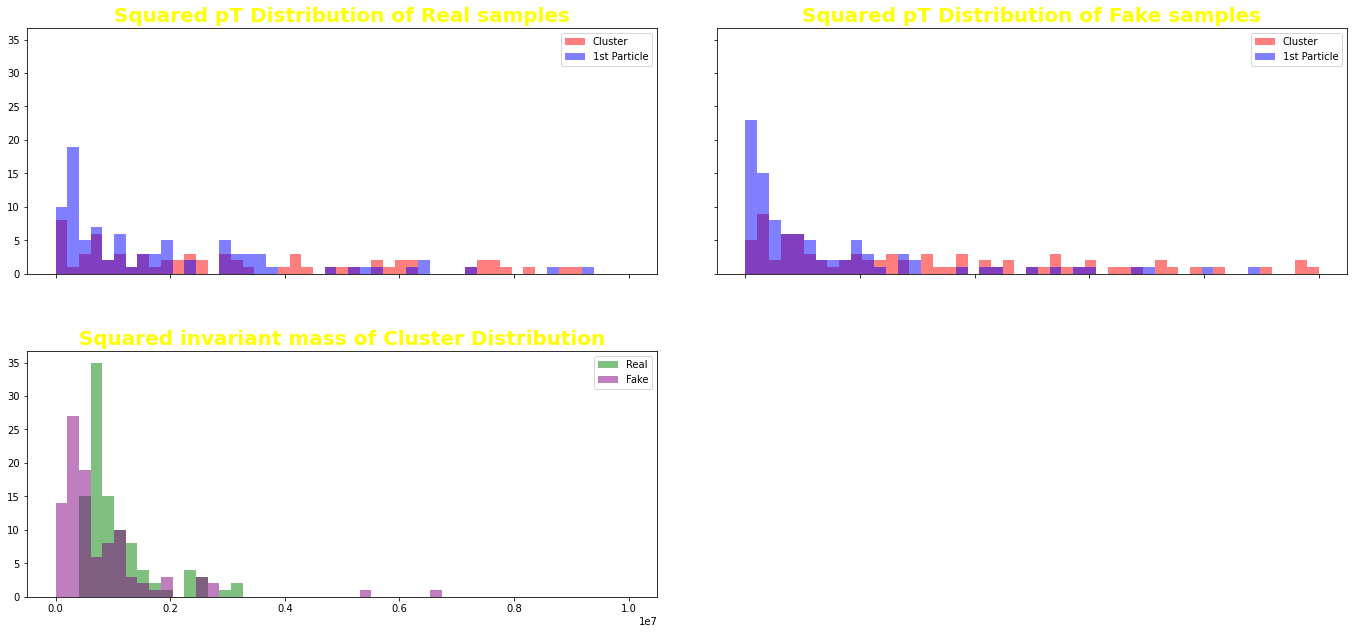

8499 0.41999998688697815 0.7599999904632568


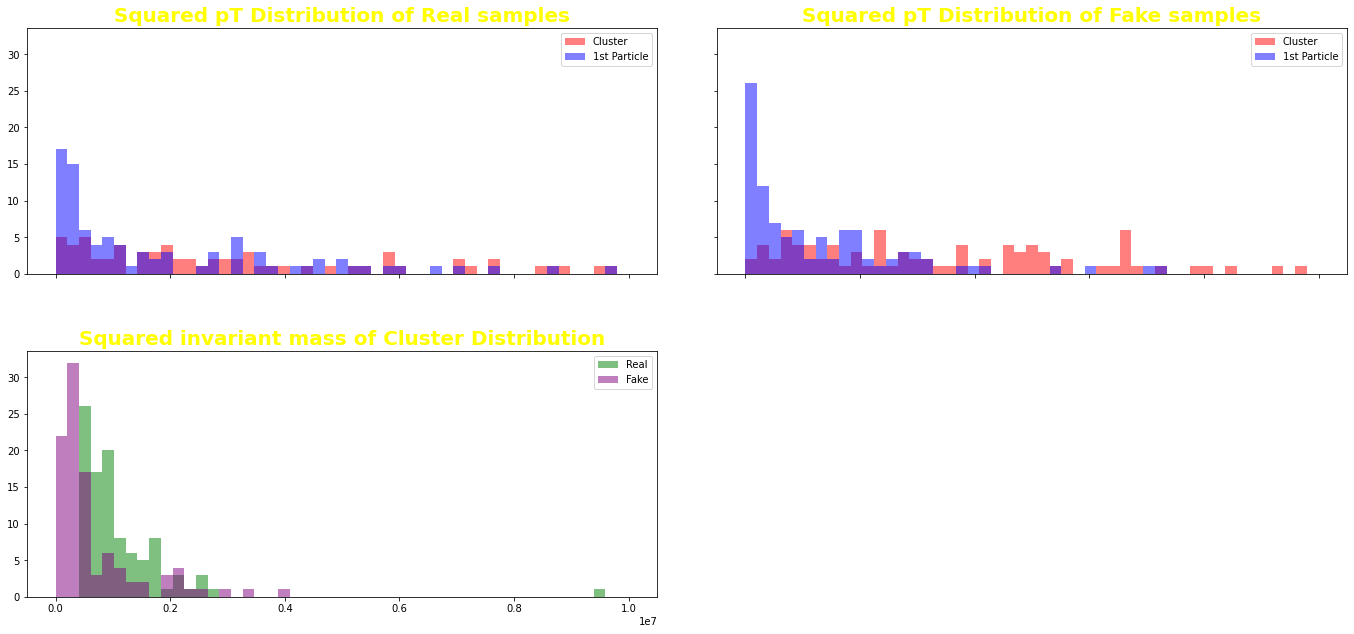

8599 0.4000000059604645 0.7799999713897705


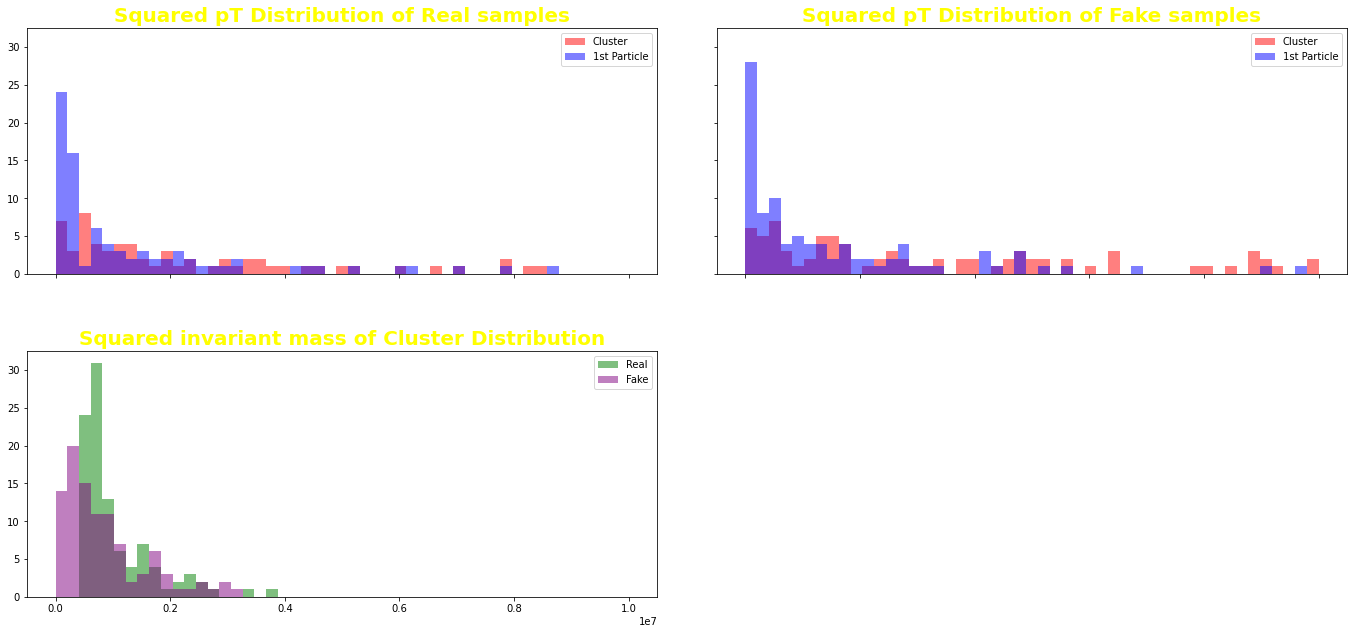

8699 0.4399999976158142 0.6399999856948853


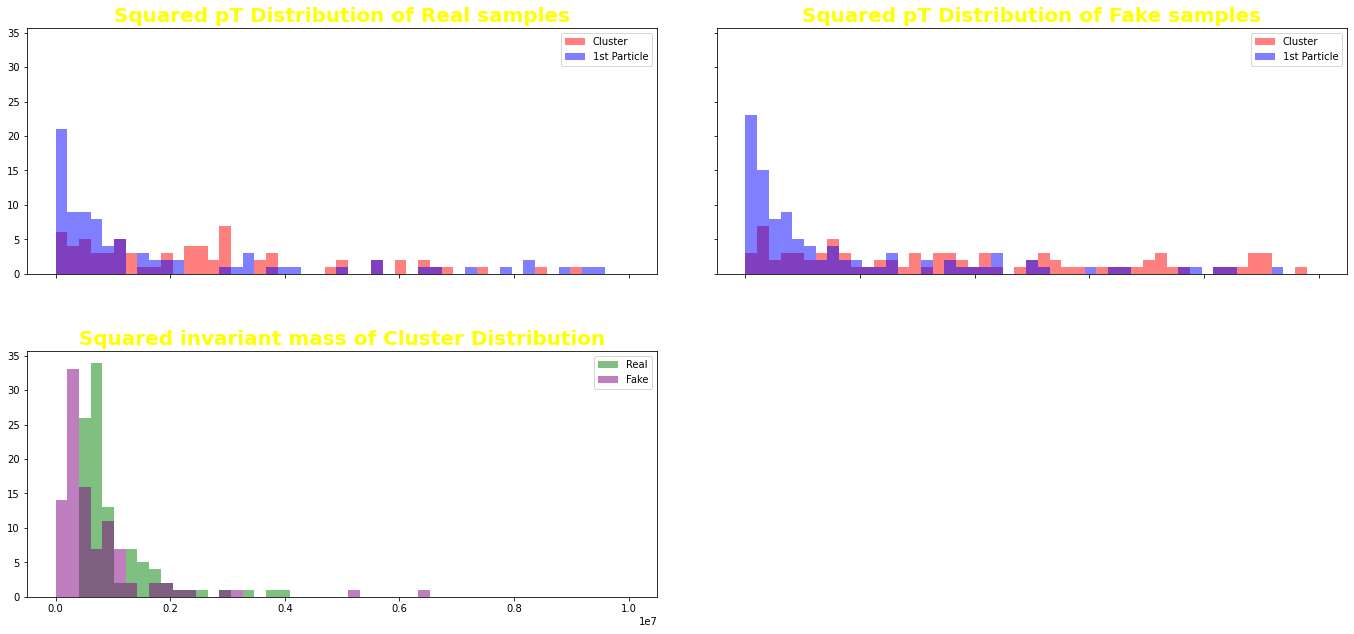

8799 0.49000000953674316 0.6399999856948853


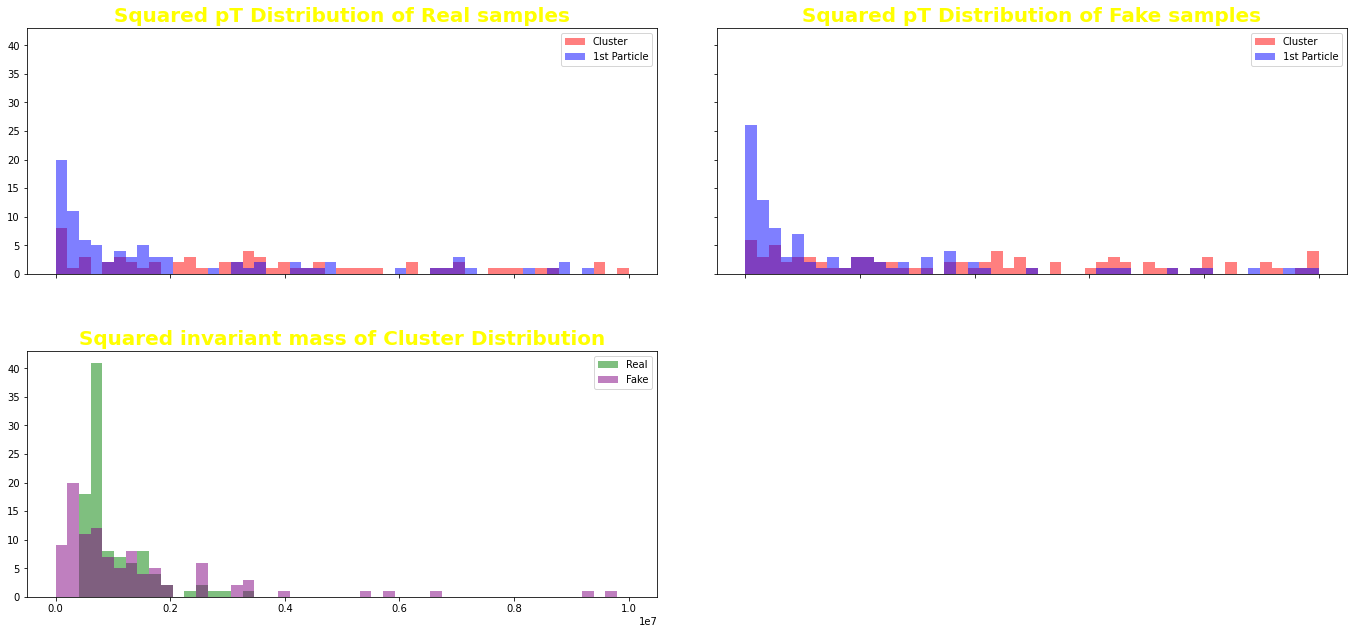

8899 0.4000000059604645 0.75


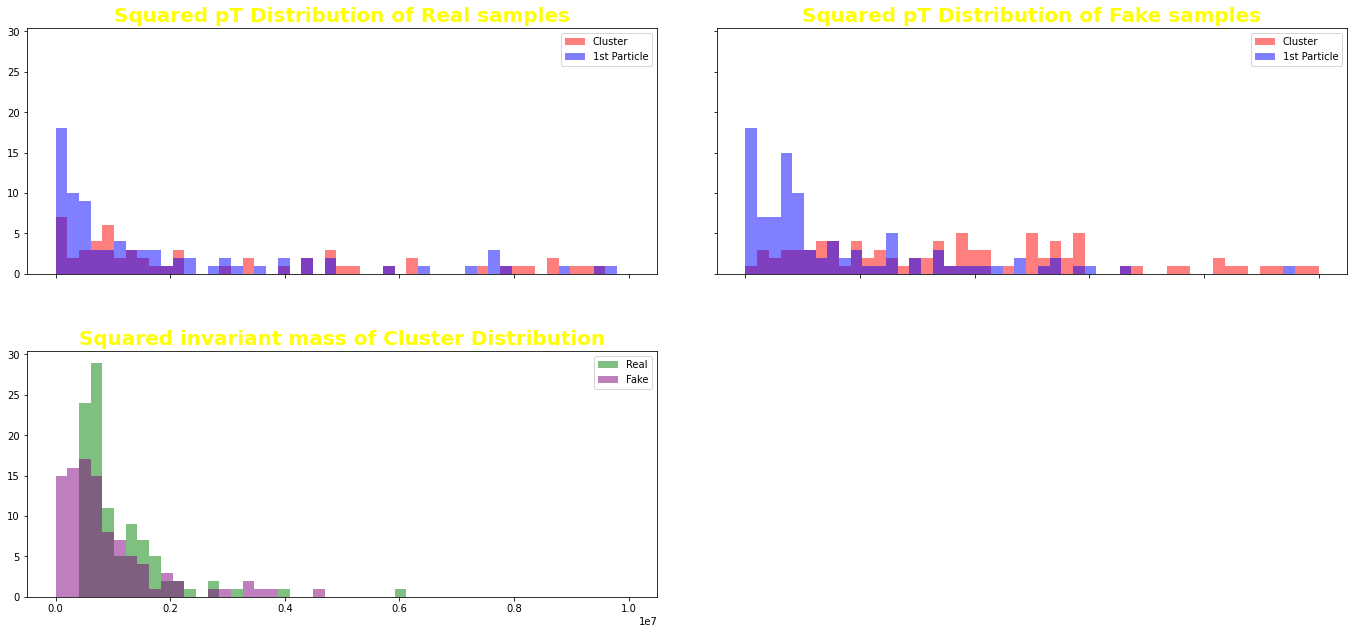

8999 0.23999999463558197 0.7200000286102295


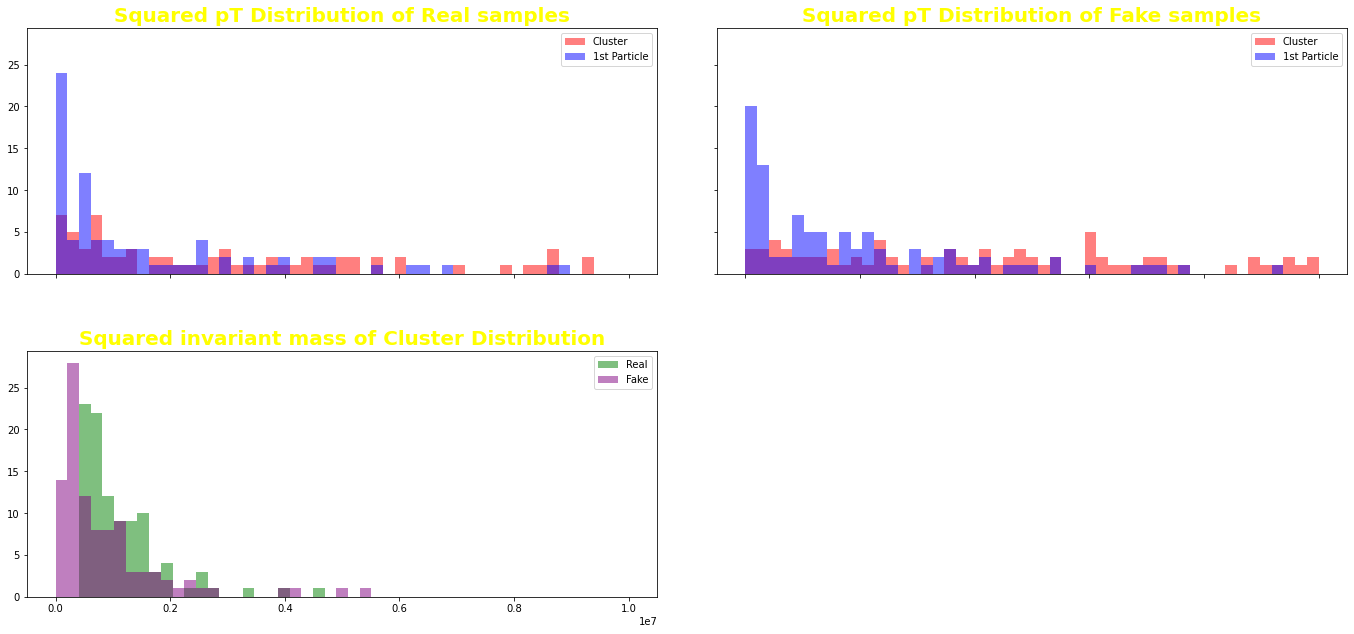

9099 0.36000001430511475 0.5199999809265137


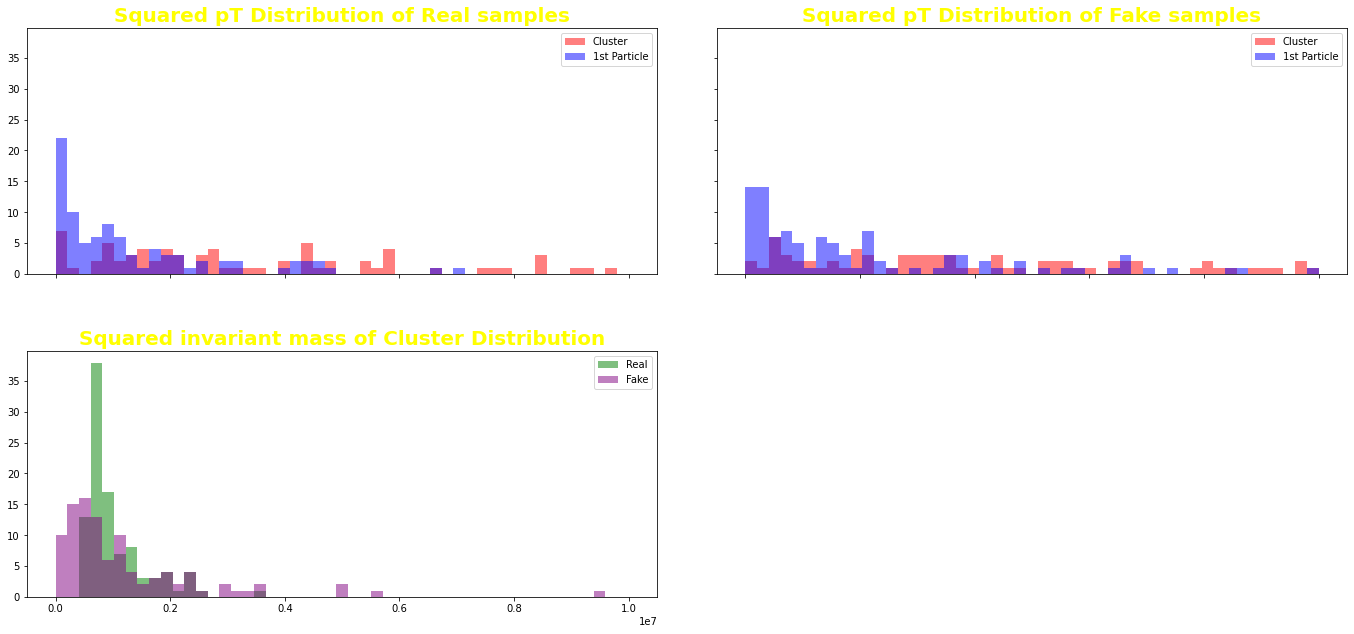

9199 0.3400000035762787 0.6399999856948853


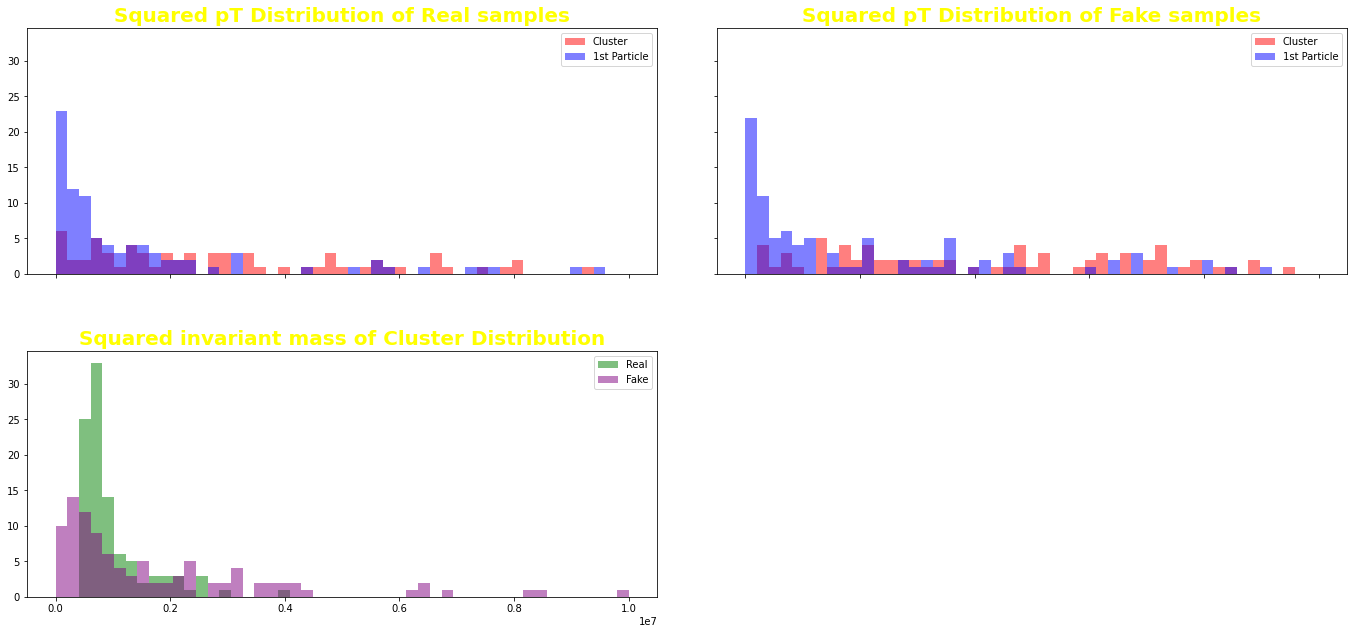

9299 0.4699999988079071 0.4699999988079071


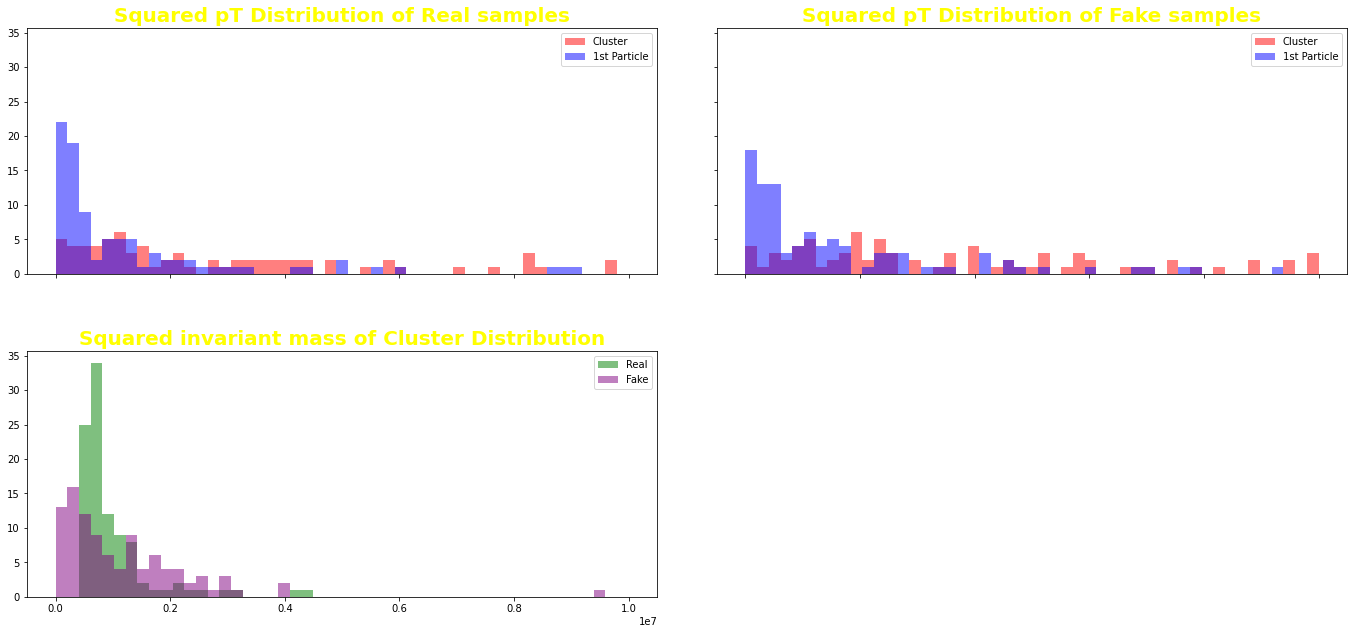

9399 0.28999999165534973 0.8199999928474426


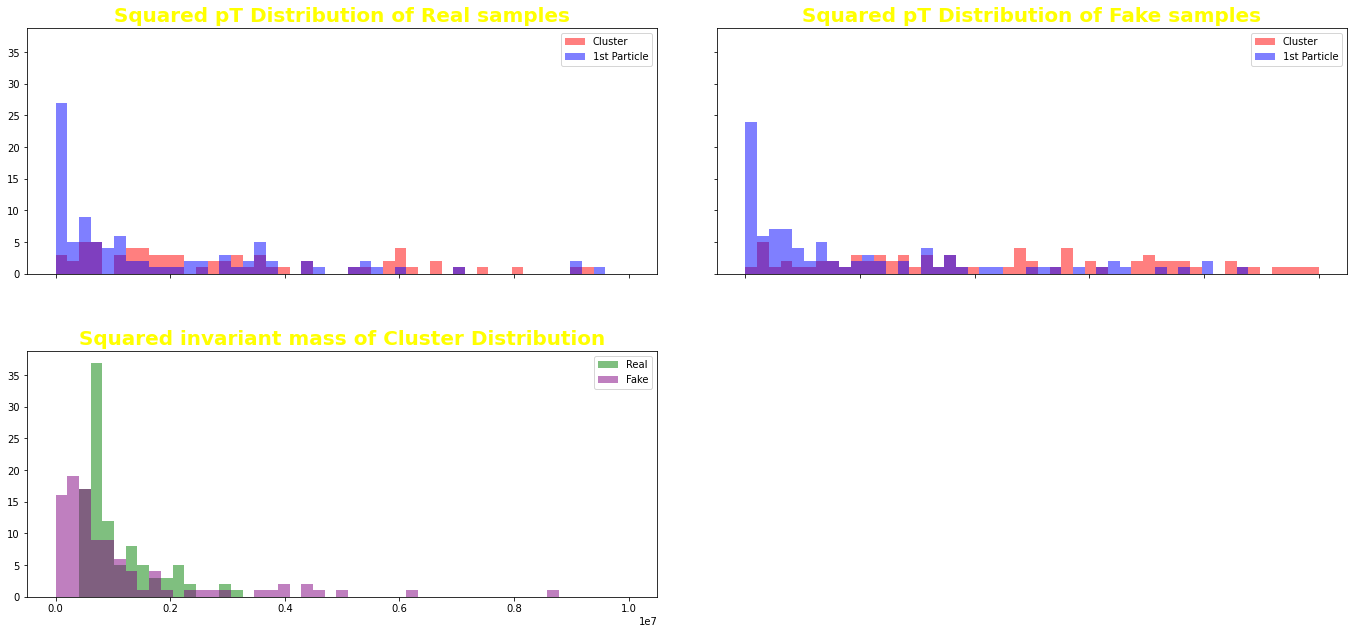

9499 0.20999999344348907 0.7300000190734863


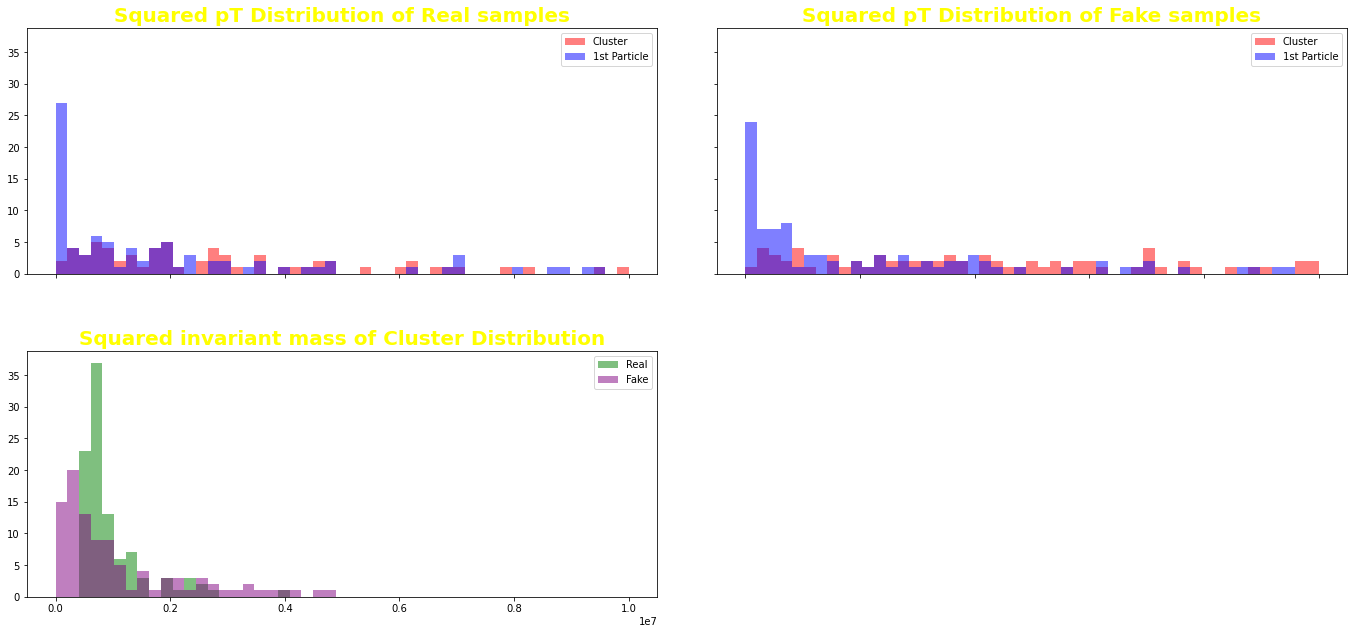

9599 0.25999999046325684 0.8299999833106995


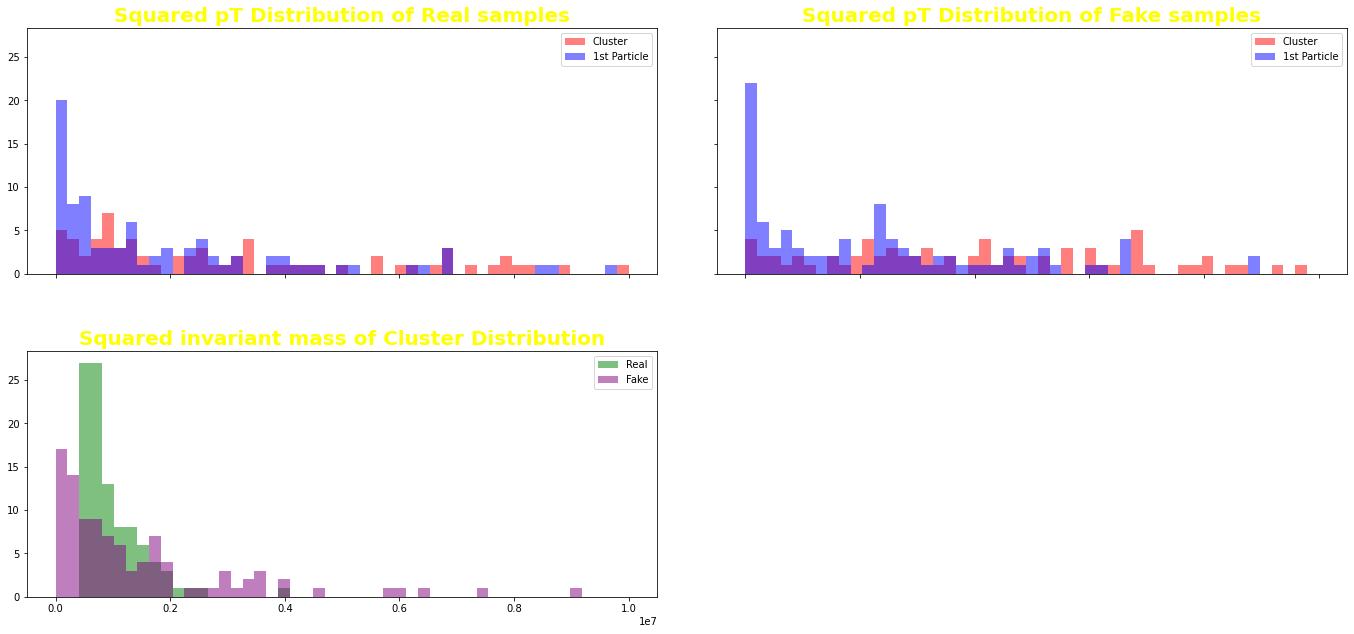

9699 0.46000000834465027 0.6200000047683716


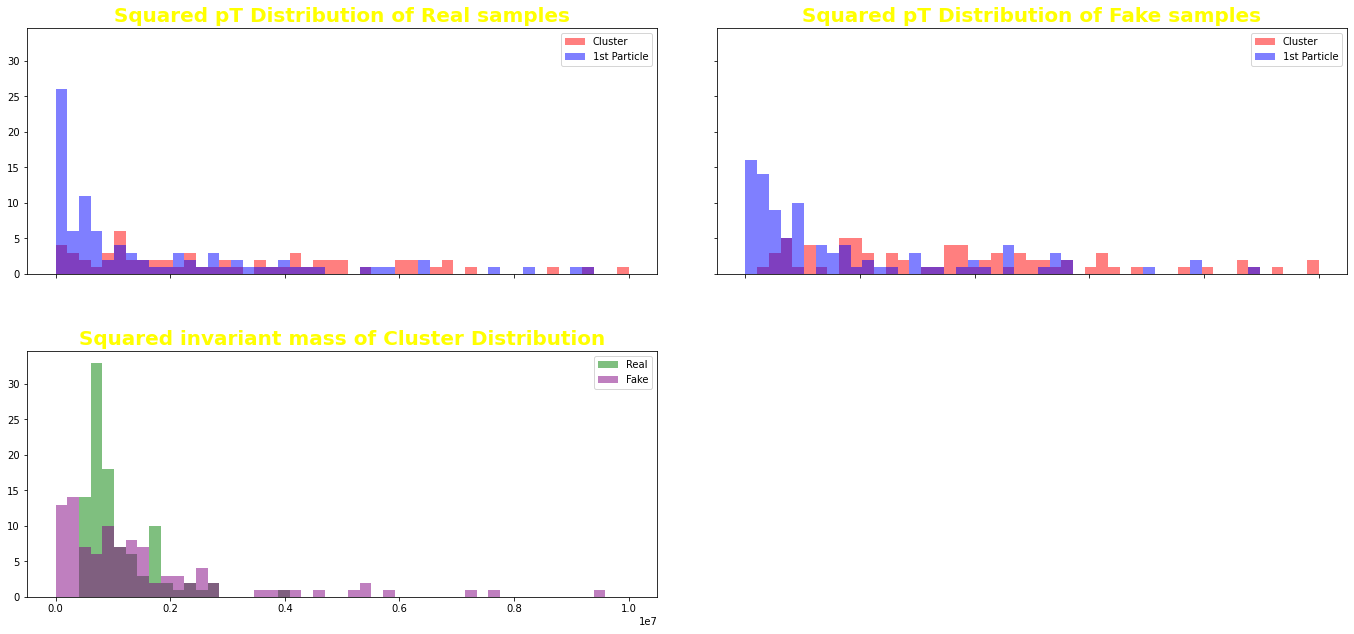

9799 0.3400000035762787 0.7400000095367432


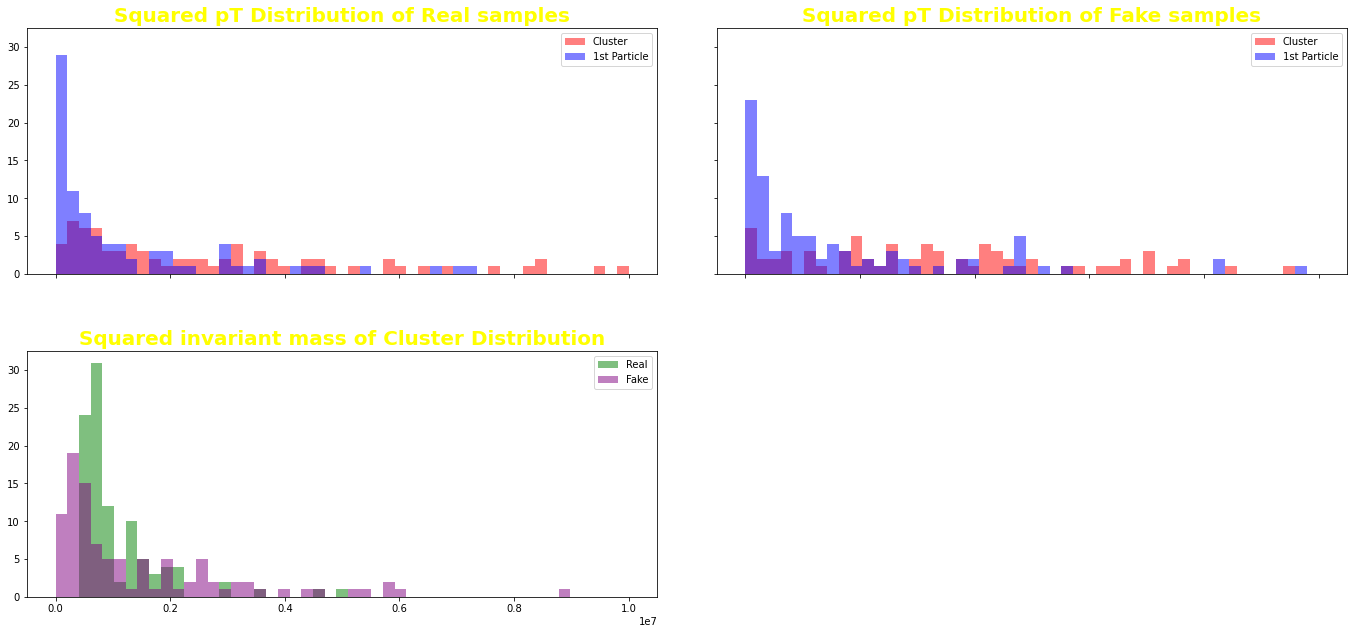

9899 0.4099999964237213 0.6399999856948853


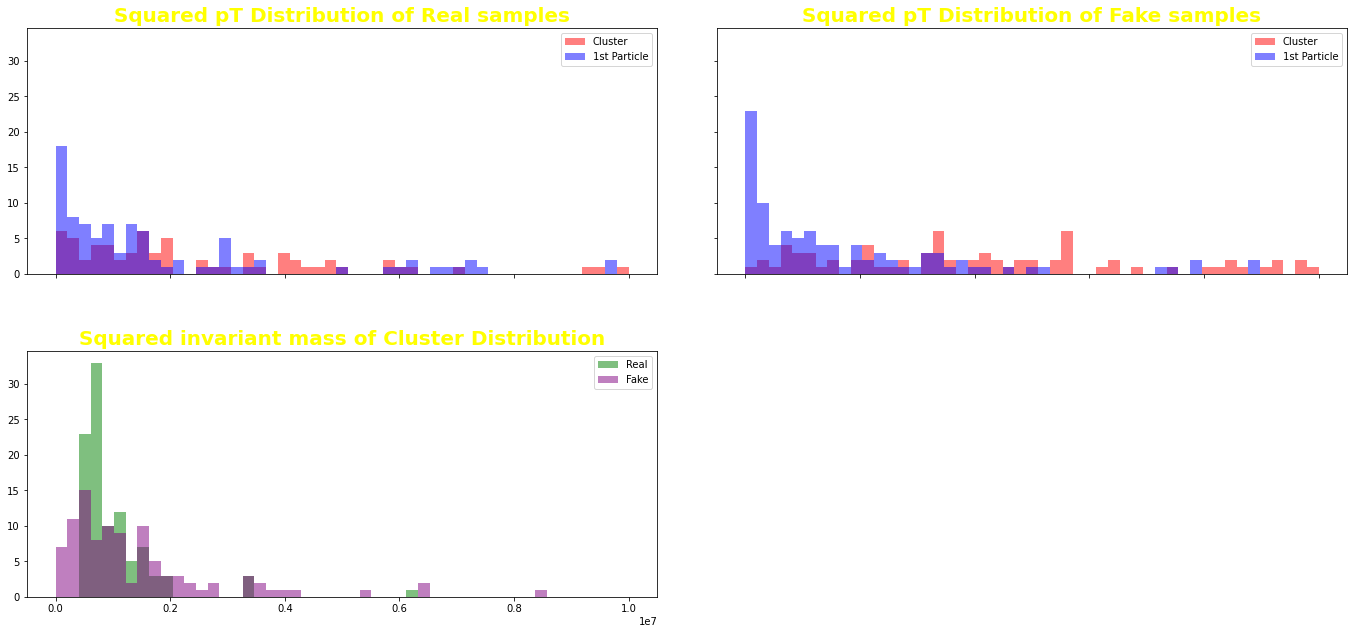

9999 0.4300000071525574 0.6399999856948853


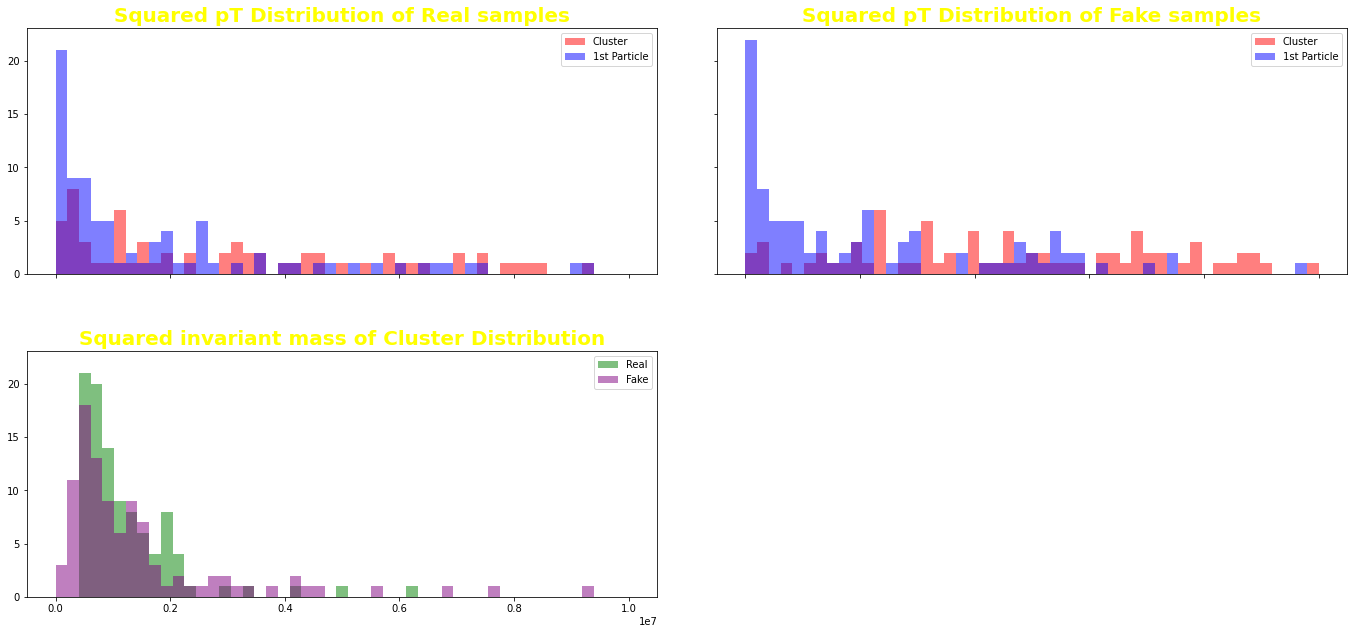

In [ ]:
# size of the latent space
latent_dim = 15
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# train model
train(generator, discriminator, gan_model, latent_dim)

1 0.37450000643730164 0.6543333530426025


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

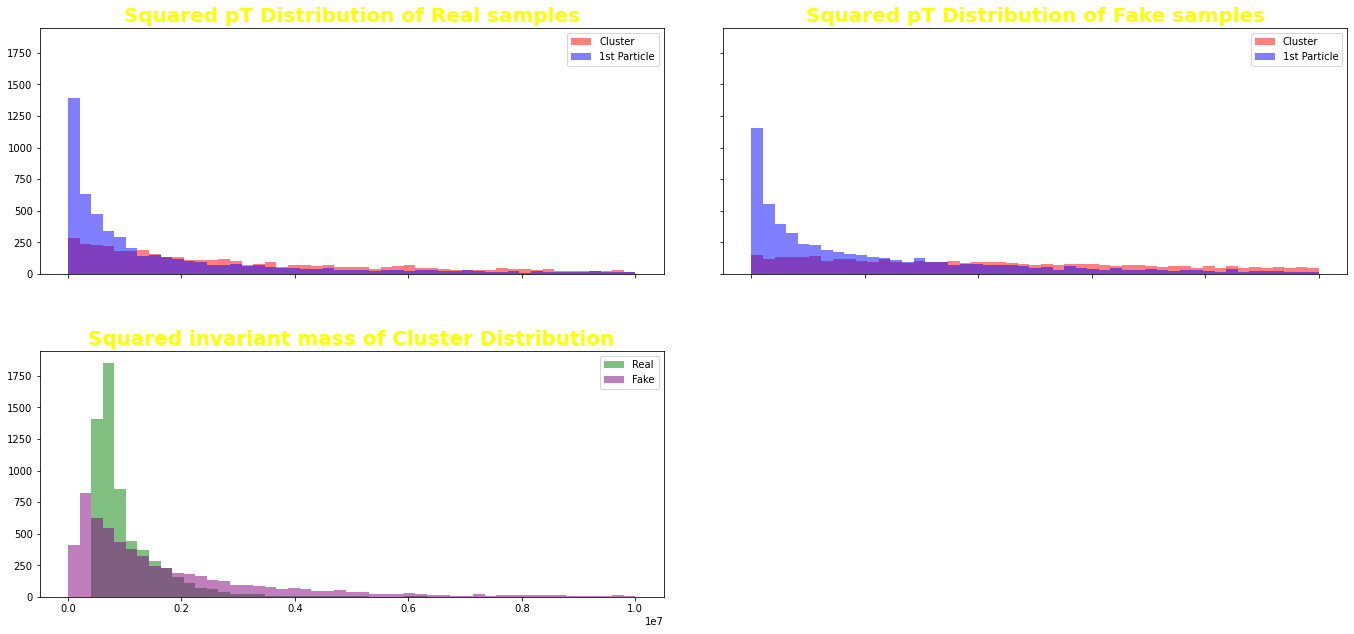

In [ ]:
summarize_performance(1,generator, discriminator, latent_dim, n=6000)

In [ ]:
x,y =generate_fake_samples(generator,latent_dim,5)
x

array([[-1110.4236  ,  -574.0629  ,  2092.099   ,  -161.03954 ,
            6.181622,   460.5657  ],
       [-1076.6545  ,   310.98047 ,   -68.733215,  -240.9031  ,
          154.52278 ,   -73.16425 ],
       [ -796.6727  ,  -311.9363  ,  -519.89014 ,  -403.20615 ,
           31.987986,  -139.15344 ],
       [   26.718756, -1099.0354  ,  -233.57626 ,    -4.928785,
        -1028.614   ,  -178.99294 ],
       [ -553.4579  , -1046.9873  ,   359.3092  ,  -386.30975 ,
         -403.0633  ,   389.29053 ]], dtype=float32)

In [ ]:
x,y =generate_real_samples(5)
x

array([[ 4572.93  ,  3686.39  ,  4805.3   ,   880.075 ,   664.043 ,
         1335.33  ],
       [ -147.916 ,   856.604 , -5119.06  ,  -437.668 ,   -41.2884,
        -1552.77  ],
       [ 4521.4   ,  -407.194 , -3624.56  ,  2818.98  ,  -334.81  ,
        -2858.45  ],
       [ 1633.    ,  1489.17  ,  2567.15  ,   611.858 ,   323.209 ,
         1447.88  ],
       [  701.114 ,    20.1217,  1035.85  ,   819.812 ,   -96.1213,
          489.503 ]])